In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'anomaly_detect_for_all_participants (1).gsheet'
 anomaly_detect_for_all_participants.csv
 anomaly_detect_for_all_participants.gsheet
 anomaly_detect_for_INS-W_1.csv
 anomaly_detect_for_INS-W_1.gsheet
 anomaly_detect_for_INS-W_2.csv
 anomaly_detect_for_INS-W_2.gsheet
 anomaly_detect_for_INS-W_3.csv
 anomaly_detect_for_INS-W_4.csv
 anomaly_detection_combined_features.csv
 anomaly_detection.csv
 anomaly_detection.gsheet
 anomaly_detection_isolation_forest.csv
 anomaly_detection_isolation_forest.gsheet
 anomaly_mood_for_all_participants.csv
 anomaly_mood_for_all_participants.gsheet
 anomaly_mood_for_INS-W_1.csv
 anomaly_mood_for_INS-W_2.csv
 anomaly_mood_for_INS-W_3.csv
 anomaly_mood_for_INS-W_4.csv
 hist_labelcounts_neurips.pdf
 INS-W_1_sleep_step_screen_allday_100_participants.csv
 INS-W_2_sleep_step_screen_allday_100_participants.csv
 INS-W_2_sleep_step_scree

In [ ]:
%cd '/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset'

/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import shap

In [ ]:
# prompt: write a code to read this csv /content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/sleep_step_screen_allday_15_participants.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import shap

df_INS_W1 = pd.read_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/INS-W_1_sleep_step_screen_allday_100_participants.csv')
df_INS_W2 = pd.read_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/INS-W_2_sleep_step_screen_allday_100_participants.csv')
df_INS_W3 = pd.read_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/INS-W_3_sleep_step_screen_allday_100_participants.csv')
df_INS_W4 = pd.read_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/INS-W_4_sleep_step_screen_allday_100_participants.csv')


In [ ]:
print(df_INS_W1.shape)
print(df_INS_W2.shape)
print(df_INS_W3.shape)
print(df_INS_W4.shape)

(7313, 199)
(7580, 199)
(7894, 199)
(8197, 199)


In [ ]:
# sleep_data=df_INS_W1.copy()
# # Filter data for the first 'pid'
# pid_data = sleep_data[sleep_data['pid'] == sleep_data['pid'].iloc[500]]

# # Aggregate over the 'pid' by taking mean of avgefficiency columns for each date
# agg_pid_data = pid_data.groupby('date')[['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday',
#                                          'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain_norm:allday']].mean()

# # Plot the temporal analysis of avgefficiency for the first 'pid'
# plt.figure(figsize=(10,6))
# plt.plot(agg_pid_data.index, agg_pid_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'], label='Avg Efficiency Main')
# #plt.plot(agg_pid_data.index, agg_pid_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain_norm:allday'], label='Avg Efficiency Main Norm')
# plt.title('Temporal Analysis of Average Efficiency for First PID')
# plt.xlabel('Date')
# plt.ylabel('Average Efficiency')
# plt.legend()

# # Limit the number of x-axis ticks for better readability
# plt.xticks(agg_pid_data.index[::5], rotation=45)
# plt.tight_layout()
# plt.show()


In [ ]:
# import pandas as pd
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# import numpy as np

# # Define relevant features (activity, screen time, etc.)
# sleep_data=df_INS_W4.copy()
# selected_features = [
#     'f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday',
#     'f_steps:fitbit_steps_intraday_rapids_avgdurationactivebout:allday',
#     'f_screen:phone_screen_rapids_avgdurationunlock:allday',
#     'f_screen:phone_screen_rapids_avgdurationunlock_locmap_home:allday',
# ]

# # Initialize lists to store results for each LOSO iteration
# mse_list = []
# mae_list = []
# deviation_mse_list = []  # To store MSEs for large deviation days

# # Perform LOSO (Leave-One-Subject-Out) cross-validation
# for pid in sleep_data['pid'].unique():
#     # Split data into training (all participants except the current one) and testing (current participant)
#     train_data = sleep_data[sleep_data['pid'] != pid]
#     test_data = sleep_data[sleep_data['pid'] == pid].sort_values(by='date')

#     # Filter out rows with missing values for the selected features
#     train_data = train_data.dropna(subset=selected_features)
#     test_data = test_data.dropna(subset=selected_features)

#     if len(test_data) < 5 or len(train_data) < 5:
#         # Skip participants with too little data
#         print(f"Skipping PID {pid} due to insufficient data")
#         continue

#     # Define X (features) and y (target) for train and test sets
#     X_train = train_data[selected_features]
#     y_train = train_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday']
#     X_test = test_data[selected_features]
#     y_test = test_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday']

#     # Train the Decision Tree model
#     model = DecisionTreeRegressor()
#     model.fit(X_train, y_train)

#     # Make predictions on the test set
#     y_pred = model.predict(X_test)

#     # Find test days where sleep efficiency deviation from the previous day is >= 2
#     test_data['sleep_efficiency_diff'] = test_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'].diff()
#     deviation_days = test_data[test_data['sleep_efficiency_diff'].abs() >= 2]

#     # If there are days with large deviation, calculate the MSE for those specific points
#     if not deviation_days.empty:
#         relative_indices = deviation_days.index - test_data.index[0]
#         mse_deviation = mean_squared_error(y_test.iloc[relative_indices], y_pred[relative_indices])
#         deviation_mse_list.append(mse_deviation)

#     # Calculate MSE and MAE for the current left-out participant
#     mse = mean_squared_error(y_test, y_pred)
#     mae = mean_absolute_error(y_test, y_pred)

#     # Store the results
#     mse_list.append(mse)
#     mae_list.append(mae)

#     # Output result for the current participant
#     print(f"PID: {pid}, MSE: {mse}, MAE: {mae}")

# # Print final results for deviation
# if deviation_mse_list:
#     avg_deviation_mse = np.mean(deviation_mse_list)
#     print(f"\nAverage MSE for points with sleep efficiency deviation >= 2: {avg_deviation_mse}")
# else:
#     print("No large deviation days were found.")

# # Calculate the overall average MSE and MAE across all participants
# average_mse_all = np.mean(mse_list)
# average_mae_all = np.mean(mae_list)

# # Print the average MSE and MAE across all iterations
# print(f"\nAverage MSE across all LOSO iterations: {average_mse_all}")
# print(f"Average MAE across all LOSO iterations: {average_mae_all}")


In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, classification_report
# import pandas as pd
# import numpy as np

# # Define relevant features (activity, screen time, etc.)
# sleep_data = df_INS_W4.copy()
# selected_features = [
#     'f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday',
#     'f_steps:fitbit_steps_intraday_rapids_avgdurationactivebout:allday',
#     'f_screen:phone_screen_rapids_avgdurationunlock:allday',
#     'f_screen:phone_screen_rapids_avgdurationunlock_locmap_home:allday',
# ]

# # Define bins and labels for classification
# bins = [45, 70, 84, 90, 100]  # Bins for sleep efficiency
# labels = [0, 1, 2, 3]  # Bin labels for classification

# # Apply binning to the target column
# sleep_data['efficiency_bin'] = pd.cut(
#     sleep_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'],
#     bins=bins,
#     labels=labels,
#     right=False,
# )

# # Initialize lists to store results for each LOSO iteration
# accuracy_list = []

# # Perform LOSO (Leave-One-Subject-Out) cross-validation
# for pid in sleep_data['pid'].unique():
#     # Split data into training (all participants except the current one) and testing (current participant)
#     train_data = sleep_data[sleep_data['pid'] != pid]
#     test_data = sleep_data[sleep_data['pid'] == pid].sort_values(by='date')

#     # Filter out rows with missing values for the selected features and target bins
#     train_data = train_data.dropna(subset=selected_features + ['efficiency_bin'])
#     test_data = test_data.dropna(subset=selected_features + ['efficiency_bin'])

#     if len(test_data) < 5 or len(train_data) < 5:
#         # Skip participants with too little data
#         print(f"Skipping PID {pid} due to insufficient data")
#         continue

#     # Define X (features) and y (binned target) for train and test sets
#     X_train = train_data[selected_features]
#     y_train = train_data['efficiency_bin'].astype(int)  # Convert labels to integers for classification
#     X_test = test_data[selected_features]
#     y_test = test_data['efficiency_bin'].astype(int)

#     # Train the Decision Tree Classifier model
#     model = DecisionTreeClassifier()
#     model.fit(X_train, y_train)

#     # Make predictions on the test set
#     y_pred = model.predict(X_test)

#     # Calculate accuracy for the current left-out participant
#     accuracy = accuracy_score(y_test, y_pred)
#     accuracy_list.append(accuracy)

#     # Output result for the current participant
#     print(f"PID: {pid}, Accuracy: {accuracy}")

# # Calculate the overall average accuracy across all participants
# average_accuracy_all = np.mean(accuracy_list)

# # Print the overall results
# print(f"\nAverage Accuracy across all LOSO iterations: {average_accuracy_all}")


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, classification_report

# # Choose classifier: RandomForest, Logistic Regression, or SVM
# classifier_choice = "RandomForest"  # Options: "RandomForest", "LogisticRegression", "SVM"

# # Initialize lists to store results for each LOSO iteration
# accuracy_list = []

# # Perform LOSO (Leave-One-Subject-Out) cross-validation
# for pid in sleep_data['pid'].unique():
#     # Split data into training (all participants except the current one) and testing (current participant)
#     train_data = sleep_data[sleep_data['pid'] != pid]
#     test_data = sleep_data[sleep_data['pid'] == pid].sort_values(by='date')

#     # Filter out rows with missing values for the selected features and target bins
#     train_data = train_data.dropna(subset=selected_features + ['efficiency_bin'])
#     test_data = test_data.dropna(subset=selected_features + ['efficiency_bin'])

#     if len(test_data) < 5 or len(train_data) < 5:
#         # Skip participants with too little data
#         print(f"Skipping PID {pid} due to insufficient data")
#         continue

#     # Define X (features) and y (binned target) for train and test sets
#     X_train = train_data[selected_features]
#     y_train = train_data['efficiency_bin'].astype(int)  # Convert labels to integers for classification
#     X_test = test_data[selected_features]
#     y_test = test_data['efficiency_bin'].astype(int)

#     # Initialize classifier
#     if classifier_choice == "RandomForest":
#         model = RandomForestClassifier(n_estimators=100, random_state=42)
#     elif classifier_choice == "LogisticRegression":
#         model = LogisticRegression(max_iter=1000, random_state=42)
#     elif classifier_choice == "SVM":
#         model = SVC(kernel='linear', random_state=42)
#     else:
#         raise ValueError("Invalid classifier choice! Choose from 'RandomForest', 'LogisticRegression', or 'SVM'.")

#     # Train the model
#     model.fit(X_train, y_train)

#     # Make predictions on the test set
#     y_pred = model.predict(X_test)

#     # Calculate accuracy for the current left-out participant
#     accuracy = accuracy_score(y_test, y_pred)
#     accuracy_list.append(accuracy)

#     # Output result for the current participant
#     print(f"PID: {pid}, Accuracy: {accuracy}")

# # Calculate the overall average accuracy across all participants
# average_accuracy_all = np.mean(accuracy_list)

# # Print the overall results
# print(f"\nAverage Accuracy across all LOSO iterations with {classifier_choice}: {average_accuracy_all}")


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report
# import pandas as pd
# import numpy as np

# # Define relevant features (activity, screen time, etc.)
# sleep_data = df_INS_W4.copy()
# selected_features = [
#     'f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday',
#     'f_steps:fitbit_steps_intraday_rapids_avgdurationactivebout:allday',
#     'f_screen:phone_screen_rapids_avgdurationunlock:allday',
#     'f_screen:phone_screen_rapids_avgdurationunlock_locmap_home:allday',
# ]

# # Define bins and labels for classification
# bins = [0, 70, 84, 90, 100]  # Bins for sleep efficiency
# labels = [0, 1, 2, 3]  # Bin labels for classification

# # Apply binning to the target column
# sleep_data['efficiency_bin'] = pd.cut(
#     sleep_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'],
#     bins=bins,
#     labels=labels,
#     right=False,
# ).astype("category")

# # Add previous bin as a feature for temporal dependency
# sleep_data['previous_bin'] = sleep_data.groupby('pid')['efficiency_bin'].shift(1)

# # Drop rows where `efficiency_bin` or `previous_bin` is NaN
# sleep_data = sleep_data.dropna(subset=['efficiency_bin', 'previous_bin'])

# # Convert bins to integers for calculation
# sleep_data['efficiency_bin'] = sleep_data['efficiency_bin'].astype(int)
# sleep_data['previous_bin'] = sleep_data['previous_bin'].astype(int)

# # Initialize lists to store results for each LOSO iteration
# accuracy_list = []

# # Perform LOSO (Leave-One-Subject-Out) cross-validation
# for pid in sleep_data['pid'].unique():
#     # Split data into training (all participants except the current one) and testing (current participant)
#     train_data = sleep_data[sleep_data['pid'] != pid]
#     test_data = sleep_data[sleep_data['pid'] == pid].sort_values(by='date')

#     # Filter out rows with missing values for the selected features
#     train_data = train_data.dropna(subset=selected_features)
#     test_data = test_data.dropna(subset=selected_features)

#     if len(test_data) < 5 or len(train_data) < 5:
#         # Skip participants with too little data
#         print(f"Skipping PID {pid} due to insufficient data")
#         continue

#     # Define X (features) and y (bin change) for train and test sets
#     train_data['bin_change'] = (
#         train_data['efficiency_bin'] - train_data['previous_bin']
#     )
#     test_data['bin_change'] = (
#         test_data['efficiency_bin'] - test_data['previous_bin']
#     )

#     X_train = train_data[selected_features + ['previous_bin']]
#     y_train = train_data['bin_change']
#     X_test = test_data[selected_features + ['previous_bin']]
#     y_test = test_data['bin_change']

#     # Train the Random Forest Classifier model
#     model = RandomForestClassifier(n_estimators=100, random_state=42)
#     model.fit(X_train, y_train)

#     # Make predictions on the test set
#     y_pred = model.predict(X_test)

#     # Calculate accuracy for the current left-out participant
#     accuracy = accuracy_score(y_test, y_pred)
#     accuracy_list.append(accuracy)

#     # Output result for the current participant
#     print(f"PID: {pid}, Accuracy: {accuracy}")
#     print(classification_report(y_test, y_pred, zero_division=0))

# # Calculate the overall average accuracy across all participants
# average_accuracy_all = np.mean(accuracy_list)

# # Print the overall results
# print(f"\nAverage Accuracy across all LOSO iterations for bin change prediction: {average_accuracy_all}")


In [ ]:
# import pandas as pd

# # Define relevant features (activity, screen time, etc.)
# sleep_data = df_INS_W4.copy()
# selected_features = [
#     'f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday',
#     'f_steps:fitbit_steps_intraday_rapids_avgdurationactivebout:allday',
#     'f_screen:phone_screen_rapids_avgdurationunlock:allday',
#     'f_screen:phone_screen_rapids_avgdurationunlock_locmap_home:allday',
# ]

# # Define bins and labels for classification
# bins = [0, 70, 84, 90, 100]  # Bins for sleep efficiency
# labels = [0, 1, 2, 3]  # Bin labels for classification

# # Apply binning to the target column
# sleep_data['efficiency_bin'] = pd.cut(
#     sleep_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'],
#     bins=bins,
#     labels=labels,
#     right=False,
# ).astype("category")

# # Add previous bin as a feature for temporal dependency
# sleep_data['previous_bin'] = sleep_data.groupby('pid')['efficiency_bin'].shift(1)

# # Drop rows where `efficiency_bin` or `previous_bin` is NaN
# sleep_data = sleep_data.dropna(subset=['efficiency_bin', 'previous_bin'])

# # Convert bins to integers for calculation
# sleep_data['efficiency_bin'] = sleep_data['efficiency_bin'].astype(int)
# sleep_data['previous_bin'] = sleep_data['previous_bin'].astype(int)

# # Copy the data for creating the anomaly column
# anomaly_data = sleep_data.copy()

# # Calculate bin change for each row
# anomaly_data['bin_change'] = anomaly_data['efficiency_bin'] - anomaly_data['previous_bin']

# # Define the anomaly column (1 for decrease, 0 for same or increase)
# anomaly_data['anomaly'] = anomaly_data['bin_change'].apply(lambda x: 1 if x < 0 else 0)

# # Save the result to a CSV file
# anomaly_data[['pid', 'date', 'efficiency_bin', 'previous_bin', 'bin_change', 'anomaly']].to_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/anomaly_detection.csv', index=False)

# print("Anomaly detection results have been saved to 'anomaly_detection.csv'.")


<ipython-input-29-45160f883483>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_data['efficiency_bin'] = sleep_data['efficiency_bin'].astype(int)
<ipython-input-29-45160f883483>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_data['previous_bin'] = sleep_data['previous_bin'].astype(int)


Anomaly detection results have been saved to 'anomaly_detection.csv'.


In [ ]:
# import pandas as pd

# # Paths to the input CSV files
# file_paths = [
#     '/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/INS-W_1_sleep_step_screen_allday_100_participants.csv',
#     '/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/INS-W_2_sleep_step_screen_allday_100_participants.csv',
#     '/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/INS-W_3_sleep_step_screen_allday_100_participants.csv',
#     '/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/INS-W_4_sleep_step_screen_allday_100_participants.csv',
# ]

# # # Define relevant features
# # selected_features = [
# #     'f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday',
# #     'f_steps:fitbit_steps_intraday_rapids_avgdurationactivebout:allday',
# #     'f_screen:phone_screen_rapids_avgdurationunlock:allday',
# #     'f_screen:phone_screen_rapids_avgdurationunlock_locmap_home:allday',
# # ]

# # Define bins and labels for classification
# bins = [0, 70, 84, 90, 100]  # Bins for sleep efficiency
# labels = [0, 1, 2, 3]  # Bin labels for classification

# # Initialize a list to collect processed data
# all_anomaly_data = []

# for file_path in file_paths:
#     # Load the dataset
#     sleep_data = pd.read_csv(file_path)

#     # Apply binning to the target column
#     sleep_data['efficiency_bin'] = pd.cut(
#         sleep_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'],
#         bins=bins,
#         labels=labels,
#         right=False,
#     ).astype("category")

#     # Add previous bin as a feature for temporal dependency
#     sleep_data['previous_bin'] = sleep_data.groupby('pid')['efficiency_bin'].shift(1)

#     # Drop rows where `efficiency_bin` or `previous_bin` is NaN
#     sleep_data = sleep_data.dropna(subset=['efficiency_bin', 'previous_bin'])

#     # Convert bins to integers for calculation
#     sleep_data['efficiency_bin'] = sleep_data['efficiency_bin'].astype(int)
#     sleep_data['previous_bin'] = sleep_data['previous_bin'].astype(int)

#     # Calculate bin change for each row
#     sleep_data['bin_change'] = sleep_data['efficiency_bin'] - sleep_data['previous_bin']

#     # Define the anomaly column (1 for decrease, 0 for same or increase)
#     sleep_data['anomaly'] = sleep_data['bin_change'].apply(lambda x: 1 if x < 0 else 0)

#     # Append the processed data to the list
#     # all_anomaly_data.append(sleep_data[['pid', 'date', 'efficiency_bin', 'previous_bin', 'bin_change', 'anomaly']])
#     all_anomaly_data.append(sleep_data)

# # Combine all processed data into a single DataFrame
# combined_anomaly_data = pd.concat(all_anomaly_data, ignore_index=True)

# # Save the result to a CSV file
# combined_anomaly_data.to_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/anomaly_detect_for_all_participants.csv', index=False)

# print("Anomaly detection results for all participants have been saved to 'anomaly_detect_for_all_participants.csv'.")


Anomaly detection results for all participants have been saved to 'anomaly_detect_for_all_participants.csv'.


In [ ]:
# combined_anomaly_data

,pid,date,f_screen:phone_screen_rapids_avgdurationunlock:allday,f_screen:phone_screen_rapids_avgdurationunlock_locmap_exercise:allday,f_screen:phone_screen_rapids_avgdurationunlock_locmap_exercise_norm:allday,f_screen:phone_screen_rapids_avgdurationunlock_locmap_greens:allday,f_screen:phone_screen_rapids_avgdurationunlock_locmap_greens_norm:allday,f_screen:phone_screen_rapids_avgdurationunlock_locmap_home:allday,f_screen:phone_screen_rapids_avgdurationunlock_locmap_home_norm:allday,f_screen:phone_screen_rapids_avgdurationunlock_locmap_living:allday,...,f_steps:fitbit_steps_summary_rapids_mediansumsteps_norm:allday,f_steps:fitbit_steps_summary_rapids_minsumsteps:allday,f_steps:fitbit_steps_summary_rapids_minsumsteps_norm:allday,f_steps:fitbit_steps_summary_rapids_stdsumsteps:allday,f_steps:fitbit_steps_summary_rapids_stdsumsteps_dis:allday,f_steps:fitbit_steps_summary_rapids_stdsumsteps_norm:allday,efficiency_bin,previous_bin,bin_change,anomaly
0,INS-W_001#INS-W_1,2018-04-04,2.560566,0.999983,0.000000,1.088972,0.000000,3.086887,0.000000,2.842827,...,0.109866,14958.0,0.109866,NaN,NaN,NaN,3,3,0,0
1,INS-W_001#INS-W_1,2018-04-05,2.560566,0.999983,0.000000,1.088972,0.000000,3.086887,0.000000,2.842827,...,0.193356,16490.0,0.193356,NaN,NaN,NaN,3,3,0,0
2,INS-W_001#INS-W_1,2018-04-06,2.560566,0.999983,0.000000,1.088972,0.000000,3.086887,0.000000,2.842827,...,0.098531,14750.0,0.098531,NaN,NaN,NaN,3,3,0,0
3,INS-W_001#INS-W_1,2018-04-07,2.560566,0.999983,0.000000,1.088972,0.000000,3.086887,0.000000,2.842827,...,0.301096,18467.0,0.301096,NaN,NaN,NaN,3,3,0,0
4,INS-W_001#INS-W_1,2018-04-08,2.560566,0.999983,0.000000,1.088972,0.000000,3.086887,0.000000,2.842827,...,0.000000,12942.0,0.000000,NaN,NaN,NaN,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29838,INS-W_996#INS-W_4,2021-06-17,6.670411,1.267428,0.000000,1.097600,0.000000,6.884741,0.497296,3.170859,...,0.000000,4851.5,0.000000,NaN,NaN,NaN,3,3,0,0
29839,INS-W_996#INS-W_4,2021-06-18,5.367919,1.267428,0.000000,1.097600,0.000000,5.750200,0.285775,3.170859,...,0.000000,4851.5,0.000000,NaN,NaN,NaN,3,3,0,0
29840,INS-W_996#INS-W_4,2021-06-19,3.297271,1.999967,0.210588,3.223840,0.510949,5.265091,0.195333,3.170859,...,0.000000,4851.5,0.000000,NaN,NaN,NaN,3,3,0,0
29841,INS-W_996#INS-W_4,2021-06-20,6.377686,3.121155,0.478039,1.097600,0.000000,5.827912,0.300264,3.170859,...,0.000000,4851.5,0.000000,NaN,NaN,NaN,3,3,0,0


In [ ]:
# # Group by 'pid' and calculate the total anomalies for each participant
# total_anomalies_per_participant = (
#     anomaly_data.groupby('pid')['anomaly']
#     .sum()
#     .reset_index()
#     .rename(columns={'anomaly': 'total_anomalies'})
# )

# # Save the result to a CSV file
# total_anomalies_per_participant.to_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/total_anomalies_per_participant.csv', index=False)

# print("Total anomalies per participant have been saved to 'total_anomalies_per_participant.csv'.")


Total anomalies per participant have been saved to 'total_anomalies_per_participant.csv'.


In [ ]:
# # Group by 'pid' and calculate the total anomalies for each participant
# total_anomalies_per_participant = (
#     combined_anomaly_data.groupby('pid')['anomaly']
#     .sum()
#     .reset_index()
#     .rename(columns={'anomaly': 'total_anomalies'})
# )

# # Save the result to a CSV file
# total_anomalies_per_participant.to_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/total_anomalies_per_participant_all.csv', index=False)

# print("Total anomalies per participant have been saved to 'total_anomalies_per_participant_all.csv'.")


Total anomalies per participant have been saved to 'total_anomalies_per_participant_all.csv'.


In [ ]:
# combined_anomaly_data

,pid,date,f_screen:phone_screen_rapids_avgdurationunlock:allday,f_screen:phone_screen_rapids_avgdurationunlock_locmap_exercise:allday,f_screen:phone_screen_rapids_avgdurationunlock_locmap_exercise_norm:allday,f_screen:phone_screen_rapids_avgdurationunlock_locmap_greens:allday,f_screen:phone_screen_rapids_avgdurationunlock_locmap_greens_norm:allday,f_screen:phone_screen_rapids_avgdurationunlock_locmap_home:allday,f_screen:phone_screen_rapids_avgdurationunlock_locmap_home_norm:allday,f_screen:phone_screen_rapids_avgdurationunlock_locmap_living:allday,...,f_steps:fitbit_steps_summary_rapids_mediansumsteps_norm:allday,f_steps:fitbit_steps_summary_rapids_minsumsteps:allday,f_steps:fitbit_steps_summary_rapids_minsumsteps_norm:allday,f_steps:fitbit_steps_summary_rapids_stdsumsteps:allday,f_steps:fitbit_steps_summary_rapids_stdsumsteps_dis:allday,f_steps:fitbit_steps_summary_rapids_stdsumsteps_norm:allday,efficiency_bin,previous_bin,bin_change,anomaly
0,INS-W_001#INS-W_1,2018-04-04,2.560566,0.999983,0.000000,1.088972,0.000000,3.086887,0.000000,2.842827,...,0.109866,14958.0,0.109866,NaN,NaN,NaN,3,3,0,0
1,INS-W_001#INS-W_1,2018-04-05,2.560566,0.999983,0.000000,1.088972,0.000000,3.086887,0.000000,2.842827,...,0.193356,16490.0,0.193356,NaN,NaN,NaN,3,3,0,0
2,INS-W_001#INS-W_1,2018-04-06,2.560566,0.999983,0.000000,1.088972,0.000000,3.086887,0.000000,2.842827,...,0.098531,14750.0,0.098531,NaN,NaN,NaN,3,3,0,0
3,INS-W_001#INS-W_1,2018-04-07,2.560566,0.999983,0.000000,1.088972,0.000000,3.086887,0.000000,2.842827,...,0.301096,18467.0,0.301096,NaN,NaN,NaN,3,3,0,0
4,INS-W_001#INS-W_1,2018-04-08,2.560566,0.999983,0.000000,1.088972,0.000000,3.086887,0.000000,2.842827,...,0.000000,12942.0,0.000000,NaN,NaN,NaN,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29838,INS-W_996#INS-W_4,2021-06-17,6.670411,1.267428,0.000000,1.097600,0.000000,6.884741,0.497296,3.170859,...,0.000000,4851.5,0.000000,NaN,NaN,NaN,3,3,0,0
29839,INS-W_996#INS-W_4,2021-06-18,5.367919,1.267428,0.000000,1.097600,0.000000,5.750200,0.285775,3.170859,...,0.000000,4851.5,0.000000,NaN,NaN,NaN,3,3,0,0
29840,INS-W_996#INS-W_4,2021-06-19,3.297271,1.999967,0.210588,3.223840,0.510949,5.265091,0.195333,3.170859,...,0.000000,4851.5,0.000000,NaN,NaN,NaN,3,3,0,0
29841,INS-W_996#INS-W_4,2021-06-20,6.377686,3.121155,0.478039,1.097600,0.000000,5.827912,0.300264,3.170859,...,0.000000,4851.5,0.000000,NaN,NaN,NaN,3,3,0,0


In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, accuracy_score

# Define the selected features
selected_features = [
    'f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday',
    'f_steps:fitbit_steps_intraday_rapids_avgdurationactivebout:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_home:allday',
]

selected_features_N1 = [
    'f_slp:fitbit_sleep_intraday_rapids_avgdurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_avgdurationasleepunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_avgdurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_avgdurationawakeunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_countepisodeasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_countepisodeasleepunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_countepisodeawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_countepisodeawakeunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_maxdurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_maxdurationasleepunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_maxdurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_maxdurationawakeunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mediandurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mediandurationasleepunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mediandurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mediandurationawakeunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mindurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mindurationasleepunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mindurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mindurationawakeunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiocountasleepunifiedwithinmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiocountasleepunifiedwithinmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiocountawakeunifiedwithinmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiocountawakeunifiedwithinmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiodurationasleepunifiedwithinmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiodurationasleepunifiedwithinmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiodurationawakeunifiedwithinmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiodurationawakeunifiedwithinmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_stddurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_stddurationasleepunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_stddurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_stddurationawakeunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_sumdurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_sumdurationasleepunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_sumdurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_sumdurationawakeunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_summary_rapids_avgdurationafterwakeupmain:allday',
    'f_slp:fitbit_sleep_summary_rapids_avgdurationafterwakeupmain_norm:allday',
    'f_slp:fitbit_sleep_summary_rapids_avgdurationasleepmain:allday',
    'f_slp:fitbit_sleep_summary_rapids_avgdurationasleepmain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_avgdurationawakemain:allday', 'f_slp:fitbit_sleep_summary_rapids_avgdurationawakemain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_avgdurationinbedmain:allday', 'f_slp:fitbit_sleep_summary_rapids_avgdurationinbedmain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_avgdurationtofallasleepmain:allday', 'f_slp:fitbit_sleep_summary_rapids_avgdurationtofallasleepmain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday', 'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_countepisodemain:allday', 'f_slp:fitbit_sleep_summary_rapids_countepisodemain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday', 'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_firstwaketimemain:allday', 'f_slp:fitbit_sleep_summary_rapids_firstwaketimemain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday', 'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_lastwaketimemain:allday', 'f_slp:fitbit_sleep_summary_rapids_lastwaketimemain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationafterwakeupmain:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationafterwakeupmain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationasleepmain:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationasleepmain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationinbedmain:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationinbedmain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationtofallasleepmain:allday',
    'f_slp:fitbit_sleep_summary_rapids_sumdurationtofallasleepmain_norm:allday']


# Load the combined anomaly data
anomaly_data = pd.read_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/anomaly_detect_for_all_participants.csv')

# Sort data by participant (pid) and date to ensure correct temporal order
anomaly_data = anomaly_data.sort_values(by=['pid', 'date'])

# Create lagged features for the previous day
for feature in selected_features:
    anomaly_data[f'prev_{feature}'] = anomaly_data.groupby('pid')[feature].shift(1)

# Drop rows with missing values after creating lagged features
anomaly_data = anomaly_data.dropna(subset=[f'prev_{feature}' for feature in selected_features] + selected_features)

# Define the feature set for the Isolation Forest
X = anomaly_data[[f'prev_{feature}' for feature in selected_features] + selected_features]
y = anomaly_data['anomaly']  # Target is the anomaly column



# Train the Isolation Forest model
isolation_forest = IsolationForest(
    n_estimators=100,
    contamination=0.01,  # Approximate proportion of anomalies
    random_state=42
)
isolation_forest.fit(X)

# Predict anomalies
anomaly_scores = isolation_forest.decision_function(X)  # Anomaly scores (lower means more anomalous)
anomaly_predictions = isolation_forest.predict(X)  # -1 for anomalies, 1 for normal

# Convert predictions to binary anomaly format
anomaly_data['predicted_anomaly'] = (anomaly_predictions == -1).astype(int)

# Evaluate performance
print("\nClassification Report:")
print(classification_report(y, anomaly_data['predicted_anomaly'], zero_division=0))

# Save the results
anomaly_data.to_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/anomaly_detection_isolation_forest.csv', index=False)
print("Anomaly detection results saved to 'anomaly_detection_isolation_forest.csv'.")



Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     28187
           1       0.05      0.01      0.02      1256

    accuracy                           0.95     29443
   macro avg       0.51      0.50      0.50     29443
weighted avg       0.92      0.95      0.93     29443

Anomaly detection results saved to 'anomaly_detection_isolation_forest.csv'.


In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

# Define the selected features
selected_features = [
    'f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday',
    'f_steps:fitbit_steps_intraday_rapids_avgdurationactivebout:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_home:allday',
]

selected_features_N1 = [
    'f_slp:fitbit_sleep_intraday_rapids_avgdurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_avgdurationasleepunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_avgdurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_avgdurationawakeunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_countepisodeasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_countepisodeasleepunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_countepisodeawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_countepisodeawakeunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_maxdurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_maxdurationasleepunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_maxdurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_maxdurationawakeunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mediandurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mediandurationasleepunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mediandurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mediandurationawakeunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mindurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mindurationasleepunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mindurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mindurationawakeunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiocountasleepunifiedwithinmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiocountasleepunifiedwithinmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiocountawakeunifiedwithinmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiocountawakeunifiedwithinmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiodurationasleepunifiedwithinmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiodurationasleepunifiedwithinmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiodurationawakeunifiedwithinmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiodurationawakeunifiedwithinmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_stddurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_stddurationasleepunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_stddurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_stddurationawakeunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_sumdurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_sumdurationasleepunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_sumdurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_sumdurationawakeunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_summary_rapids_avgdurationafterwakeupmain:allday',
    'f_slp:fitbit_sleep_summary_rapids_avgdurationafterwakeupmain_norm:allday',
    'f_slp:fitbit_sleep_summary_rapids_avgdurationasleepmain:allday',
    'f_slp:fitbit_sleep_summary_rapids_avgdurationasleepmain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_avgdurationawakemain:allday', 'f_slp:fitbit_sleep_summary_rapids_avgdurationawakemain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_avgdurationinbedmain:allday', 'f_slp:fitbit_sleep_summary_rapids_avgdurationinbedmain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_avgdurationtofallasleepmain:allday', 'f_slp:fitbit_sleep_summary_rapids_avgdurationtofallasleepmain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday', 'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_countepisodemain:allday', 'f_slp:fitbit_sleep_summary_rapids_countepisodemain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday', 'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_firstwaketimemain:allday', 'f_slp:fitbit_sleep_summary_rapids_firstwaketimemain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday', 'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_lastwaketimemain:allday', 'f_slp:fitbit_sleep_summary_rapids_lastwaketimemain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationafterwakeupmain:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationafterwakeupmain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationasleepmain:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationasleepmain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationinbedmain:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationinbedmain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationtofallasleepmain:allday',
    'f_slp:fitbit_sleep_summary_rapids_sumdurationtofallasleepmain_norm:allday']

# Load the combined anomaly data
anomaly_data = pd.read_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/anomaly_detect_for_all_participants.csv')

# Sort data by participant (pid) and date to ensure correct temporal order
anomaly_data = anomaly_data.sort_values(by=['pid', 'date'])

# Create lagged features for the previous day (N-1)
for feature in selected_features_N1 + selected_features:
    anomaly_data[f'N1_{feature}'] = anomaly_data.groupby('pid')[feature].shift(1)

# Drop rows with missing values after creating lagged features
required_columns = [f'N1_{feature}' for feature in selected_features_N1 + selected_features] + selected_features
anomaly_data = anomaly_data.dropna(subset=required_columns)

# Define the feature set
X = anomaly_data[[f'N1_{feature}' for feature in selected_features_N1 + selected_features] + selected_features]
y = anomaly_data['anomaly']  # Target is the anomaly column

# Train the Isolation Forest model
isolation_forest = IsolationForest(
    n_estimators=100,
    contamination=0.01,  # Approximate proportion of anomalies
    random_state=42
)
isolation_forest.fit(X)

# Predict anomalies
anomaly_scores = isolation_forest.decision_function(X)  # Anomaly scores (lower means more anomalous)
anomaly_predictions = isolation_forest.predict(X)  # -1 for anomalies, 1 for normal

# Convert predictions to binary anomaly format
anomaly_data['predicted_anomaly'] = (anomaly_predictions == -1).astype(int)

# Evaluate performance
print("\nClassification Report:")
print(classification_report(y, anomaly_data['predicted_anomaly'], zero_division=0))

# Save the results
anomaly_data.to_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/anomaly_detection_combined_features.csv', index=False)
print("Anomaly detection results saved to 'anomaly_detection_combined_features.csv'.")



Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     28187
           1       0.06      0.02      0.02      1256

    accuracy                           0.95     29443
   macro avg       0.51      0.50      0.50     29443
weighted avg       0.92      0.95      0.93     29443

Anomaly detection results saved to 'anomaly_detection_combined_features.csv'.


In [ ]:
# Define the selected features
selected_features = [
    'f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday',
    'f_steps:fitbit_steps_intraday_rapids_avgdurationactivebout:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_home:allday',
]

selected_features_N1 = [
    'f_slp:fitbit_sleep_intraday_rapids_avgdurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_avgdurationasleepunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_avgdurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_avgdurationawakeunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_countepisodeasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_countepisodeasleepunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_countepisodeawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_countepisodeawakeunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_maxdurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_maxdurationasleepunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_maxdurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_maxdurationawakeunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mediandurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mediandurationasleepunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mediandurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mediandurationawakeunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mindurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mindurationasleepunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mindurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mindurationawakeunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiocountasleepunifiedwithinmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiocountasleepunifiedwithinmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiocountawakeunifiedwithinmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiocountawakeunifiedwithinmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiodurationasleepunifiedwithinmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiodurationasleepunifiedwithinmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiodurationawakeunifiedwithinmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiodurationawakeunifiedwithinmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_stddurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_stddurationasleepunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_stddurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_stddurationawakeunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_sumdurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_sumdurationasleepunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_sumdurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_sumdurationawakeunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_summary_rapids_avgdurationafterwakeupmain:allday',
    'f_slp:fitbit_sleep_summary_rapids_avgdurationafterwakeupmain_norm:allday',
    'f_slp:fitbit_sleep_summary_rapids_avgdurationasleepmain:allday',
    'f_slp:fitbit_sleep_summary_rapids_avgdurationasleepmain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_avgdurationawakemain:allday', 'f_slp:fitbit_sleep_summary_rapids_avgdurationawakemain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_avgdurationinbedmain:allday', 'f_slp:fitbit_sleep_summary_rapids_avgdurationinbedmain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_avgdurationtofallasleepmain:allday', 'f_slp:fitbit_sleep_summary_rapids_avgdurationtofallasleepmain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday', 'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_countepisodemain:allday', 'f_slp:fitbit_sleep_summary_rapids_countepisodemain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday', 'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_firstwaketimemain:allday', 'f_slp:fitbit_sleep_summary_rapids_firstwaketimemain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday', 'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_lastwaketimemain:allday', 'f_slp:fitbit_sleep_summary_rapids_lastwaketimemain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationafterwakeupmain:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationafterwakeupmain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationasleepmain:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationasleepmain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationinbedmain:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationinbedmain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationtofallasleepmain:allday',
    'f_slp:fitbit_sleep_summary_rapids_sumdurationtofallasleepmain_norm:allday']

In [ ]:
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import OneClassSVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score, average_precision_score

from sklearn.decomposition import PCA

# Define the parameter grid
# param_grid = {
#     'nu': [0.001, 0.01, 0.1],
#     'gamma': ['scale', 0.01, 0.1, 1],
#     'kernel': ['rbf', 'linear', 'poly']
# }

# param_grid = {
#     'nu': [0.001, 0.1],
#     'gamma': ['scale', 0.01, 1],
#     'kernel': ['rbf', 'linear', 'poly']
# }

# Define a custom scoring function for AUC
def anomaly_auc(y_true, y_scores):
    return roc_auc_score(y_true, y_scores)

# Wrap the scorer
auc_scorer = make_scorer(anomaly_auc, needs_proba=False)

# Load the dataset for INS-W_4
ins_w4_data = pd.read_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/INS-W_4_sleep_step_screen_allday_100_participants.csv')
anomaly_data = pd.read_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/anomaly_detect_for_all_participants.csv')

# Merge `anomaly` column into `ins_w4_data`
ins_w4_data = ins_w4_data.merge(
    anomaly_data[['pid', 'date', 'anomaly']],
    on=['pid', 'date'],
    how='left'
)

# Drop rows where `anomaly` is NaN
ins_w4_data = ins_w4_data.dropna(subset=['anomaly'])

# Define features
# Define the selected features
selected_features = [
    'f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday',
    'f_steps:fitbit_steps_intraday_rapids_avgdurationactivebout:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_home:allday',
]

selected_features_N1 = [
    'f_slp:fitbit_sleep_intraday_rapids_avgdurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_avgdurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_countepisodeasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_countepisodeawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_maxdurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_maxdurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mediandurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mediandurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mindurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mindurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiocountasleepunifiedwithinmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiocountawakeunifiedwithinmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiodurationasleepunifiedwithinmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiodurationawakeunifiedwithinmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_stddurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_stddurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_sumdurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_sumdurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_summary_rapids_avgdurationafterwakeupmain:allday',
    'f_slp:fitbit_sleep_summary_rapids_avgdurationasleepmain:allday',
    'f_slp:fitbit_sleep_summary_rapids_avgdurationawakemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_avgdurationinbedmain:allday',
    'f_slp:fitbit_sleep_summary_rapids_avgdurationtofallasleepmain:allday',
    'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday',
    'f_slp:fitbit_sleep_summary_rapids_countepisodemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_firstwaketimemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_lastwaketimemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_sumdurationafterwakeupmain:allday',
    'f_slp:fitbit_sleep_summary_rapids_sumdurationasleepmain:allday',
    'f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_sumdurationinbedmain:allday',
    'f_slp:fitbit_sleep_summary_rapids_sumdurationtofallasleepmain:allday']

# Create lagged features for the previous day (N-1)
for feature in selected_features_N1 + selected_features:
    ins_w4_data[f'N1_{feature}'] = ins_w4_data.groupby('pid')[feature].shift(1)

# Drop rows with missing values after creating lagged features
required_columns = [f'N1_{feature}' for feature in selected_features_N1 + selected_features] + selected_features
ins_w4_data = ins_w4_data.dropna(subset=required_columns)

# Initialize a list to store results for each LOSO iteration
results = []
# Initialize a list to store metrics for each LOSO iteration
all_precision = []
all_recall = []
all_f1 = []
all_accuracy = []

# Perform LOSO (Leave-One-Subject-Out) cross-validation
for pid in ins_w4_data['pid'].unique():
    # Separate training and testing data
    train_data = ins_w4_data[ins_w4_data['pid'] != pid]
    test_data = ins_w4_data[ins_w4_data['pid'] == pid]

    # Extract features (including lagged features)
    train_features = [f'N1_{feature}' for feature in selected_features_N1 + selected_features] + selected_features
    X_train = train_data[train_features]
    X_test = test_data[train_features]
    y_train = train_data['anomaly']
    y_test = test_data['anomaly']

    # Normalize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca = PCA(n_components=10)  # Reduce to 10 dimensions
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold="median")
    # X_train_reduced = selector.fit_transform(X_train_pca, y_train)
    # X_test_reduced = selector.transform(X_test_pca)

    # # Perform GridSearch on a subset of training data
    # grid = GridSearchCV(OneClassSVM(), param_grid, scoring=auc_scorer, cv=3, verbose=2)
    # grid.fit(X_train_reduced, y_train)

    # Use the best model
    # best_ocsvm = grid.best_estimator_
    # best_ocsvm.fit(X_train_reduced, y_train)

    # Train One-Class SVM on non-anomalous training data
    ocsvm = OneClassSVM(kernel='rbf', nu=0.01, gamma='scale')
    ocsvm.fit(X_train_pca)

    # Predict anomalies on the test set
    test_predictions = ocsvm.predict(X_test_pca)

    # Convert One-Class SVM predictions (-1: anomaly, 1: normal) to binary format (1: anomaly, 0: normal)
    test_predictions_binary = (test_predictions == -1).astype(int)

    # Evaluate performance for this participant
    report = classification_report(y_test, test_predictions_binary, output_dict=True, zero_division=0)
    results.append({'pid': pid, 'classification_report': report})

    # Calculate metrics for the anomaly class (1)
    precision = precision_score(y_test, test_predictions_binary, pos_label=1, zero_division=0)
    recall = recall_score(y_test, test_predictions_binary, pos_label=1, zero_division=0)
    f1 = f1_score(y_test, test_predictions_binary, pos_label=1, zero_division=0)
    # # Calculate AUC-ROC
    # auc = roc_auc_score(y_test, test_predictions_binary)
    # print(f"AUC-ROC: {auc}")

    # # Calculate Average Precision Score
    # ap = average_precision_score(y_test, test_predictions_binary)
    # print(f"Average Precision: {ap}")

    # Store metrics
    all_precision.append(precision)
    all_recall.append(recall)
    all_f1.append(f1)

    print(f"Participant {pid} - Precision: {precision}, Recall: {recall}, F1: {f1}")

    print(f"Participant {pid} Classification Report:")
    print(classification_report(y_test, test_predictions_binary, zero_division=0))

print("LOSO results have been saved to 'ocsvm_loso_results.csv'.")
# Calculate average metrics across all participants for anomalies
avg_precision = sum(all_precision) / len(all_precision)
avg_recall = sum(all_recall) / len(all_recall)
avg_f1 = sum(all_f1) / len(all_f1)

# Print the average metrics for anomalies
print("\nAverage Metrics Across All Participants (Anomalies):")
print(f"Precision: {avg_precision*100}%")
print(f"Recall: {avg_recall*100}%")
print(f"F1-Score: {avg_f1*100}%")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Participant INS-W_1000#INS-W_4 - Precision: 0.0, Recall: 0.0, F1: 0.0
Participant INS-W_1000#INS-W_4 Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        87
         1.0       0.00      0.00      0.00         0

    accuracy                           0.93        87
   macro avg       0.50      0.47      0.48        87
weighted avg       1.00      0.93      0.96        87

Participant INS-W_1003#INS-W_4 - Precision: 0.25, Recall: 1.0, F1: 0.4
Participant INS-W_1003#INS-W_4 Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        86
         1.0       0.25      1.00      0.40         1

    accuracy                           0.97        87
   macro avg       0.62      0.98      0.69        87
weighted avg       0.99      0.97      0.98        87

Participant INS-W_1005#INS-W_4 - Precision: 0.0, Recall: 0.0, F1: 0.0
Participant INS-W_1005#INS-

# **This is ONCSVM IFOREST AND-OR

In [ ]:
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/anomaly_detect_for_all_participants.csv')

# Filter the first 20 participants
df = df[df['pid'].isin(df['pid'].unique()[:50])]

# Define features
selected_features = [
    'f_steps:fitbit_steps_summary_rapids_minsumsteps:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_greens:allday',
]

    # 'f_slp:fitbit_sleep_summary_rapids_firstwaketimemain:allday',
    # 'f_slp:fitbit_sleep_summary_rapids_lastwaketimemain:allday',
    # 'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday',
    # 'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday',
    # 'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_study:allday',
    # 'f_screen:phone_screen_rapids_sumdurationunlock:allday',
    # 'f_slp:fitbit_sleep_summary_rapids_firstwaketimemain:allday',
    # 'f_slp:fitbit_sleep_summary_rapids_lastwaketimemain:allday',
# 'f_steps:fitbit_steps_summary_rapids_mediansumsteps:allday',
#     'f_steps:fitbit_steps_summary_rapids_maxsumsteps:allday',
#     'f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday',
#     'f_steps:fitbit_steps_intraday_rapids_sumsteps:allday',
#     'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_home:allday',
#     'f_screen:phone_screen_rapids_firstuseafter00unlock:allday',
#     'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_living:allday',

selected_features_N1 = [
    'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday',
    'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday',
]

    # 'f_slp:fitbit_sleep_intraday_rapids_ratiodurationasleepunifiedwithinmain:allday',
    # 'f_slp:fitbit_sleep_intraday_rapids_ratiodurationawakeunifiedwithinmain:allday',
    # 'f_slp:fitbit_sleep_intraday_rapids_stddurationasleepunifiedmain:allday',
    # 'f_slp:fitbit_sleep_intraday_rapids_stddurationawakeunifiedmain:allday',
    # 'f_slp:fitbit_sleep_intraday_rapids_sumdurationasleepunifiedmain:allday',

# Add a rolling mean of the previous 7 days for each feature
for feature in selected_features_N1:
    df[f"{feature}_7day_avg"] = (
        df.groupby('pid')[feature]
        .rolling(window=1, min_periods=1)
        .mean()
        .reset_index(0, drop=True)
    )

all_features = selected_features + [f"{feature}_7day_avg" for feature in selected_features_N1]
# Apply log transformation to handle high variance features
# log_transformed_features = []
# for feature in selected_features + [f"{feature}_7day_avg" for feature in selected_features_N1]:
#     df[f"{feature}_log"] = np.log1p(df[feature])  # log1p to handle zero values
#     log_transformed_features.append(f"{feature}_log")

# Drop columns with more than 50% NaN
df = df.loc[:, df.isnull().mean() <= 0.5]

# Drop rows with NaN
df = df.dropna()

# Extract normal data for training One-Class SVM
normal_data = df[df['anomaly'] == 0]

# Normalize features
scaler = StandardScaler()
X_normal = scaler.fit_transform(normal_data[all_features])
X = scaler.transform(df[all_features])
y = df['anomaly']
groups = df['pid']

# pca = PCA(n_components=5)  # Reduce to 10 dimensions
# X_train_pca = pca.fit_transform(X_normal)

# Train One-Class SVM
one_class_svm = OneClassSVM(kernel='rbf', nu=0.1, gamma='auto')

# Train Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)


# Leave-One-Subject-Out Cross-Validation
logo = LeaveOneGroupOut()
y_true, y_pred = [], []
y_pred_and, y_pred_or = [], []

for train_index, test_index in logo.split(X, y, groups):
    X_train, y_train = X[train_index], y.iloc[train_index]
    X_test, y_test = X[test_index], y.iloc[test_index]
    # X_test_pca = pca.transform(X_test)
    # # Predict anomalies (-1 is anomaly, 1 is normal)
    # predictions = one_class_svm.predict(X_test)

    one_class_svm.fit(X_train)
    iso_forest.fit(X_train)

    # # Convert predictions to binary: 1 for anomaly, 0 for normal
    # y_test_pred = (predictions == -1).astype(int)

    # Predict anomalies using both models
    svm_predictions = one_class_svm.predict(X_test)
    # scores = one_class_svm.decision_function(X_test)

    # print(scores)

    # # Set an optimized threshold
    # optimized_threshold = -0.5
    # svm_predictions = (scores < optimized_threshold).astype(int)

    iso_predictions = iso_forest.predict(X_test)

    # Convert predictions to binary: 1 for anomaly, 0 for normal
    svm_binary = (svm_predictions == -1).astype(int)
    iso_binary = (iso_predictions == -1).astype(int)

    # AND Logic: Both models must agree for anomaly
    combined_and = svm_binary & iso_binary

    # OR Logic: Either model flags an anomaly
    combined_or = svm_binary | iso_binary

    # Collect results
    y_true.extend(y_test)
    y_pred_and.extend(combined_and)
    y_pred_or.extend(combined_or)

# # Evaluate the results
# print("Classification Report (LOSO):")
# print(classification_report(y_true, y_pred))

# Evaluate AND Logic
print("Classification Report (AND Logic):")
print(classification_report(y_true, y_pred_and))

# Evaluate OR Logic
print("Classification Report (OR Logic):")
print(classification_report(y_true, y_pred_or))



Classification Report (AND Logic):
              precision    recall  f1-score   support

           0       0.97      0.92      0.95      3483
           1       0.19      0.43      0.27       150

    accuracy                           0.90      3633
   macro avg       0.58      0.67      0.61      3633
weighted avg       0.94      0.90      0.92      3633

Classification Report (OR Logic):
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      3483
           1       0.18      0.56      0.27       150

    accuracy                           0.87      3633
   macro avg       0.58      0.72      0.60      3633
weighted avg       0.95      0.87      0.90      3633



In [ ]:
from sklearn.metrics import classification_report, balanced_accuracy_score

print(balanced_accuracy_score(y_true, y_pred_and))
print(balanced_accuracy_score(y_true, y_pred_or))

0.674717197817973
0.7237266724088429


# OCSVM and IForest using the probabilistic values and threshold

In [ ]:
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/anomaly_detect_for_INS-W_4.csv')

# Filter the first 20 participants
df = df[df['pid'].isin(df['pid'].unique()[:50])]

# Define features
selected_features = [
    'f_steps:fitbit_steps_summary_rapids_minsumsteps:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_greens:allday',
]

    # 'f_slp:fitbit_sleep_summary_rapids_firstwaketimemain:allday',
    # 'f_slp:fitbit_sleep_summary_rapids_lastwaketimemain:allday',
    # 'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday',
    # 'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday',
    # 'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_study:allday',
    # 'f_screen:phone_screen_rapids_sumdurationunlock:allday',
    # 'f_slp:fitbit_sleep_summary_rapids_firstwaketimemain:allday',
    # 'f_slp:fitbit_sleep_summary_rapids_lastwaketimemain:allday',
# 'f_steps:fitbit_steps_summary_rapids_mediansumsteps:allday',
#     'f_steps:fitbit_steps_summary_rapids_maxsumsteps:allday',
#     'f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday',
#     'f_steps:fitbit_steps_intraday_rapids_sumsteps:allday',
#     'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_home:allday',
#     'f_screen:phone_screen_rapids_firstuseafter00unlock:allday',
#     'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_living:allday',

selected_features_N1 = [
    'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday',
    'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday',
]

    # 'f_slp:fitbit_sleep_intraday_rapids_ratiodurationasleepunifiedwithinmain:allday',
    # 'f_slp:fitbit_sleep_intraday_rapids_ratiodurationawakeunifiedwithinmain:allday',
    # 'f_slp:fitbit_sleep_intraday_rapids_stddurationasleepunifiedmain:allday',
    # 'f_slp:fitbit_sleep_intraday_rapids_stddurationawakeunifiedmain:allday',
    # 'f_slp:fitbit_sleep_intraday_rapids_sumdurationasleepunifiedmain:allday',

# Add a rolling mean of the previous 7 days for each feature
for feature in selected_features_N1:
    df[f"{feature}_7day_avg"] = (
        df.groupby('pid')[feature]
        .rolling(window=1, min_periods=1)
        .mean()
        .reset_index(0, drop=True)
    )

all_features = selected_features + [f"{feature}_7day_avg" for feature in selected_features_N1]
# Apply log transformation to handle high variance features
# log_transformed_features = []
# for feature in selected_features + [f"{feature}_7day_avg" for feature in selected_features_N1]:
#     df[f"{feature}_log"] = np.log1p(df[feature])  # log1p to handle zero values
#     log_transformed_features.append(f"{feature}_log")

# Drop columns with more than 50% NaN
df = df.loc[:, df.isnull().mean() <= 0.5]

# Drop rows with NaN
df = df.dropna()

# Extract normal data for training One-Class SVM
normal_data = df[df['anomaly'] == 0]

# Normalize features
scaler = StandardScaler()
X_normal = scaler.fit_transform(normal_data[all_features])
X = scaler.transform(df[all_features])
y = df['anomaly']
groups = df['pid']

# Initialize models
one_class_svm = OneClassSVM(kernel='rbf', nu=0.5, gamma='auto')
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Initialize results
logo = LeaveOneGroupOut()
y_true, svm_probabilities, iso_probabilities = [], [], []

for train_index, test_index in logo.split(X, y, groups):
    X_train, y_train = X[train_index], y.iloc[train_index]
    X_test, y_test = X[test_index], y.iloc[test_index]

    # Fit models
    one_class_svm.fit(X_train)
    iso_forest.fit(X_train)

    # Predict anomaly scores
    svm_scores = one_class_svm.decision_function(X_test)  # Higher values indicate normal
    iso_scores = iso_forest.score_samples(X_test)        # Higher values indicate normal

    # Normalize scores to probabilities between 0 and 1
    scaler_svm = MinMaxScaler()
    scaler_iso = MinMaxScaler()

    svm_probs = scaler_svm.fit_transform(svm_scores.reshape(-1, 1)).flatten()
    iso_probs = scaler_iso.fit_transform(iso_scores.reshape(-1, 1)).flatten()

    # Append probabilities and true labels
    y_true.extend(y_test)
    svm_probabilities.extend(svm_probs)
    iso_probabilities.extend(iso_probs)

# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
svm_predictions = [1 if prob < 0.5 else 0 for prob in svm_probabilities]
iso_predictions = [1 if prob < 0.5 else 0 for prob in iso_probabilities]

# Evaluate results
print("Classification Report (One-Class SVM Probabilities):")
print(classification_report(y_true, svm_predictions))

print("Classification Report (Isolation Forest Probabilities):")
print(classification_report(y_true, iso_predictions))


Classification Report (One-Class SVM Probabilities):
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      3834
           1       0.11      0.93      0.19        89

    accuracy                           0.82      3923
   macro avg       0.55      0.87      0.54      3923
weighted avg       0.98      0.82      0.88      3923

Classification Report (Isolation Forest Probabilities):
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      3834
           1       0.08      0.67      0.15        89

    accuracy                           0.82      3923
   macro avg       0.54      0.75      0.53      3923
weighted avg       0.97      0.82      0.89      3923



In [ ]:
from sklearn.metrics import classification_report, balanced_accuracy_score
print(balanced_accuracy_score(y_true, svm_predictions))

0.8742211906478404


# One Class SVM Evaluation Study

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/anomaly_detect_for_INS-W_1.csv')

# Filter the first 100 participants
df = df[df['pid'].isin(df['pid'].unique()[:50])]

# Define features
selected_features = [
    'f_steps:fitbit_steps_summary_rapids_minsumsteps:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_greens:allday',
]

selected_features_N1 = [
    'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday',
    'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday',
]

# Add a rolling mean of the previous 7 days for each feature
for feature in selected_features_N1:
    df[f"{feature}_7day_avg"] = (
        df.groupby('pid')[feature]
        .rolling(window=1, min_periods=1)
        .mean()
        .reset_index(0, drop=True)
    )

all_features = selected_features + [f"{feature}_7day_avg" for feature in selected_features_N1]

# Drop rows with NaN
df = df.dropna(subset=all_features + ['anomaly'])

# Normalize features
scaler = StandardScaler()
df[all_features] = scaler.fit_transform(df[all_features])

# Extract labels and groups
X = df[all_features].to_numpy()
y = df['anomaly'].to_numpy()
groups = df['pid'].to_numpy()

# Initialize One-Class SVM
one_class_svm = OneClassSVM(kernel='rbf', nu=0.05, gamma='auto')

# Initialize LOSO
logo = LeaveOneGroupOut()
y_true, y_pred = [], []

# LOSO Cross-Validation
for train_index, test_index in logo.split(X, y, groups):
    # Split the data
    X_train, X_test = X[train_index], X[test_index]
    y_test = y[test_index]

    # Train One-Class SVM only on the normal data
    X_train_normal = X_train[y[train_index] == 0]
    one_class_svm.fit(X_train_normal)

    # Predict anomaly scores
    svm_scores = one_class_svm.decision_function(X_test)  # Higher scores indicate normal
    svm_predictions = one_class_svm.predict(X_test)  # +1 for normal, -1 for anomalies

    # Convert SVM predictions to match anomaly labels
    svm_predictions = np.where(svm_predictions == 1, 0, 1)  # 1 for anomaly, 0 for normal

    # Collect results
    y_true.extend(y_test)
    y_pred.extend(svm_predictions)

# Evaluate the results
print("Classification Report (One-Class SVM with LOSO):")
print(classification_report(y_true, y_pred))


Classification Report (One-Class SVM with LOSO):
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      3483
           1       0.31      0.67      0.43       150

    accuracy                           0.93      3633
   macro avg       0.65      0.80      0.69      3633
weighted avg       0.96      0.93      0.94      3633



In [ ]:
print(balanced_accuracy_score(y_true, y_pred))

0.8046540338788402


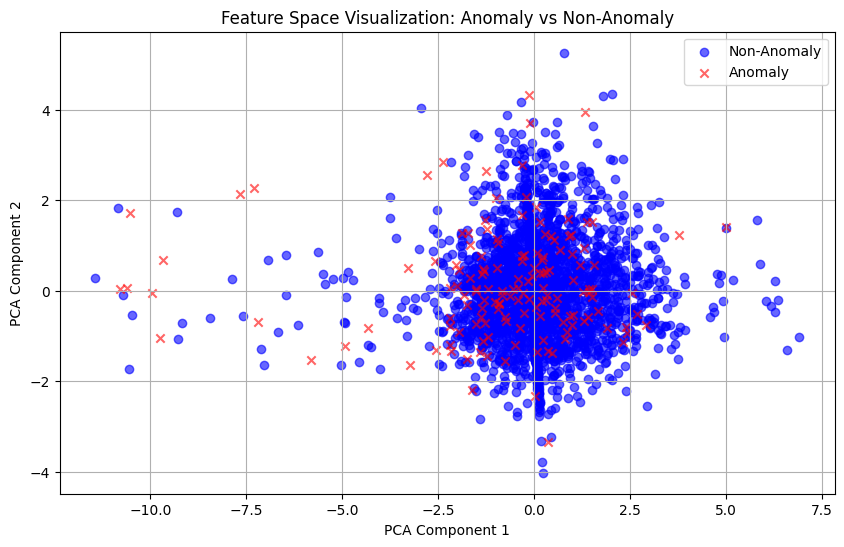

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/anomaly_detect_for_INS-W_1.csv')

# Filter the first 100 participants
df = df[df['pid'].isin(df['pid'].unique()[:50])]

# Define features
selected_features = [
    'f_steps:fitbit_steps_summary_rapids_minsumsteps:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_greens:allday',
]

selected_features_N1 = [
    'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday',
    'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday',
]

# Add a rolling mean of the previous 7 days for each feature
for feature in selected_features_N1:
    df[f"{feature}_7day_avg"] = (
        df.groupby('pid')[feature]
        .rolling(window=1, min_periods=1)
        .mean()
        .reset_index(0, drop=True)
    )

all_features = selected_features + [f"{feature}_7day_avg" for feature in selected_features_N1]

# Drop rows with NaN
df = df.dropna(subset=all_features + ['anomaly'])

# Normalize features
scaler = StandardScaler()
df[all_features] = scaler.fit_transform(df[all_features])

# Extract labels and groups
X = df[all_features].to_numpy()
y = df['anomaly'].to_numpy()

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot
plt.figure(figsize=(10, 6))
for label, color, marker in zip([0, 1], ['blue', 'red'], ['o', 'x']):
    plt.scatter(
        X_pca[y == label, 0],  # PCA Component 1
        X_pca[y == label, 1],  # PCA Component 2
        c=color,
        label='Non-Anomaly' if label == 0 else 'Anomaly',
        alpha=0.6,
        marker=marker,
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Feature Space Visualization: Anomaly vs Non-Anomaly')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import seaborn as sns

# Combine features and labels into a single DataFrame
plot_df = pd.DataFrame(X, columns=all_features)
plot_df['anomaly'] = y

# Use Seaborn's pairplot for visualization
sns.pairplot(
    plot_df,
    vars=all_features[:],  # Adjust the number of features if needed
    hue='anomaly',
    palette={0: 'blue', 1: 'red'},
    diag_kind='kde',  # Kernel density estimate for the diagonal
)
plt.suptitle('Pairwise Feature Comparisons (Anomaly vs Non-Anomaly)', y=1.02)
plt.show()


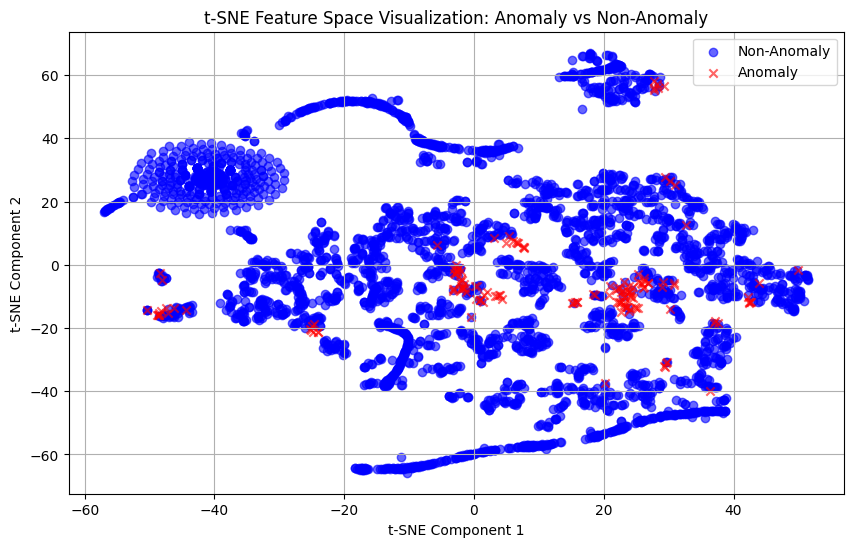

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE to reduce dimensions to 2
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

# Create a scatter plot
plt.figure(figsize=(10, 6))
for label, color, marker in zip([0, 1], ['blue', 'red'], ['o', 'x']):
    plt.scatter(
        X_tsne[y == label, 0],  # t-SNE Component 1
        X_tsne[y == label, 1],  # t-SNE Component 2
        c=color,
        label='Non-Anomaly' if label == 0 else 'Anomaly',
        alpha=0.6,
        marker=marker,
    )

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Feature Space Visualization: Anomaly vs Non-Anomaly')
plt.legend()
plt.grid()
plt.show()


# ** AUC-ROC Curve for OCSVM **

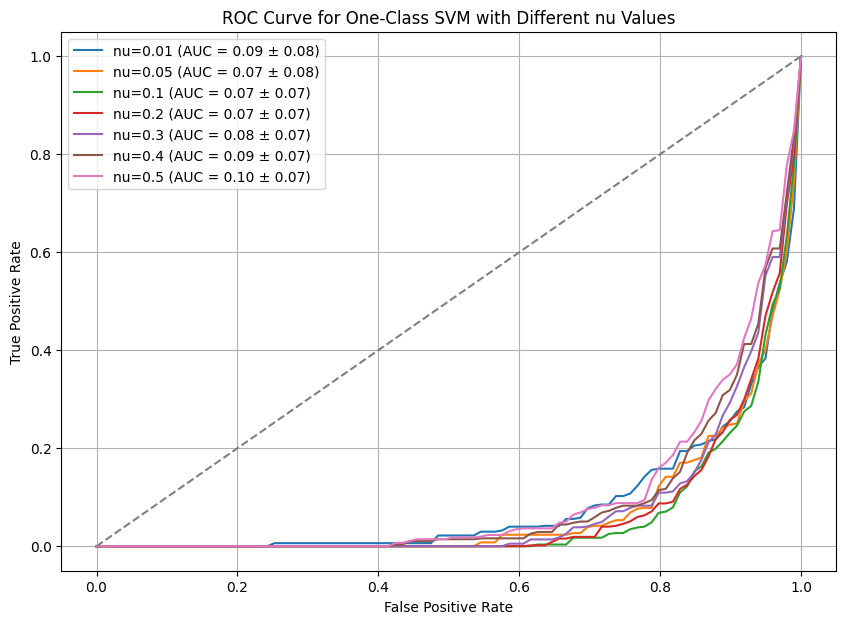

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/anomaly_detect_for_INS-W_1.csv')

# Filter the first 50 participants
df = df[df['pid'].isin(df['pid'].unique()[:50])]

# Define features
selected_features = [
    'f_steps:fitbit_steps_summary_rapids_minsumsteps:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_greens:allday',
]

selected_features_N1 = [
    'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday',
    'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday',
]

# Add a rolling mean of the previous 7 days for each feature
for feature in selected_features_N1:
    df[f"{feature}_7day_avg"] = (
        df.groupby('pid')[feature]
        .rolling(window=1, min_periods=1)
        .mean()
        .reset_index(0, drop=True)
    )

all_features = selected_features + [f"{feature}_7day_avg" for feature in selected_features_N1]

# Drop rows with NaN
df = df.dropna(subset=all_features + ['anomaly'])

# Normalize features
scaler = StandardScaler()
df[all_features] = scaler.fit_transform(df[all_features])

# Extract labels and groups
X = df[all_features].to_numpy()
y = df['anomaly'].to_numpy()
groups = df['pid'].to_numpy()

# Variations of nu to test
nu_values = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

# Initialize LOSO
logo = LeaveOneGroupOut()

# Store ROC curve data
all_fpr = []
all_tpr = []
all_auc = []

plt.figure(figsize=(10, 7))
for nu in nu_values:
    one_class_svm = OneClassSVM(kernel='rbf', nu=nu, gamma='auto')
    tprs = []
    mean_fpr = np.linspace(0, 1, 100)
    valid_pids = []

    for train_index, test_index in logo.split(X, y, groups):
        # Split the data
        X_train, X_test = X[train_index], X[test_index]
        y_test = y[test_index]
        pid = groups[test_index][0]

        # Train One-Class SVM only on the normal data
        X_train_normal = X_train[y[train_index] == 0]
        one_class_svm.fit(X_train_normal)

        # Predict anomaly scores
        svm_scores = one_class_svm.decision_function(X_test)  # Higher scores indicate normal
        svm_predictions = one_class_svm.predict(X_test)  # +1 for normal, -1 for anomalies

        # Convert SVM predictions to match anomaly labels
        svm_predictions = np.where(svm_predictions == 1, 0, 1)  # 1 for anomaly, 0 for normal

        # Check if both classes are present
        if len(np.unique(y_test)) == 2:
            fpr, tpr, _ = roc_curve(y_test, svm_scores)
            roc_auc = auc(fpr, tpr)
            tprs.append(np.interp(mean_fpr, fpr, tpr))
            tprs[-1][0] = 0.0
            all_auc.append(roc_auc)
            valid_pids.append(pid)

    # Mean TPR and Plotting
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(all_auc)
    plt.plot(
        mean_fpr,
        mean_tpr,
        label=f"nu={nu} (AUC = {mean_auc:.2f} ± {std_auc:.2f})",
    )

plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for One-Class SVM with Different nu Values")
plt.legend(loc="best")
plt.grid()
plt.show()


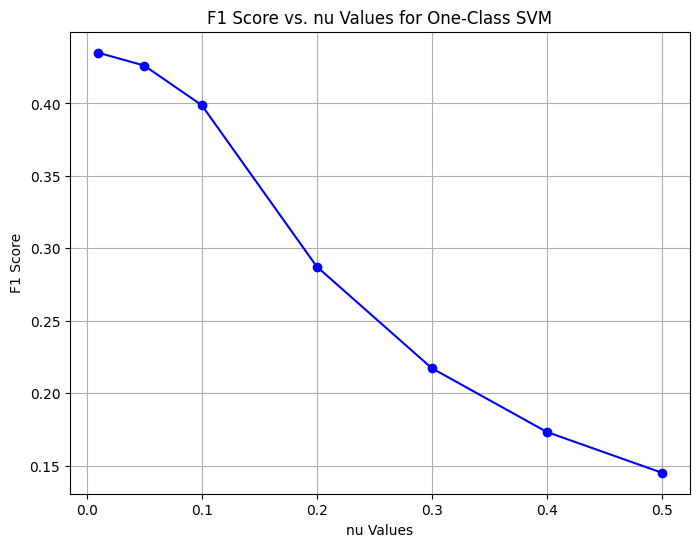

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/anomaly_detect_for_INS-W_1.csv')

# Filter the first 50 participants
df = df[df['pid'].isin(df['pid'].unique()[:50])]

# Define features
selected_features = [
    'f_steps:fitbit_steps_summary_rapids_minsumsteps:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_greens:allday',
]

selected_features_N1 = [
    'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday',
    'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday',
]

# Add a rolling mean of the previous 7 days for each feature
for feature in selected_features_N1:
    df[f"{feature}_7day_avg"] = (
        df.groupby('pid')[feature]
        .rolling(window=1, min_periods=1)
        .mean()
        .reset_index(0, drop=True)
    )

all_features = selected_features + [f"{feature}_7day_avg" for feature in selected_features_N1]

# Drop rows with NaN
df = df.dropna(subset=all_features + ['anomaly'])

# Normalize features
scaler = StandardScaler()
df[all_features] = scaler.fit_transform(df[all_features])

# Extract labels and groups
X = df[all_features].to_numpy()
y = df['anomaly'].to_numpy()
groups = df['pid'].to_numpy()

# Variations of nu to test
nu_values = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

# Initialize LOSO
logo = LeaveOneGroupOut()

# Store F1 scores
f1_scores = []

# Loop through nu values
for nu in nu_values:
    one_class_svm = OneClassSVM(kernel='rbf', nu=nu, gamma='auto')
    y_true, y_pred = [], []

    for train_index, test_index in logo.split(X, y, groups):
        # Split the data
        X_train, X_test = X[train_index], X[test_index]
        y_test = y[test_index]

        # Train One-Class SVM only on the normal data
        X_train_normal = X_train[y[train_index] == 0]
        one_class_svm.fit(X_train_normal)

        # Predict anomaly scores
        svm_predictions = one_class_svm.predict(X_test)  # +1 for normal, -1 for anomalies

        # Convert SVM predictions to match anomaly labels
        svm_predictions = np.where(svm_predictions == 1, 0, 1)  # 1 for anomaly, 0 for normal

        # Collect results
        y_true.extend(y_test)
        y_pred.extend(svm_predictions)

    # Calculate F1 score for this value of nu
    f1 = f1_score(y_true, y_pred, zero_division=1)
    f1_scores.append(f1)

# Plot F1 scores against nu values
plt.figure(figsize=(8, 6))
plt.plot(nu_values, f1_scores, marker='o', linestyle='-', color='blue')
plt.xlabel('nu Values')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. nu Values for One-Class SVM')
plt.grid()
plt.show()


# LSTM_RNN Evaluation Study

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/anomaly_detect_for_all_participants.csv')

# Filter the first 100 participants
df = df[df['pid'].isin(df['pid'].unique()[:50])]

# Define features
selected_features = [
    'f_steps:fitbit_steps_summary_rapids_minsumsteps:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_greens:allday',
]

selected_features_N1 = [
    'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday',
    'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday',
]

# Add a rolling mean of the previous 7 days for each feature
for feature in selected_features_N1:
    df[f"{feature}_7day_avg"] = (
        df.groupby('pid')[feature]
        .rolling(window=7, min_periods=1)
        .mean()
        .reset_index(0, drop=True)
    )

all_features = selected_features + [f"{feature}_7day_avg" for feature in selected_features_N1]

# Drop rows with NaN
df = df.dropna(subset=all_features + ['anomaly'])

# Normalize features
scaler = StandardScaler()
df[all_features] = scaler.fit_transform(df[all_features])

# Extract data and labels
X = df[all_features].to_numpy()
y = df['anomaly'].to_numpy()

# Reshape data for LSTM (samples, timesteps, features)
X_reshaped = X.reshape(X.shape[0], 1, X.shape[1])

# Define LSTM model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, input_shape=input_shape, return_sequences=True),
        Dropout(0.2),
        LSTM(32, return_sequences=False),
        Dropout(0.2),
        Dense(input_shape[1], activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# Train the LSTM Autoencoder on normal data
X_train_normal = X_reshaped[y == 0]  # Train only on normal data
model = create_lstm_model(input_shape=(X_train_normal.shape[1], X_train_normal.shape[2]))
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(
    X_train_normal, X_train_normal,
    epochs=50, batch_size=32, validation_split=0.2,
    callbacks=[early_stopping], verbose=1
)

# Use the trained model to calculate anomaly scores
X_pred = model.predict(X_reshaped)
reconstruction_errors = np.mean(np.square(X_reshaped - X_pred), axis=(1, 2))  # Calculate error for each sample

# Define a threshold for anomaly detection (e.g., 95th percentile of training errors)
threshold = np.percentile(
    np.mean(np.square(X_train_normal - model.predict(X_train_normal)), axis=(1, 2)),
    95
)

# Predict anomalies
y_pred = (reconstruction_errors > threshold).astype(int)  # Convert to binary labels

# Evaluate the results
print("Classification Report (LSTM Anomaly Detection):")
print(classification_report(y, y_pred))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.9908 - val_loss: 0.9585
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9367 - val_loss: 0.9616
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0643 - val_loss: 0.9620
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9748 - val_loss: 0.9615
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9957 - val_loss: 0.9629
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9351 - val_loss: 0.9637
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report (LSTM Anomaly Detection):
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      3483
           1       0.12      0.16      0.14       150

    accuracy                           0.92      3633
   macro avg       0.54      0.55      0.55      3633
weighted avg       0.93      0.92      0.92      3633



In [ ]:
print(balanced_accuracy_score(y, y_pred))

0.5548779787539477


# Autoencoder Evaluation Study

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/anomaly_detect_for_all_participants.csv')

# Filter the first 15 participants
df = df[df['pid'].isin(df['pid'].unique()[:50])]

# Define features
selected_features = [
    'f_steps:fitbit_steps_summary_rapids_minsumsteps:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_greens:allday',
]

selected_features_N1 = [
    'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday',
    'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday',
]

# Add a rolling mean of the previous 7 days for each feature
for feature in selected_features_N1:
    df[f"{feature}_7day_avg"] = (
        df.groupby('pid')[feature]
        .rolling(window=7, min_periods=1)
        .mean()
        .reset_index(0, drop=True)
    )

all_features = selected_features + [f"{feature}_7day_avg" for feature in selected_features_N1]

# Drop rows with NaN
df = df.dropna(subset=all_features + ['anomaly'])

# Normalize features
scaler = StandardScaler()
df[all_features] = scaler.fit_transform(df[all_features])

# Extract data and labels
X = df[all_features].to_numpy()
y = df['anomaly'].to_numpy()

# Define Autoencoder model
def create_autoencoder_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(input_dim, activation='linear')  # Output layer matches input dimension
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# Train the Autoencoder on normal data
X_train_normal = X[y == 0]  # Train only on normal data
autoencoder = create_autoencoder_model(input_dim=X_train_normal.shape[1])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
autoencoder.fit(
    X_train_normal, X_train_normal,
    epochs=50, batch_size=32, validation_split=0.2,
    callbacks=[early_stopping], verbose=1
)

# Use the trained Autoencoder to calculate anomaly scores
X_pred = autoencoder.predict(X)
reconstruction_errors = np.mean(np.square(X - X_pred), axis=1)  # Calculate error for each sample

# Define a threshold for anomaly detection (e.g., 95th percentile of training errors)
threshold = np.percentile(
    np.mean(np.square(X_train_normal - autoencoder.predict(X_train_normal)), axis=1),
    95
)

# Predict anomalies
y_pred = (reconstruction_errors > threshold).astype(int)  # Convert to binary labels

# Evaluate the results
print("Classification Report (Autoencoder Anomaly Detection):")
print(classification_report(y, y_pred))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.7938 - val_loss: 0.1327
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2937 - val_loss: 0.0695
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1995 - val_loss: 0.0368
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1733 - val_loss: 0.0334
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1938 - val_loss: 0.0377
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1699 - val_loss: 0.0305
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1581 - val_loss: 0.0317
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1487 - val_loss: 0.0317
Epoch 9/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1340 - val_loss: 0.0272
Epoch 10/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1442 - val_loss: 0.0296
Epoch 11/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1516 - val_loss: 0.0289
Epoch 12/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1376 - val

In [ ]:
print(balanced_accuracy_score(y, y_pred))

0.5482113120872811


In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn.model_selection import LeaveOneGroupOut

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/anomaly_detect_for_all_participants.csv')

# Filter the first 20 participants
df = df[df['pid'].isin(df['pid'].unique()[:50])]
# f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday
# f_slp:fitbit_sleep_summary_rapids_avgefficiencymain_norm:allday
# efficiency_bin
# bin_change
# f_slp:fitbit_sleep_summary_rapids_avgdurationawakemain:allday
# f_slp:fitbit_sleep_summary_rapids_avgdurationawakemain_norm:allday
# f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain:allday
# f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain_norm:allday
# f_slp:fitbit_sleep_summary_rapids_avgdurationinbedmain_norm:allday
# f_screen:phone_screen_rapids_maxdurationunlock_locmap_home_norm:allday
# f_slp:fitbit_sleep_summary_rapids_avgdurationinbedmain:allday
# f_slp:fitbit_sleep_summary_rapids_firstbedtimemain_norm:allday
# f_slp:fitbit_sleep_summary_rapids_sumdurationinbedmain:allday
# f_slp:fitbit_sleep_summary_rapids_sumdurationinbedmain_norm:allday
# f_steps:fitbit_steps_intraday_rapids_maxdurationsedentarybout:allday
# f_steps:fitbit_steps_intraday_rapids_maxdurationsedentarybout_norm:allday
# f_screen:phone_screen_rapids_maxdurationunlock_locmap_home:allday
# f_screen:phone_screen_rapids_sumdurationunlock_locmap_home:allday
# f_slp:fitbit_sleep_intraday_rapids_countepisodeasleepunifiedmain_norm:allday
# f_slp:fitbit_sleep_intraday_rapids_sumdurationawakeunifiedmain:allday
# f_slp:fitbit_sleep_intraday_rapids_sumdurationawakeunifiedmain_norm:allday
# f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday
# f_slp:fitbit_sleep_summary_rapids_lastbedtimemain_norm:allday
# f_steps:fitbit_steps_intraday_rapids_sumdurationactivebout:allday
# f_steps:fitbit_steps_intraday_rapids_sumdurationactivebout_norm:allday
# f_steps:fitbit_steps_intraday_rapids_sumdurationsedentarybout:allday
# f_steps:fitbit_steps_intraday_rapids_sumdurationsedentarybout_norm:allday
# f_screen:phone_screen_rapids_countepisodeunlock:allday
# f_screen:phone_screen_rapids_sumdurationunlock:allday
# f_slp:fitbit_sleep_intraday_rapids_countepisodeasleepunifiedmain:allday

# Define features
selected_features = [
    'f_steps:fitbit_steps_summary_rapids_minsumsteps:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_greens:allday',
    'f_screen:phone_screen_rapids_maxdurationunlock_locmap_home_norm:allday',
    'f_steps:fitbit_steps_intraday_rapids_maxdurationsedentarybout:allday',
'f_steps:fitbit_steps_intraday_rapids_maxdurationsedentarybout_norm:allday',
'f_screen:phone_screen_rapids_maxdurationunlock_locmap_home:allday',
'f_screen:phone_screen_rapids_sumdurationunlock_locmap_home:allday',
    'f_steps:fitbit_steps_intraday_rapids_sumdurationactivebout:allday',
'f_steps:fitbit_steps_intraday_rapids_sumdurationactivebout_norm:allday',
'f_steps:fitbit_steps_intraday_rapids_sumdurationsedentarybout:allday',
'f_steps:fitbit_steps_intraday_rapids_sumdurationsedentarybout_norm:allday',
'f_screen:phone_screen_rapids_countepisodeunlock:allday',
'f_screen:phone_screen_rapids_sumdurationunlock:allday'
]


# 'f_steps:fitbit_steps_summary_rapids_mediansumsteps:allday',
#     'f_steps:fitbit_steps_summary_rapids_maxsumsteps:allday',
#     'f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday',
#     'f_steps:fitbit_steps_intraday_rapids_sumsteps:allday',
#     'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_home:allday',
#     'f_screen:phone_screen_rapids_firstuseafter00unlock:allday',
#     'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_living:allday',
selected_features_N1 = [
    'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain_norm:allday',
    'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday',
    'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_avgdurationawakemain:allday',
'f_slp:fitbit_sleep_summary_rapids_avgdurationawakemain_norm:allday',
'f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain:allday',
'f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain_norm:allday',
'f_slp:fitbit_sleep_summary_rapids_avgdurationinbedmain_norm:allday'
]

# Add a rolling mean of the previous 7 days for each feature
for feature in selected_features_N1:
    df[f"{feature}_7day_avg"] = (
        df.groupby('pid')[feature]
        .shift(1)
        .rolling(window=7, min_periods=1)
        .mean()
        .reset_index(0, drop=True)
    )
for feature in selected_features_N1:
    df[f"{feature}_3day_avg"] = (
        df.groupby('pid')[feature]
        .shift(1)
        .rolling(window=3, min_periods=1)
        .mean()
        .reset_index(0, drop=True)
    )

for feature in selected_features_N1:
    df[f"{feature}_7day_std"] = (
        df.groupby('pid')[feature]
        .shift(1)
        .rolling(window=7, min_periods=1)
        .std()
        .reset_index(0, drop=True)
    )
for feature in selected_features_N1:
    df[f"{feature}_3day_std"] = (
        df.groupby('pid')[feature]
        .shift(1)
        .rolling(window=3, min_periods=1)
        .std()
        .reset_index(0, drop=True)
    )

for feature in selected_features_N1:
    df[f"{feature}_1day_avg"] = (
        df.groupby('pid')[feature]
        .shift(1)
        .rolling(window=1, min_periods=1)
        .mean()
        .reset_index(0, drop=True)
    )
for feature in selected_features_N1:
    df[f"{feature}_15day_avg"] = (
        df.groupby('pid')[feature]
        .shift(1)
        .rolling(window=15, min_periods=1)
        .mean()
        .reset_index(0, drop=True)
    )

# Add a rolling mean of the previous 7 days for each feature
for feature_N in selected_features:
    df[f"{feature_N}_7day_avg"] = (
        df.groupby('pid')[feature_N]
        .shift(1)
        .rolling(window=7, min_periods=1)
        .mean()
        .reset_index(0, drop=True)
    )
for feature_N in selected_features:
    df[f"{feature_N}_3day_avg"] = (
        df.groupby('pid')[feature_N]
        .shift(1)
        .rolling(window=3, min_periods=1)
        .mean()
        .reset_index(0, drop=True)
    )

for feature_N in selected_features:
    df[f"{feature_N}_7day_std"] = (
        df.groupby('pid')[feature_N]
        .shift(1)
        .rolling(window=7, min_periods=1)
        .std()
        .reset_index(0, drop=True)
    )
for feature_N in selected_features:
    df[f"{feature_N}_3day_std"] = (
        df.groupby('pid')[feature_N]
        .shift(1)
        .rolling(window=3, min_periods=1)
        .std()
        .reset_index(0, drop=True)
    )

for feature_N in selected_features:
    df[f"{feature_N}_1day_avg"] = (
        df.groupby('pid')[feature_N]
        .shift(1)
        .rolling(window=1, min_periods=1)
        .mean()
        .reset_index(0, drop=True)
    )
for feature_N in selected_features:
    df[f"{feature_N}_15day_avg"] = (
        df.groupby('pid')[feature_N]
        .shift(1)
        .rolling(window=15, min_periods=1)
        .mean()
        .reset_index(0, drop=True)
    )

all_features = selected_features + [f"{feature}_7day_avg" for feature in selected_features_N1]+[f"{feature}_3day_avg" for feature in selected_features_N1]
# + [f"{feature}_7day_avg" for feature in selected_features_N1]+[f"{feature}_3day_avg" for feature in selected_features_N1]+[f"{feature}_7day_std" for feature in selected_features_N1]+[f"{feature}_3day_std" for feature in selected_features_N1] + [f"{feature_N}_7day_avg" for feature_N in selected_features]+[f"{feature_N}_3day_avg" for feature_N in selected_features]+[f"{feature_N}_7day_std" for feature_N in selected_features]+[f"{feature_N}_3day_std" for feature_N in selected_features]
# Drop rows with NaN
df = df.dropna(subset=all_features + ['anomaly'])

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(df[all_features])
y = df['anomaly']
groups = df['pid']

# # Apply SMOTE to oversample anomalies
# smote = SMOTE(sampling_strategy=0.2, random_state=42)  # Adjust the strategy to control oversampling
# X_smote, y_smote = smote.fit_resample(X, y)

# Split back into normal and anomalous data for anomaly detection
normal_data = X_smote[y_smote == 0]
anomalous_data = X_smote[y_smote == 1]
print(normal_data.shape)
print(anomalous_data.shape)
# Train One-Class SVM and Isolation Forest
one_class_svm = OneClassSVM(kernel='rbf', nu=0.5, gamma='auto')
one_class_svm.fit(normal_data)

iso_forest = IsolationForest(contamination=0.35, random_state=42)
iso_forest.fit(normal_data)

# Leave-One-Subject-Out Cross-Validation
logo = LeaveOneGroupOut()
y_true, y_pred = [], []
y_pred_and, y_pred_or = [], []

for train_index, test_index in logo.split(X, y, groups):
    X_test, y_test = X[test_index], y.iloc[test_index]

    # Predict anomalies using both models
    svm_predictions = one_class_svm.predict(X_test)
    iso_predictions = iso_forest.predict(X_test)

    # Convert predictions to binary: 1 for anomaly, 0 for normal
    svm_binary = (svm_predictions == -1).astype(int)
    iso_binary = (iso_predictions == -1).astype(int)

    # AND Logic: Both models must agree for anomaly
    combined_and = svm_binary & iso_binary

    # OR Logic: Either model flags an anomaly
    combined_or = svm_binary | iso_binary

    # Collect results
    y_true.extend(y_test)
    y_pred_and.extend(combined_and)
    y_pred_or.extend(combined_or)

# Evaluate AND Logic
print("Classification Report (AND Logic):")
print(classification_report(y_true, y_pred_and))
print(balanced_accuracy_score(y_true, y_pred_and))

# Evaluate OR Logic
print("Classification Report (OR Logic):")
print(classification_report(y_true, y_pred_or))
print(balanced_accuracy_score(y_true, y_pred_or))


<ipython-input-17-2d2ee99fc779>:162: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{feature_N}_3day_std"] = (
<ipython-input-17-2d2ee99fc779>:162: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{feature_N}_3day_std"] = (
<ipython-input-17-2d2ee99fc779>:162: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

(3482, 31)
(696, 31)
Classification Report (AND Logic):
              precision    recall  f1-score   support

           0       0.98      0.65      0.78      3482
           1       0.07      0.63      0.13       150

    accuracy                           0.65      3632
   macro avg       0.52      0.64      0.45      3632
weighted avg       0.94      0.65      0.75      3632

0.6384338502776182
Classification Report (OR Logic):
              precision    recall  f1-score   support

           0       0.98      0.50      0.66      3482
           1       0.06      0.78      0.12       150

    accuracy                           0.51      3632
   macro avg       0.52      0.64      0.39      3632
weighted avg       0.94      0.51      0.64      3632

0.6398564043653073


In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC  # For supervised SVM
from sklearn.ensemble import RandomForestClassifier  # Alternative supervised model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import LeaveOneGroupOut

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/anomaly_detect_for_all_participants.csv')

# Define features
selected_features = [
    'f_steps:fitbit_steps_summary_rapids_minsumsteps:allday',
    'f_steps:fitbit_steps_summary_rapids_mediansumsteps:allday',
    'f_steps:fitbit_steps_summary_rapids_maxsumsteps:allday',
    'f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday',
    'f_steps:fitbit_steps_intraday_rapids_sumsteps:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_home:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_living:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_greens:allday',
]

selected_features_N1 = [

    'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday',
]

# # Add a rolling mean of the previous 7 days for each feature
# for feature in selected_features_N1:
#     df[f"{feature}_7day_avg"] = (
#         df.groupby('pid')[feature]
#         .rolling(window=1, min_periods=1)
#         .mean()
#         .reset_index(0, drop=True)
#     )

# Add features for the previous day (N-1) using shift(1)
for feature in selected_features_N1:
    df[f"N1_{feature}"] = df.groupby('pid')[feature].shift(1)

all_features = selected_features + [f"N1_{feature}" for feature in selected_features_N1]

# # Drop rows with NaN after creating lagged features
# df = df.dropna(subset=[f"N1_{feature}" for feature in selected_features_N1])

# Drop rows with NaN
df = df.dropna(subset=all_features + ['anomaly'])

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(df[all_features])
y = df['anomaly']
groups = df['pid']

# # Apply SMOTE to oversample anomalies
# smote = SMOTE(sampling_strategy=0.2, random_state=42)
# X_smote=X
# y_smote=y

# # Train supervised models using both normal and anomaly data
# svm_model = SVC(kernel='rbf', gamma='auto', probability=True, random_state=42)
# svm_model.fit(X_smote, y_smote)

iso_forest = RandomForestClassifier(n_estimators=100, random_state=42)
iso_forest.fit(X, y)

# Leave-One-Subject-Out Cross-Validation
logo = LeaveOneGroupOut()
y_true, y_pred_svm, y_pred_rf = [], [], []

for train_index, test_index in logo.split(X, y, groups):
    X_test, y_test = X[test_index], y.iloc[test_index]

    # Predict using both models
    # svm_predictions = svm_model.predict(X_test)
    rf_predictions = iso_forest.predict(X_test)
    print(X_test)
    print(rf_predictions)
    # Collect results
    y_true.extend(y_test)
    # y_pred_svm.extend(svm_predictions)
    y_pred_rf.extend(rf_predictions)

# # Evaluate SVM Model
# print("Classification Report (SVM):")
# print(classification_report(y_true, y_pred_svm))

# Evaluate Random Forest Model
print("Classification Report (Random Forest):")
print(classification_report(y_true, y_pred_rf))


Streaming output truncated to the last 5000 lines.
 [-1.13597645 -1.13597645 -1.13597645 -1.13597645 -1.13595026 -0.59027776
  -0.56920199 -0.49910115  0.39102274  0.48920891  0.48324812]
 [-0.7826923  -0.7826923  -0.7826923  -0.7826923  -0.78263541  0.47145357
   0.77195461 -0.49910115  0.39102274 -1.02051232 -1.14962434]
 [-1.33535264 -1.33535264 -1.33535264 -1.33535264 -1.33534378 -0.5947102
  -0.57480095 -0.49910115  0.39102274 -0.56840329 -0.6606358 ]
 [-0.14975841 -0.14975841 -0.14975841 -0.14975841 -0.1496465  -0.53508849
   1.46329004 -0.49910115  0.39102274 -0.78638443 -0.89639813]
 [-0.3919874  -0.3919874  -0.3919874  -0.3919874  -0.39189654 -0.53508849
   1.75136354 -0.49910115  0.39102274 -1.1254662  -1.26313954]
 [-0.90199612 -0.90199612 -0.90199612 -0.90199612 -0.90194959  2.51324045
   1.23188898 -0.49910115  0.39102274 -0.03959719 -0.07122996]
 [-0.98287324 -0.98287324 -0.98287324 -0.98287324 -0.98283374 -0.5947102
  -0.57480095 -0.49910115  0.39102274 -0.3342754  -0.40

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import LeaveOneGroupOut

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/anomaly_detect_for_all_participants.csv')

# Define features
selected_features = [
    'f_steps:fitbit_steps_summary_rapids_minsumsteps:allday',
    'f_steps:fitbit_steps_summary_rapids_mediansumsteps:allday',
    'f_steps:fitbit_steps_summary_rapids_maxsumsteps:allday',
    'f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday',
    'f_steps:fitbit_steps_intraday_rapids_sumsteps:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_home:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_living:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_greens:allday',
]

selected_features_N1 = [
    'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday',
]

# Add features for the previous day (N-1) using shift(1)
for feature in selected_features_N1:
    df[f"N1_{feature}"] = df.groupby('pid')[feature].shift(1)

# Define all features (current day + previous day)
all_features = selected_features + [f"N1_{feature}" for feature in selected_features_N1]

# Drop rows with NaN after creating lagged features
df = df.dropna(subset=all_features + ['anomaly'])

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(df[all_features])
y = df['anomaly']
groups = df['pid']

# Initialize Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# Leave-One-Subject-Out Cross-Validation
logo = LeaveOneGroupOut()
y_true, y_pred = [], []

for train_index, test_index in logo.split(X, y, groups):
    # Split into training and testing data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the logistic regression model
    logistic_model.fit(X_train, y_train)

    # Predict on the test set
    predictions = logistic_model.predict(X_test)

    # Collect results
    y_true.extend(y_test)
    y_pred.extend(predictions)

# Evaluate Logistic Regression Model
print("Classification Report (Logistic Regression):")
print(classification_report(y_true, y_pred))


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     28187
           1       0.00      0.00      0.00      1256

    accuracy                           0.96     29443
   macro avg       0.48      0.50      0.49     29443
weighted avg       0.92      0.96      0.94     29443



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import LeaveOneGroupOut

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/anomaly_detect_for_all_participants.csv')

# Define features
selected_features = [
    'f_steps:fitbit_steps_summary_rapids_minsumsteps:allday',
    'f_steps:fitbit_steps_summary_rapids_mediansumsteps:allday',
    'f_steps:fitbit_steps_summary_rapids_maxsumsteps:allday',
    'f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday',
    'f_steps:fitbit_steps_intraday_rapids_sumsteps:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_home:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_living:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_greens:allday',
]

selected_features_N1 = [
    'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday',
]

# Add features for the previous day (N-1) using shift(1)
for feature in selected_features_N1:
    df[f"N1_{feature}"] = df.groupby('pid')[feature].shift(1)

# Define all features (current day + previous day)
all_features = selected_features + [f"N1_{feature}" for feature in selected_features_N1]

# Drop rows with NaN after creating lagged features
df = df.dropna(subset=all_features + ['anomaly'])

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(df[all_features])
y = df['anomaly']
groups = df['pid']

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Leave-One-Subject-Out Cross-Validation
logo = LeaveOneGroupOut()
y_true, y_pred = [], []

for train_index, test_index in logo.split(X, y, groups):
    # Split into training and testing data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the Random Forest model
    rf_model.fit(X_train, y_train)

    # Predict on the test set
    predictions = rf_model.predict(X_test)

    # Collect results
    y_true.extend(y_test)
    y_pred.extend(predictions)

# Evaluate Random Forest Model
print("Classification Report (Random Forest):")
print(classification_report(y_true, y_pred))


KeyboardInterrupt: 

In [ ]:
#### features N1 and N

import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import LeaveOneGroupOut

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/anomaly_detect_for_all_participants.csv')
df = df[df['pid'].isin(df['pid'].unique()[:20])]
# Define features
selected_features = [
    'f_steps:fitbit_steps_summary_rapids_minsumsteps:allday',
    #'f_steps:fitbit_steps_summary_rapids_mediansumsteps:allday',
    #'f_steps:fitbit_steps_summary_rapids_maxsumsteps:allday',
    # 'f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday',
    # 'f_steps:fitbit_steps_intraday_rapids_sumsteps:allday',
    # 'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_home:allday',
    # 'f_screen:phone_screen_rapids_firstuseafter00unlock:allday',
    # 'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_living:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_greens:allday',
]

selected_features_N1 = [
    'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday',
    'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday',
]

for feature_N1 in selected_features_N1:
    df[f"{feature_N1}_7day_avg"] = (
        df.groupby('pid')[feature_N1]
        .shift(1)  # Shift to exclude the current row
        .rolling(window=1, min_periods=1)  # Rolling window of 7 (now excluding current row)
        .mean()
        .reset_index(0, drop=True)
    )

for feature in selected_features:
    df[f"{feature}_7day_avg"] = (
        df.groupby('pid')[feature]
        .shift(1)  # Shift to exclude the current row
        .rolling(window=1, min_periods=1)  # Rolling window of 7 (now excluding current row)
        .mean()
        .reset_index(0, drop=True)
    )

all_features = selected_features + [f"{feature_N1}_7day_avg" for feature_N1 in selected_features_N1]+ [f"{feature}_7day_avg" for feature in selected_features]

# Add features for the previous day (N-1)
# for feature in selected_features_N1:
#     df[f"N1_{feature}"] = df.groupby('pid')[feature].shift(1)

# all_features = selected_features + [f"N1_{feature}" for feature in selected_features_N1]

# Drop rows with NaN
df = df.dropna(subset=all_features + ['anomaly'])

# Prepare data
X = df[all_features].to_numpy()
y = df['anomaly'].to_numpy()
groups = df['pid'].to_numpy()

# Leave-One-Subject-Out Cross-Validation
logo = LeaveOneGroupOut()
y_true, y_pred_rf = [], []

for train_index, test_index in logo.split(X, y, groups):
    # Split data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Normalize data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Oversample with SMOTE
    smote = SMOTE(sampling_strategy='minority', random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    # Train Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predict
    rf_predictions = rf_model.predict(X_test)

    # Collect results
    y_true.extend(y_test)
    y_pred_rf.extend(rf_predictions)

# Evaluate Random Forest Model
print("Classification Report (Random Forest):")
print(classification_report(y_true, y_pred_rf))


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1375
           1       0.06      0.07      0.07        60

    accuracy                           0.92      1435
   macro avg       0.51      0.51      0.51      1435
weighted avg       0.92      0.92      0.92      1435



In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/anomaly_detect_for_all_participants.csv')
df = df[df['pid'].isin(df['pid'].unique()[:20])]

# Define features
selected_features = [
    'f_steps:fitbit_steps_summary_rapids_minsumsteps:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_greens:allday',
]

selected_features_N1 = [
    'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday',
    'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday',
]

for feature_N1 in selected_features_N1:
    df[f"{feature_N1}_7day_avg"] = (
        df.groupby('pid')[feature_N1]
        .shift(1)  # Shift to exclude the current row
        .rolling(window=1, min_periods=1)  # Rolling window of 7 (now excluding current row)
        .mean()
        .reset_index(0, drop=True)
    )

for feature in selected_features:
    df[f"{feature}_7day_avg"] = (
        df.groupby('pid')[feature]
        .shift(1)  # Shift to exclude the current row
        .rolling(window=1, min_periods=1)  # Rolling window of 7 (now excluding current row)
        .mean()
        .reset_index(0, drop=True)
    )

all_features = selected_features + [f"{feature_N1}_7day_avg" for feature_N1 in selected_features_N1]+ [f"{feature}_7day_avg" for feature in selected_features]

# # Add features for the previous day (N-1)
# for feature in selected_features_N1:
#     df[f"N1_{feature}"] = df.groupby('pid')[feature].shift(1)

# all_features = selected_features + [f"N1_{feature}" for feature in selected_features_N1]

# Drop rows with NaN
df = df.dropna(subset=all_features + ['anomaly'])

# Initialize results
y_true, y_pred = [], []

# Group data by participants
grouped = df.groupby('pid')

for pid, group in grouped:
    # Ensure the participant has at least 21 days of data (7 for training, 14 for testing)
    if len(group) < 21:
        continue

    # Split into training (first 7 days) and testing (last 14 days)
    train_data = group.iloc[:7]
    test_data = group.iloc[-14:]

    # Prepare training and testing data
    X_train = train_data[all_features].to_numpy()
    y_train = train_data['anomaly'].to_numpy()
    X_test = test_data[all_features].to_numpy()
    y_test = test_data['anomaly'].to_numpy()

    # Normalize data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # #Check if there is only one class in y_train
    # if len(np.unique(y_train)) > 1:
    #     # Oversample the minority class (anomalies) using SMOTE
    #     smote = SMOTE(sampling_strategy='minority', random_state=42)
    #     X_train, y_train = smote.fit_resample(X_train, y_train)
    # else:
    #     print(f"Skipping SMOTE for PID {pid} due to single class in training data.")

    # # Oversample the minority class (anomalies) using SMOTE
    # smote = SMOTE(sampling_strategy='minority', random_state=42)
    # X_train, y_train = smote.fit_resample(X_train, y_train)

    # Train the Random Forest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predict anomalies on the test data
    rf_predictions = rf_model.predict(X_test)

    # Collect results
    y_true.extend(y_test)
    y_pred.extend(rf_predictions)

# Evaluate the model
print("Classification Report (Random Forest):")
print(classification_report(y_true, y_pred))


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       270
           1       0.25      0.10      0.14        10

    accuracy                           0.96       280
   macro avg       0.61      0.54      0.56       280
weighted avg       0.94      0.96      0.95       280



# **This is Final** :( Random forest


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, balanced_accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import LeaveOneGroupOut

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/anomaly_detect_for_all_participants.csv')
df = df[df['pid'].isin(df['pid'].unique()[:50])]
print(len(df['pid'].unique()), df['pid'].unique())

# Define features
# selected_features = [
#     'f_steps:fitbit_steps_summary_rapids_minsumsteps:allday',
#     'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_greens:allday',
#     'f_screen:phone_screen_rapids_maxdurationunlock_locmap_home_norm:allday',
#     'f_steps:fitbit_steps_intraday_rapids_maxdurationsedentarybout:allday',
# 'f_steps:fitbit_steps_intraday_rapids_maxdurationsedentarybout_norm:allday',
# 'f_screen:phone_screen_rapids_maxdurationunlock_locmap_home:allday',
# 'f_screen:phone_screen_rapids_sumdurationunlock_locmap_home:allday',
#     'f_steps:fitbit_steps_intraday_rapids_sumdurationactivebout:allday',
# 'f_steps:fitbit_steps_intraday_rapids_sumdurationactivebout_norm:allday',
# 'f_steps:fitbit_steps_intraday_rapids_sumdurationsedentarybout:allday',
# 'f_steps:fitbit_steps_intraday_rapids_sumdurationsedentarybout_norm:allday',
# 'f_screen:phone_screen_rapids_countepisodeunlock:allday',
# 'f_screen:phone_screen_rapids_sumdurationunlock:allday'
# ]


# # 'f_steps:fitbit_steps_summary_rapids_mediansumsteps:allday',
# #     'f_steps:fitbit_steps_summary_rapids_maxsumsteps:allday',
# #     'f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday',
# #     'f_steps:fitbit_steps_intraday_rapids_sumsteps:allday',
# #     'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_home:allday',
# #     'f_screen:phone_screen_rapids_firstuseafter00unlock:allday',
# #     'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_living:allday',
# selected_features_N1 = [
#     'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain_norm:allday',
#     'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday',
#     'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday',
#     'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday',
#     'f_slp:fitbit_sleep_summary_rapids_avgdurationawakemain:allday',
# 'f_slp:fitbit_sleep_summary_rapids_avgdurationawakemain_norm:allday',
# 'f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain:allday',
# 'f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain_norm:allday',
# 'f_slp:fitbit_sleep_summary_rapids_avgdurationinbedmain_norm:allday'
# ]
selected_features = [
    'f_steps:fitbit_steps_summary_rapids_minsumsteps:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_greens:allday',
    'f_steps:fitbit_steps_intraday_rapids_sumdurationactivebout_norm:allday',
    'f_steps:fitbit_steps_intraday_rapids_sumdurationsedentarybout:allday',
    'f_steps:fitbit_steps_intraday_rapids_sumdurationsedentarybout:allday',
    'f_steps:fitbit_steps_intraday_rapids_sumdurationsedentarybout_norm:allday',
]

selected_features_N1 = [
    'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday',
    'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain_norm:allday',
    'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday',
]

# # Add features for the previous day (N-1)
# for feature in selected_features_N1:
#     df[f"N1_{feature}"] = df.groupby('pid')[feature].shift(1)

# all_features = selected_features + [f"N1_{feature}" for feature in selected_features_N1]

for feature_N1 in selected_features_N1:
    df[f"{feature_N1}_1day_avg"] = (
        df.groupby('pid')[feature_N1]
        .shift(1)  # Shift to exclude the current row
        .rolling(window=1, min_periods=1)  # Rolling window of 7 (now excluding current row)
        .mean()
        .reset_index(0, drop=True)
    )

for feature in selected_features:
    df[f"{feature}_1day_avg"] = (
        df.groupby('pid')[feature]
        .shift(1)  # Shift to exclude the current row
        .rolling(window=1, min_periods=1)  # Rolling window of 7 (now excluding current row)
        .mean()
        .reset_index(0, drop=True)
    )

for feature_N1 in selected_features_N1:
    df[f"{feature_N1}_3day_avg"] = (
        df.groupby('pid')[feature_N1]
        .shift(1)  # Shift to exclude the current row
        .rolling(window=3, min_periods=1)  # Rolling window of 7 (now excluding current row)
        .mean()
        .reset_index(0, drop=True)
    )

for feature in selected_features:
    df[f"{feature}_3day_avg"] = (
        df.groupby('pid')[feature]
        .shift(1)  # Shift to exclude the current row
        .rolling(window=3, min_periods=1)  # Rolling window of 7 (now excluding current row)
        .mean()
        .reset_index(0, drop=True)
    )

all_features = selected_features + [f"{feature_N1}_1day_avg" for feature_N1 in selected_features_N1]+ [f"{feature}_1day_avg" for feature in selected_features]+[f"{feature_N1}_3day_avg" for feature_N1 in selected_features_N1]+ [f"{feature}_3day_avg" for feature in selected_features]

# Drop rows with NaN
df = df.dropna(subset=all_features + ['anomaly'])

# Prepare data
X = df[all_features].to_numpy()
y = df['anomaly'].to_numpy()
groups = df['pid'].to_numpy()

# Initialize results
y_true, y_pred = [], []

# LOSO Cross-Validation
logo = LeaveOneGroupOut()

for train_index, test_index in logo.split(X, y, groups):
    # Split data into train and test sets
    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]

    # Extract the participant ID for the test group
    test_pid = test_data['pid'].unique()[0]

    # Train the model on N-1 participants
    X_train = train_data[all_features].to_numpy()
    y_train = train_data['anomaly'].to_numpy()

    # Normalize training data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)

    # # Oversample the minority class (anomalies) using SMOTE
    # smote = SMOTE(sampling_strategy='minority', random_state=42)
    # X_train, y_train = smote.fit_resample(X_train, y_train)

    # Train the Random Forest model
    rf_model = RandomForestClassifier(n_estimators=500, random_state=42, max_depth=40, class_weight='balanced')
    rf_model.fit(X_train, y_train)
    # lr_model = LogisticRegression(random_state=42, max_iter=500)
    # lr_model.fit(X_train, y_train)

    # Fine-tune the model using the first 7 days of the test participant
    fine_tune_data = test_data.iloc[:10]
    X_fine_tune = scaler.transform(fine_tune_data[all_features].to_numpy())
    y_fine_tune = fine_tune_data['anomaly'].to_numpy()

    # if len(np.unique(y_fine_tune)) > 1:  # Ensure more than one class is present
    #     smote = SMOTE(sampling_strategy='minority', random_state=42, k_neighbors=2)
    #     X_fine_tune, y_fine_tune = smote.fit_resample(X_fine_tune, y_fine_tune)

    rf_model.fit(X_fine_tune, y_fine_tune)

    # Test the model on the remaining 14 days of the test participant
    X_test = test_data.iloc[-14:][all_features].to_numpy()
    X_test = scaler.transform(X_test)
    y_test = test_data.iloc[-14:]['anomaly'].to_numpy()

    # Predict anomalies
    predictions = rf_model.predict(X_test)

    # Collect results
    y_true.extend(y_test)
    y_pred.extend(predictions)

# Evaluate the model
print("Classification Report (Random Forest with Fine-Tuning):")
print(classification_report(y_true, y_pred))
print(balanced_accuracy_score(y_true, y_pred))


50 ['INS-W_001#INS-W_1' 'INS-W_005#INS-W_1' 'INS-W_006#INS-W_1'
 'INS-W_010#INS-W_1' 'INS-W_011#INS-W_1' 'INS-W_012#INS-W_1'
 'INS-W_013#INS-W_1' 'INS-W_016#INS-W_1' 'INS-W_019#INS-W_1'
 'INS-W_022#INS-W_1' 'INS-W_023#INS-W_1' 'INS-W_026#INS-W_1'
 'INS-W_027#INS-W_1' 'INS-W_028#INS-W_1' 'INS-W_030#INS-W_1'
 'INS-W_031#INS-W_1' 'INS-W_032#INS-W_1' 'INS-W_033#INS-W_1'
 'INS-W_034#INS-W_1' 'INS-W_035#INS-W_1' 'INS-W_036#INS-W_1'
 'INS-W_037#INS-W_1' 'INS-W_038#INS-W_1' 'INS-W_039#INS-W_1'
 'INS-W_040#INS-W_1' 'INS-W_042#INS-W_1' 'INS-W_045#INS-W_1'
 'INS-W_046#INS-W_1' 'INS-W_048#INS-W_1' 'INS-W_049#INS-W_1'
 'INS-W_051#INS-W_1' 'INS-W_052#INS-W_1' 'INS-W_055#INS-W_1'
 'INS-W_058#INS-W_1' 'INS-W_061#INS-W_1' 'INS-W_064#INS-W_1'
 'INS-W_066#INS-W_1' 'INS-W_068#INS-W_1' 'INS-W_073#INS-W_1'
 'INS-W_074#INS-W_1' 'INS-W_075#INS-W_1' 'INS-W_077#INS-W_1'
 'INS-W_078#INS-W_1' 'INS-W_079#INS-W_1' 'INS-W_080#INS-W_1'
 'INS-W_081#INS-W_1' 'INS-W_082#INS-W_1' 'INS-W_090#INS-W_1'
 'INS-W_094#INS-W_1' 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, balanced_accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import LeaveOneGroupOut

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/anomaly_detect_for_all_participants.csv')
df = df[df['pid'].isin(df['pid'].unique()[:50])]
print(len(df['pid'].unique()), df['pid'].unique())

# Define features
# selected_features = [
#     'f_steps:fitbit_steps_summary_rapids_minsumsteps:allday',
#     'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_greens:allday',
#     'f_screen:phone_screen_rapids_maxdurationunlock_locmap_home_norm:allday',
#     'f_steps:fitbit_steps_intraday_rapids_maxdurationsedentarybout:allday',
# 'f_steps:fitbit_steps_intraday_rapids_maxdurationsedentarybout_norm:allday',
# 'f_screen:phone_screen_rapids_maxdurationunlock_locmap_home:allday',
# 'f_screen:phone_screen_rapids_sumdurationunlock_locmap_home:allday',
#     'f_steps:fitbit_steps_intraday_rapids_sumdurationactivebout:allday',
# 'f_steps:fitbit_steps_intraday_rapids_sumdurationactivebout_norm:allday',
# 'f_steps:fitbit_steps_intraday_rapids_sumdurationsedentarybout:allday',
# 'f_steps:fitbit_steps_intraday_rapids_sumdurationsedentarybout_norm:allday',
# 'f_screen:phone_screen_rapids_countepisodeunlock:allday',
# 'f_screen:phone_screen_rapids_sumdurationunlock:allday'
# ]


# # 'f_steps:fitbit_steps_summary_rapids_mediansumsteps:allday',
# #     'f_steps:fitbit_steps_summary_rapids_maxsumsteps:allday',
# #     'f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday',
# #     'f_steps:fitbit_steps_intraday_rapids_sumsteps:allday',
# #     'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_home:allday',
# #     'f_screen:phone_screen_rapids_firstuseafter00unlock:allday',
# #     'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_living:allday',
# selected_features_N1 = [
#     'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain_norm:allday',
#     'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday',
#     'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday',
#     'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday',
#     'f_slp:fitbit_sleep_summary_rapids_avgdurationawakemain:allday',
# 'f_slp:fitbit_sleep_summary_rapids_avgdurationawakemain_norm:allday',
# 'f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain:allday',
# 'f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain_norm:allday',
# 'f_slp:fitbit_sleep_summary_rapids_avgdurationinbedmain_norm:allday'
# ]

selected_features = [
    'f_steps:fitbit_steps_summary_rapids_minsumsteps:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_greens:allday',
    'f_steps:fitbit_steps_intraday_rapids_sumdurationactivebout_norm:allday',
    'f_steps:fitbit_steps_intraday_rapids_sumdurationsedentarybout:allday',
    'f_steps:fitbit_steps_intraday_rapids_sumdurationsedentarybout:allday',
    'f_steps:fitbit_steps_intraday_rapids_sumdurationsedentarybout_norm:allday',
]

selected_features_N1 = [
    'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday',
    'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain_norm:allday',
    'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday',
]

# # Add features for the previous day (N-1)
# for feature in selected_features_N1:
#     df[f"N1_{feature}"] = df.groupby('pid')[feature].shift(1)

# all_features = selected_features + [f"N1_{feature}" for feature in selected_features_N1]

for feature_N1 in selected_features_N1:
    df[f"{feature_N1}_1day_avg"] = (
        df.groupby('pid')[feature_N1]
        .shift(1)  # Shift to exclude the current row
        .rolling(window=3, min_periods=1)  # Rolling window of 7 (now excluding current row)
        .mean()
        .reset_index(0, drop=True)
    )

for feature in selected_features:
    df[f"{feature}_1day_avg"] = (
        df.groupby('pid')[feature]
        .shift(1)  # Shift to exclude the current row
        .rolling(window=3, min_periods=1)  # Rolling window of 7 (now excluding current row)
        .mean()
        .reset_index(0, drop=True)
    )

for feature_N1 in selected_features_N1:
    df[f"{feature_N1}_2day_avg"] = (
        df.groupby('pid')[feature_N1]
        .shift(2)  # Shift to exclude the current row
        .rolling(window=1, min_periods=1)  # Rolling window of 7 (now excluding current row)
        .mean()
        .reset_index(0, drop=True)
    )

for feature in selected_features:
    df[f"{feature}_2day_avg"] = (
        df.groupby('pid')[feature]
        .shift(2)  # Shift to exclude the current row
        .rolling(window=1, min_periods=1)  # Rolling window of 7 (now excluding current row)
        .mean()
        .reset_index(0, drop=True)
    )

for feature_N1 in selected_features_N1:
    df[f"{feature_N1}_3day_avg"] = (
        df.groupby('pid')[feature_N1]
        .shift(3)  # Shift to exclude the current row
        .rolling(window=1, min_periods=1)  # Rolling window of 7 (now excluding current row)
        .mean()
        .reset_index(0, drop=True)
    )

for feature in selected_features:
    df[f"{feature}_3day_avg"] = (
        df.groupby('pid')[feature]
        .shift(3)  # Shift to exclude the current row
        .rolling(window=1, min_periods=1)  # Rolling window of 7 (now excluding current row)
        .mean()
        .reset_index(0, drop=True)
    )

for feature_N1 in selected_features_N1:
    df[f"{feature_N1}_4day_avg"] = (
        df.groupby('pid')[feature_N1]
        .shift(4)  # Shift to exclude the current row
        .rolling(window=1, min_periods=1)  # Rolling window of 7 (now excluding current row)
        .mean()
        .reset_index(0, drop=True)
    )

for feature in selected_features:
    df[f"{feature}_4day_avg"] = (
        df.groupby('pid')[feature]
        .shift(4)  # Shift to exclude the current row
        .rolling(window=1, min_periods=1)  # Rolling window of 7 (now excluding current row)
        .mean()
        .reset_index(0, drop=True)
    )

for feature_N1 in selected_features_N1:
    df[f"{feature_N1}_5day_avg"] = (
        df.groupby('pid')[feature_N1]
        .shift(5)  # Shift to exclude the current row
        .rolling(window=1, min_periods=1)  # Rolling window of 7 (now excluding current row)
        .mean()
        .reset_index(0, drop=True)
    )

for feature in selected_features:
    df[f"{feature}_5day_avg"] = (
        df.groupby('pid')[feature]
        .shift(5)  # Shift to exclude the current row
        .rolling(window=1, min_periods=1)  # Rolling window of 7 (now excluding current row)
        .mean()
        .reset_index(0, drop=True)
    )

for feature_N1 in selected_features_N1:
    df[f"{feature_N1}_6day_avg"] = (
        df.groupby('pid')[feature_N1]
        .shift(6)  # Shift to exclude the current row
        .rolling(window=1, min_periods=1)  # Rolling window of 7 (now excluding current row)
        .mean()
        .reset_index(0, drop=True)
    )

for feature in selected_features:
    df[f"{feature}_6day_avg"] = (
        df.groupby('pid')[feature]
        .shift(6)  # Shift to exclude the current row
        .rolling(window=1, min_periods=1)  # Rolling window of 7 (now excluding current row)
        .mean()
        .reset_index(0, drop=True)
    )

for feature_N1 in selected_features_N1:
    df[f"{feature_N1}_7day_avg"] = (
        df.groupby('pid')[feature_N1]
        .shift(7)  # Shift to exclude the current row
        .rolling(window=1, min_periods=1)  # Rolling window of 7 (now excluding current row)
        .mean()
        .reset_index(0, drop=True)
    )

for feature in selected_features:
    df[f"{feature}_7day_avg"] = (
        df.groupby('pid')[feature]
        .shift(7)  # Shift to exclude the current row
        .rolling(window=1, min_periods=1)  # Rolling window of 7 (now excluding current row)
        .mean()
        .reset_index(0, drop=True)
    )

w = [f"{feature_N1}_1day_avg" for feature_N1 in selected_features_N1]+ [f"{feature}_1day_avg" for feature in selected_features] #+[f"{feature_N1}_2day_avg" for feature_N1 in selected_features_N1]+ [f"{feature}_2day_avg" for feature in selected_features]
x = [f"{feature_N1}_3day_avg" for feature_N1 in selected_features_N1]+ [f"{feature}_3day_avg" for feature in selected_features] #+[f"{feature_N1}_4day_avg" for feature_N1 in selected_features_N1]+ [f"{feature}_4day_avg" for feature in selected_features]
y = [f"{feature_N1}_5day_avg" for feature_N1 in selected_features_N1]+ [f"{feature}_5day_avg" for feature in selected_features] #+[f"{feature_N1}_6day_avg" for feature_N1 in selected_features_N1]+ [f"{feature}_6day_avg" for feature in selected_features]
z = [f"{feature_N1}_7day_avg" for feature_N1 in selected_features_N1]+ [f"{feature}_7day_avg" for feature in selected_features]

all_features = selected_features + w #+ x + y + z

# Drop rows with NaN
df = df.dropna(subset=all_features + ['anomaly'])

# Prepare data
X = df[all_features].to_numpy()
y = df['anomaly'].to_numpy()
groups = df['pid'].to_numpy()

# Initialize results
y_true, y_pred = [], []

# LOSO Cross-Validation
logo = LeaveOneGroupOut()

for train_index, test_index in logo.split(X, y, groups):
    # Split data into train and test sets
    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]

    # Extract the participant ID for the test group
    test_pid = test_data['pid'].unique()[0]

    # Train the model on N-1 participants
    X_train = train_data[all_features].to_numpy()
    y_train = train_data['anomaly'].to_numpy()

    # Normalize training data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)

    # Filter normal samples for training
    X_train_normal = X_train[y_train == 0]

    # Train OneClassSVM
    ocsvm = OneClassSVM(kernel='rbf', nu=0.05, gamma='auto')
    ocsvm.fit(X_train_normal)

    # # Fine-tune the model using the first 10 days of the test participant
    # fine_tune_data = test_data.iloc[:10]
    # X_fine_tune = scaler.transform(fine_tune_data[all_features].to_numpy())
    # y_fine_tune = fine_tune_data['anomaly'].to_numpy()

    # # Check if fine-tuning is feasible (needs at least one normal sample)
    # if len(np.unique(y_fine_tune)) > 1:
    #     fine_tune_normal = X_fine_tune[y_fine_tune == 0]
    #     if len(fine_tune_normal) > 0:
    #         ocsvm.fit(fine_tune_normal)

    # Test the model on the remaining 14 days of the test participant
    X_test = test_data.iloc[:][all_features].to_numpy()
    X_test = scaler.transform(X_test)
    y_test = test_data.iloc[:]['anomaly'].to_numpy()

    # Predict anomalies using OneClassSVM
    ocsvm_predictions = ocsvm.predict(X_test)
    # Convert predictions to binary: 1 for anomaly, 0 for normal
    ocsvm_predictions = np.where(ocsvm_predictions == 1, 0, 1)

    # Collect results
    y_true.extend(y_test)
    y_pred.extend(ocsvm_predictions)

# Evaluate the model
print("Classification Report (OneClassSVM with Fine-Tuning):")
print(classification_report(y_true, y_pred))
print(f"Balanced Accuracy Score: {balanced_accuracy_score(y_true, y_pred):.4f}")


50 ['INS-W_001#INS-W_1' 'INS-W_005#INS-W_1' 'INS-W_006#INS-W_1'
 'INS-W_010#INS-W_1' 'INS-W_011#INS-W_1' 'INS-W_012#INS-W_1'
 'INS-W_013#INS-W_1' 'INS-W_016#INS-W_1' 'INS-W_019#INS-W_1'
 'INS-W_022#INS-W_1' 'INS-W_023#INS-W_1' 'INS-W_026#INS-W_1'
 'INS-W_027#INS-W_1' 'INS-W_028#INS-W_1' 'INS-W_030#INS-W_1'
 'INS-W_031#INS-W_1' 'INS-W_032#INS-W_1' 'INS-W_033#INS-W_1'
 'INS-W_034#INS-W_1' 'INS-W_035#INS-W_1' 'INS-W_036#INS-W_1'
 'INS-W_037#INS-W_1' 'INS-W_038#INS-W_1' 'INS-W_039#INS-W_1'
 'INS-W_040#INS-W_1' 'INS-W_042#INS-W_1' 'INS-W_045#INS-W_1'
 'INS-W_046#INS-W_1' 'INS-W_048#INS-W_1' 'INS-W_049#INS-W_1'
 'INS-W_051#INS-W_1' 'INS-W_052#INS-W_1' 'INS-W_055#INS-W_1'
 'INS-W_058#INS-W_1' 'INS-W_061#INS-W_1' 'INS-W_064#INS-W_1'
 'INS-W_066#INS-W_1' 'INS-W_068#INS-W_1' 'INS-W_073#INS-W_1'
 'INS-W_074#INS-W_1' 'INS-W_075#INS-W_1' 'INS-W_077#INS-W_1'
 'INS-W_078#INS-W_1' 'INS-W_079#INS-W_1' 'INS-W_080#INS-W_1'
 'INS-W_081#INS-W_1' 'INS-W_082#INS-W_1' 'INS-W_090#INS-W_1'
 'INS-W_094#INS-W_1' 

# Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn.model_selection import LeaveOneGroupOut

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/anomaly_detect_for_all_participants.csv')
df = df[df['pid'].isin(df['pid'].unique()[:50])]
print(len(df['pid'].unique()), df['pid'].unique())

# Define features
selected_features = [
    'f_steps:fitbit_steps_summary_rapids_minsumsteps:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_greens:allday',
    'f_steps:fitbit_steps_intraday_rapids_sumdurationactivebout_norm:allday',
    'f_steps:fitbit_steps_intraday_rapids_sumdurationsedentarybout:allday',
    'f_steps:fitbit_steps_intraday_rapids_sumdurationsedentarybout_norm:allday',
]

selected_features_N1 = [
    'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday',
    'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain_norm:allday',
    'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday',
]

for feature_N1 in selected_features_N1:
    df[f"{feature_N1}_1day_avg"] = (
        df.groupby('pid')[feature_N1]
        .shift(1)  # Shift to exclude the current row
        .rolling(window=1, min_periods=1)  # Rolling window of 7 (now excluding current row)
        .mean()
        .reset_index(0, drop=True)
    )

for feature in selected_features:
    df[f"{feature}_1day_avg"] = (
        df.groupby('pid')[feature]
        .shift(1)  # Shift to exclude the current row
        .rolling(window=1, min_periods=1)  # Rolling window of 7 (now excluding current row)
        .mean()
        .reset_index(0, drop=True)
    )

for feature_N1 in selected_features_N1:
    df[f"{feature_N1}_3day_avg"] = (
        df.groupby('pid')[feature_N1]
        .shift(1)  # Shift to exclude the current row
        .rolling(window=3, min_periods=1)  # Rolling window of 7 (now excluding current row)
        .mean()
        .reset_index(0, drop=True)
    )

for feature in selected_features:
    df[f"{feature}_3day_avg"] = (
        df.groupby('pid')[feature]
        .shift(1)  # Shift to exclude the current row
        .rolling(window=3, min_periods=1)  # Rolling window of 7 (now excluding current row)
        .mean()
        .reset_index(0, drop=True)
    )

all_features = selected_features + [f"{feature_N1}_1day_avg" for feature_N1 in selected_features_N1]+ [f"{feature}_1day_avg" for feature in selected_features]+[f"{feature_N1}_3day_avg" for feature_N1 in selected_features_N1]+ [f"{feature}_3day_avg" for feature in selected_features]

# Drop rows with NaN
df = df.dropna(subset=all_features + ['efficiency_bin'])

# Prepare data
X = df[all_features].to_numpy()
y = df['efficiency_bin'].to_numpy()  # Use 'efficiency_bin' as the target variable
groups = df['pid'].to_numpy()

# Initialize results
y_true, y_pred = [], []

# LOSO Cross-Validation
logo = LeaveOneGroupOut()

for train_index, test_index in logo.split(X, y, groups):
    # Split data into train and test sets
    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]

    # Extract the participant ID for the test group
    test_pid = test_data['pid'].unique()[0]

    # Train the model on N-1 participants
    X_train = train_data[all_features].to_numpy()
    y_train = train_data['efficiency_bin'].to_numpy()

    # Normalize training data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)

    # Train the Logistic Regression model
    lr_model = LogisticRegression(random_state=42, max_iter=500, multi_class='ovr')  # Multi-class Logistic Regression
    lr_model.fit(X_train, y_train)

    # # Fine-tune the model using all days except the last 14 days of the test participant
    # fine_tune_data = test_data.iloc[:-14]
    # X_fine_tune = scaler.transform(fine_tune_data[all_features].to_numpy())
    # y_fine_tune = fine_tune_data['efficiency_bin'].to_numpy()

    # lr_model.fit(X_fine_tune, y_fine_tune)

    # Test the model on the last 14 days of the test participant
    X_test = test_data.iloc[:][all_features].to_numpy()
    X_test = scaler.transform(X_test)
    y_test = test_data.iloc[:]['efficiency_bin'].to_numpy()

    # Predict efficiency bins
    predictions = lr_model.predict(X_test)

    # Collect results
    y_true.extend(y_test)
    y_pred.extend(predictions)

# Evaluate the model
print("Classification Report (Logistic Regression with Fine-Tuning):")
print(classification_report(y_true, y_pred))
print(f"Balanced Accuracy Score: {balanced_accuracy_score(y_true, y_pred):.4f}")


50 ['INS-W_001#INS-W_1' 'INS-W_005#INS-W_1' 'INS-W_006#INS-W_1'
 'INS-W_010#INS-W_1' 'INS-W_011#INS-W_1' 'INS-W_012#INS-W_1'
 'INS-W_013#INS-W_1' 'INS-W_016#INS-W_1' 'INS-W_019#INS-W_1'
 'INS-W_022#INS-W_1' 'INS-W_023#INS-W_1' 'INS-W_026#INS-W_1'
 'INS-W_027#INS-W_1' 'INS-W_028#INS-W_1' 'INS-W_030#INS-W_1'
 'INS-W_031#INS-W_1' 'INS-W_032#INS-W_1' 'INS-W_033#INS-W_1'
 'INS-W_034#INS-W_1' 'INS-W_035#INS-W_1' 'INS-W_036#INS-W_1'
 'INS-W_037#INS-W_1' 'INS-W_038#INS-W_1' 'INS-W_039#INS-W_1'
 'INS-W_040#INS-W_1' 'INS-W_042#INS-W_1' 'INS-W_045#INS-W_1'
 'INS-W_046#INS-W_1' 'INS-W_048#INS-W_1' 'INS-W_049#INS-W_1'
 'INS-W_051#INS-W_1' 'INS-W_052#INS-W_1' 'INS-W_055#INS-W_1'
 'INS-W_058#INS-W_1' 'INS-W_061#INS-W_1' 'INS-W_064#INS-W_1'
 'INS-W_066#INS-W_1' 'INS-W_068#INS-W_1' 'INS-W_073#INS-W_1'
 'INS-W_074#INS-W_1' 'INS-W_075#INS-W_1' 'INS-W_077#INS-W_1'
 'INS-W_078#INS-W_1' 'INS-W_079#INS-W_1' 'INS-W_080#INS-W_1'
 'INS-W_081#INS-W_1' 'INS-W_082#INS-W_1' 'INS-W_090#INS-W_1'
 'INS-W_094#INS-W_1' 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

Classification Report (Logistic Regression with Fine-Tuning):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        12
           2       0.05      0.01      0.01       163
           3       0.95      1.00      0.97      3396

    accuracy                           0.95      3583
   macro avg       0.25      0.25      0.25      3583
weighted avg       0.90      0.95      0.92      3583

Balanced Accuracy Score: 0.2511


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, balanced_accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import LeaveOneGroupOut

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/anomaly_detect_for_all_participants.csv')
df = df[df['pid'].isin(df['pid'].unique()[:15])]
print(len(df['pid'].unique()), df['pid'].unique())

# Define features
selected_features = [
    'f_steps:fitbit_steps_summary_rapids_minsumsteps:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_greens:allday',
    'f_steps:fitbit_steps_intraday_rapids_sumdurationactivebout_norm:allday',
    'f_steps:fitbit_steps_intraday_rapids_sumdurationsedentarybout:allday',
    'f_steps:fitbit_steps_intraday_rapids_sumdurationsedentarybout:allday',
    'f_steps:fitbit_steps_intraday_rapids_sumdurationsedentarybout_norm:allday',
]

selected_features_N1 = [
    'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday',
    'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain_norm:allday',
    'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday',
]

# Add features for the previous day (N-1)
for feature in selected_features_N1:
    df[f"N1_{feature}"] = df.groupby('pid')[feature].shift(1)

all_features = selected_features + [f"N1_{feature}" for feature in selected_features_N1]

# Drop rows with NaN
df = df.dropna(subset=all_features + ['anomaly'])

# Prepare data
X = df[all_features].to_numpy()
y = df['anomaly'].to_numpy()
groups = df['pid'].to_numpy()

# Initialize results
y_true, y_pred = [], []

# LOSO Cross-Validation
logo = LeaveOneGroupOut()

for train_index, test_index in logo.split(X, y, groups):
    # Split data into train and test sets
    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]

    # Extract the participant ID for the test group
    test_pid = test_data['pid'].unique()[0]

    # Train the model on N-1 participants
    X_train = train_data[all_features].to_numpy()
    y_train = train_data['anomaly'].to_numpy()

    # Normalize training data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)

    # Oversample the minority class (anomalies) using SMOTE
    smote = SMOTE(sampling_strategy='minority', random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    # Train the XGBoost model
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    xgb_model.fit(X_train, y_train)

    # Fine-tune the model using the first 7 days of the test participant
    fine_tune_data = test_data.iloc[:7]
    X_fine_tune = scaler.transform(fine_tune_data[all_features].to_numpy())
    y_fine_tune = fine_tune_data['anomaly'].to_numpy()

    # Ensure more than one class is present for fine-tuning
    if len(np.unique(y_fine_tune)) > 1:
        X_fine_tune, y_fine_tune = smote.fit_resample(X_fine_tune, y_fine_tune)
        xgb_model.fit(X_fine_tune, y_fine_tune)

    # Test the model on the remaining 14 days of the test participant
    X_test = test_data.iloc[-14:][all_features].to_numpy()
    X_test = scaler.transform(X_test)
    y_test = test_data.iloc[-14:]['anomaly'].to_numpy()

    # Predict anomalies
    predictions = xgb_model.predict(X_test)

    # Collect results
    y_true.extend(y_test)
    y_pred.extend(predictions)

# Evaluate the model
print("Classification Report (XGBoost with Fine-Tuning):")
print(classification_report(y_true, y_pred))
print(f"Balanced Accuracy Score: {balanced_accuracy_score(y_true, y_pred):.4f}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/anomaly_detect_for_all_participants.csv')

# Filter the first 20 participants
df = df[df['pid'].isin(df['pid'].unique()[:20])]

# Define features
selected_features = [
    'f_steps:fitbit_steps_summary_rapids_minsumsteps:allday',
    'f_steps:fitbit_steps_summary_rapids_mediansumsteps:allday',
    'f_steps:fitbit_steps_summary_rapids_maxsumsteps:allday',
    'f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday',
    'f_steps:fitbit_steps_intraday_rapids_sumsteps:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_home:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_living:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_greens:allday',
]

selected_features_N1 = [
    'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday',
    'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday',
]

# Add a rolling mean of the previous 7 days for each feature
for feature in selected_features_N1:
    df[f"{feature}_7day_avg"] = (
        df.groupby('pid')[feature]
        .rolling(window=7, min_periods=1)
        .mean()
        .reset_index(0, drop=True)
    )

all_features = selected_features + [f"{feature}_7day_avg" for feature in selected_features_N1]

# Drop rows with NaN
df = df.dropna(subset=all_features + ['anomaly'])

# Extract groups for LOSO
groups = df['pid']
y = df['anomaly']

# Initialize results
y_true, y_pred = [], []

# Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()
for train_index, test_index in logo.split(df, y, groups):
    # Split train and test data
    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]

    # Fit Gaussian distributions on train data
    feature_means = train_data[all_features].mean()
    feature_stds = train_data[all_features].std()

    # Predict anomalies for test data
    for i, row in test_data.iterrows():
        test_features = row[all_features]
        likelihoods = -0.5 * np.log(2 * np.pi * feature_stds**2) - ((test_features - feature_means)**2) / (2 * feature_stds**2)
        total_likelihood = likelihoods.sum()

        # Threshold-based anomaly detection
        threshold = -90  # Adjust this threshold based on data distribution
        is_anomaly = 1 if total_likelihood < threshold else 0
        y_pred.append(is_anomaly)

        # Append true label
        y_true.append(row['anomaly'])

# Evaluate the results
print("Classification Report (LOSO):")
print(classification_report(y_true, y_pred))


Classification Report (LOSO):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1395
           1       0.04      1.00      0.08        60

    accuracy                           0.04      1455
   macro avg       0.02      0.50      0.04      1455
weighted avg       0.00      0.04      0.00      1455



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/anomaly_detect_for_all_participants.csv')

# Filter the first 20 participants
df = df[df['pid'].isin(df['pid'].unique()[:])]

# Define features
selected_features = [
    'f_steps:fitbit_steps_summary_rapids_minsumsteps:allday',
    'f_steps:fitbit_steps_summary_rapids_mediansumsteps:allday',
    'f_steps:fitbit_steps_summary_rapids_maxsumsteps:allday',
    'f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday',
    'f_steps:fitbit_steps_intraday_rapids_sumsteps:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_home:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_living:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_greens:allday',
]

selected_features_N1 = [
    'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday',
    'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday',
]

# Add a rolling mean of the previous 7 days for each feature
for feature in selected_features_N1:
    df[f"{feature}_7day_avg"] = (
        df.groupby('pid')[feature]
        .rolling(window=7, min_periods=1)
        .mean()
        .reset_index(0, drop=True)
    )

all_features = selected_features + [f"{feature}_7day_avg" for feature in selected_features_N1]

# Drop rows with NaN
df = df.dropna(subset=all_features + ['anomaly'])

# Group data by `pid`
grouped = df.groupby('pid')

# Initialize results
y_true, y_pred = [], []

# Perform anomaly detection for each participant
for pid, group in grouped:
    # Use all but the last day as training data
    train_data = group.iloc[:-1]
    test_data = group.iloc[-1:]  # Keep the last day as a DataFrame for easy manipulation

    # Store the true label for the test day
    y_true.append(test_data['anomaly'].values[0])

    # Fit Gaussian distributions for the features using the training data
    feature_means = train_data[all_features].mean()
    feature_stds = train_data[all_features].std()

    # Handle zero standard deviation by replacing with a small value
    feature_stds = feature_stds.replace(0, 1e-8)

    zero_variance_features = feature_stds[feature_stds == 1e-8].index.tolist()
    if zero_variance_features:
        print(f"Warning: Zero variance detected in features for pid {pid}: {zero_variance_features}")
        y_pred.append(0)  # Set prediction to 0 for zero-variance features
    else:
      # Predict anomaly for the test day
      for _, row in test_data.iterrows():
          test_features = row[all_features]
          likelihoods = -0.5 * np.log(2 * np.pi * feature_stds**2) - ((test_features - feature_means)**2) / (2 * feature_stds**2)
          total_likelihood = likelihoods.sum()
          print(f"total likelihood: {total_likelihood} for pid: {pid}")

          # Threshold for anomaly detection (adjust based on data)
          threshold = 0  # Use domain knowledge or validation to optimize this value
          is_anomaly = 1 if total_likelihood > threshold else 0
          y_pred.append(is_anomaly)

# Evaluate results
print("Classification Report (Per pid):")
print(classification_report(y_true, y_pred))


total likelihood: -95.34654196582208 for pid: INS-W_001#INS-W_1
total likelihood: -85.48921061799011 for pid: INS-W_005#INS-W_1
total likelihood: -84.15737224865002 for pid: INS-W_006#INS-W_1
total likelihood: -81.90521531684863 for pid: INS-W_010#INS-W_1
total likelihood: -74.40230053544386 for pid: INS-W_011#INS-W_1
total likelihood: -87.80104441765715 for pid: INS-W_012#INS-W_1
total likelihood: -87.09273470555605 for pid: INS-W_013#INS-W_1
total likelihood: -80.87818324069725 for pid: INS-W_019#INS-W_1
total likelihood: -89.17549882907132 for pid: INS-W_022#INS-W_1
total likelihood: -95.98601465513487 for pid: INS-W_023#INS-W_1
total likelihood: -82.21670621508588 for pid: INS-W_026#INS-W_1
total likelihood: -86.72448676981482 for pid: INS-W_028#INS-W_1
total likelihood: -86.05043062520325 for pid: INS-W_030#INS-W_1
total likelihood: -96.8631290718283 for pid: INS-W_031#INS-W_1
total likelihood: -80.75009325648243 for pid: INS-W_032#INS-W_1
total likelihood: -94.74853278583723 for 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score, classification_report

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/anomaly_detect_for_all_participants.csv')

# Filter the first 20 participants
df = df[df['pid'].isin(df['pid'].unique()[:])]

# Define features
selected_features = [
    'f_steps:fitbit_steps_summary_rapids_minsumsteps:allday',
    'f_steps:fitbit_steps_summary_rapids_mediansumsteps:allday',
    'f_steps:fitbit_steps_summary_rapids_maxsumsteps:allday',
    'f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday',
    'f_steps:fitbit_steps_intraday_rapids_sumsteps:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_home:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_living:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_greens:allday',
]

selected_features_N1 = [
    'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday',
    'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday',
]

# Add a rolling mean of the previous 7 days for each feature
for feature in selected_features_N1:
    df[f"{feature}_7day_avg"] = (
        df.groupby('pid')[feature]
        .rolling(window=7, min_periods=1)
        .mean()
        .reset_index(0, drop=True)
    )

all_features = selected_features + [f"{feature}_7day_avg" for feature in selected_features_N1]

# Drop rows with NaN
df = df.dropna(subset=all_features + ['anomaly'])

# Split into train/validation/test sets (80% train, 20% validation)
train_val_split = int(len(df) * 0.8)
train_data = df.iloc[:train_val_split]
val_data = df.iloc[train_val_split:]

# Group data by `pid`
train_grouped = train_data.groupby('pid')
val_grouped = val_data.groupby('pid')

# Initialize likelihoods and true labels for validation
val_likelihoods = []
val_labels = []

# Fit Gaussian models on training data and compute likelihoods for validation
for pid, group in train_grouped:
    if pid not in val_grouped.groups:
        continue

    train_group = group
    val_group = val_grouped.get_group(pid)

    # Fit Gaussian distributions for each feature
    feature_means = train_group[all_features].mean()
    feature_stds = train_group[all_features].std().replace(0, 1e-8)

    # Compute likelihoods for validation data
    for _, row in val_group.iterrows():
        test_features = row[all_features]
        likelihood = (
            -0.5 * np.log(2 * np.pi * feature_stds**2)
            - ((test_features - feature_means)**2) / (2 * feature_stds**2)
        ).sum()
        val_likelihoods.append(likelihood)
        val_labels.append(row['anomaly'])

# Convert validation likelihoods and labels to arrays
val_likelihoods = np.array(val_likelihoods)
val_labels = np.array(val_labels)

# Use precision-recall to find the optimal threshold
precision, recall, thresholds = precision_recall_curve(val_labels, val_likelihoods, pos_label=1)

# Compute F1-scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_threshold_idx]

print(f"Optimal Threshold: {optimal_threshold}, {val_likelihoods}, {val_labels}")

# Evaluate on the validation set with the optimal threshold
val_predictions = (val_likelihoods < optimal_threshold).astype(int)
print("Validation Classification Report:")
print(classification_report(val_labels, val_predictions))


Optimal Threshold: -22.194008888857493, [-11.87924003 -12.80898094 -12.27291442 -13.09357742 -15.05770885
 -16.75672923 -16.33317073 -18.45215662 -16.56938737 -16.3445892
 -22.19400889 -14.98509286 -13.20963859 -15.12368992], [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import precision_recall_curve, classification_report

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/anomaly_detect_for_all_participants.csv')

# Define features
selected_features = [
    'f_steps:fitbit_steps_summary_rapids_minsumsteps:allday',
    'f_steps:fitbit_steps_summary_rapids_mediansumsteps:allday',
    'f_steps:fitbit_steps_summary_rapids_maxsumsteps:allday',
    'f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday',
    'f_steps:fitbit_steps_intraday_rapids_sumsteps:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_home:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_living:allday',
    'f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_greens:allday',
]

selected_features_N1 = [
    'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday',
    'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday',
    'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday',
]

# Add a rolling mean of the previous 7 days for each feature
for feature in selected_features_N1:
    df[f"{feature}_7day_avg"] = (
        df.groupby('pid')[feature]
        .rolling(window=7, min_periods=1)
        .mean()
        .reset_index(0, drop=True)
    )

all_features = selected_features + [f"{feature}_7day_avg" for feature in selected_features_N1]

# Drop rows with NaN
df = df.dropna(subset=all_features + ['anomaly'])

# Extract groups for LOSO
groups = df['pid']
y = df['anomaly']

# Initialize results
y_true, y_pred = [], []

# Leave-One-Subject-Out Cross-Validation
logo = LeaveOneGroupOut()
for train_index, test_index in logo.split(df, y, groups):
    # Split train and test data
    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]

    # Fit Gaussian distributions for training data
    feature_means = train_data[all_features].mean()
    feature_stds = train_data[all_features].std().replace(0, 1e-8)

    # Compute likelihoods for test data
    test_likelihoods = []
    for _, row in test_data.iterrows():
        test_features = row[all_features]
        likelihood = (
            -0.5 * np.log(2 * np.pi * feature_stds**2)
            - ((test_features - feature_means)**2) / (2 * feature_stds**2)
        ).sum()
        test_likelihoods.append(likelihood)

    # Use validation data (a subset of test data) to optimize threshold
    test_likelihoods = np.array(test_likelihoods)
    test_labels = test_data['anomaly'].values

    precision, recall, thresholds = precision_recall_curve(test_labels, test_likelihoods, pos_label=1)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)  # Avoid division by zero
    optimal_threshold_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_threshold_idx]

    # Apply the optimal threshold to classify anomalies
    test_predictions = (test_likelihoods > optimal_threshold).astype(int)

    # Append results
    y_true.extend(test_labels)
    y_pred.extend(test_predictions)

    print(f"Participant PID: {test_data['pid'].iloc[0]}")
    print(f"Optimal Threshold: {optimal_threshold}")
    print(classification_report(test_labels, test_predictions))

# Final evaluation
print("\nFinal Classification Report (LOSO):")
print(classification_report(y_true, y_pred))


Participant PID: INS-W_001#INS-W_1
Optimal Threshold: -91.69351486161875
              precision    recall  f1-score   support

           0       0.98      0.59      0.74        69
           1       0.03      0.50      0.06         2

    accuracy                           0.59        71
   macro avg       0.51      0.55      0.40        71
weighted avg       0.95      0.59      0.72        71

Participant PID: INS-W_005#INS-W_1
Optimal Threshold: -98.75852236994866
              precision    recall  f1-score   support

           0       0.91      0.17      0.28        60
           1       0.00      0.00      0.00         1

    accuracy                           0.16        61
   macro avg       0.45      0.08      0.14        61
weighted avg       0.89      0.16      0.28        61

Participant PID: INS-W_006#INS-W_1
Optimal Threshold: -86.52227382067925
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        72
           1      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_011#INS-W_1
Optimal Threshold: -110.20174343413778
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        76
           1       0.00      0.00      0.00         0

    accuracy                           0.01        76
   macro avg       0.50      0.01      0.01        76
weighted avg       1.00      0.01      0.03        76

Participant PID: INS-W_012#INS-W_1
Optimal Threshold: -151.25393008863418
              precision    recall  f1-score   support

           0       0.86      0.09      0.16        70
           1       0.04      0.75      0.08         4

    accuracy                           0.12        74
   macro avg       0.45      0.42      0.12        74
weighted avg       0.81      0.12      0.15        74

Participant PID: INS-W_013#INS-W_1
Optimal Threshold: -98.84816848602732
              precision    recall  f1-score   support

           0       0.76      0.31      0.44        52
           1    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_016#INS-W_1
Optimal Threshold: -99.28544457246211
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        71
           1       0.00      0.00      0.00         0

    accuracy                           0.01        71
   macro avg       0.50      0.01      0.01        71
weighted avg       1.00      0.01      0.03        71



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_019#INS-W_1
Optimal Threshold: -100.77247264566496
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        76
           1       0.00      0.00      0.00         0

    accuracy                           0.01        76
   macro avg       0.50      0.01      0.01        76
weighted avg       1.00      0.01      0.03        76

Participant PID: INS-W_022#INS-W_1
Optimal Threshold: -96.15187611607998
              precision    recall  f1-score   support

           0       0.89      0.27      0.41        60
           1       0.19      0.83      0.30        12

    accuracy                           0.36        72
   macro avg       0.54      0.55      0.36        72
weighted avg       0.77      0.36      0.39        72



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_023#INS-W_1
Optimal Threshold: -113.97899796750099
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        77
           1       0.00      0.00      0.00         0

    accuracy                           0.01        77
   macro avg       0.50      0.01      0.01        77
weighted avg       1.00      0.01      0.03        77

Participant PID: INS-W_026#INS-W_1
Optimal Threshold: -88.371451500977
              precision    recall  f1-score   support

           0       0.98      0.58      0.73        71
           1       0.00      0.00      0.00         1

    accuracy                           0.57        72
   macro avg       0.49      0.29      0.36        72
weighted avg       0.96      0.57      0.72        72



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_027#INS-W_1
Optimal Threshold: -104.02316361628301
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        75
           1       0.00      0.00      0.00         0

    accuracy                           0.01        75
   macro avg       0.50      0.01      0.01        75
weighted avg       1.00      0.01      0.03        75

Participant PID: INS-W_028#INS-W_1
Optimal Threshold: -90.58686586636762
              precision    recall  f1-score   support

           0       0.95      0.59      0.73        68
           1       0.10      0.60      0.17         5

    accuracy                           0.59        73
   macro avg       0.52      0.59      0.45        73
weighted avg       0.89      0.59      0.69        73

Participant PID: INS-W_030#INS-W_1
Optimal Threshold: -87.64160820571318
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        68
           1     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_031#INS-W_1
Optimal Threshold: -110.68977626969317
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        77
           1       0.00      0.00      0.00         0

    accuracy                           0.01        77
   macro avg       0.50      0.01      0.01        77
weighted avg       1.00      0.01      0.03        77



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_032#INS-W_1
Optimal Threshold: -117.41929723370032
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        78
           1       0.00      0.00      0.00         0

    accuracy                           0.01        78
   macro avg       0.50      0.01      0.01        78
weighted avg       1.00      0.01      0.03        78

Participant PID: INS-W_033#INS-W_1
Optimal Threshold: -90.38151781748626
              precision    recall  f1-score   support

           0       0.94      0.51      0.66        67
           1       0.08      0.60      0.15         5

    accuracy                           0.51        72
   macro avg       0.51      0.55      0.40        72
weighted avg       0.88      0.51      0.62        72



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_034#INS-W_1
Optimal Threshold: -103.43366897705793
              precision    recall  f1-score   support

           0       1.00      0.02      0.03        64
           1       0.00      0.00      0.00         0

    accuracy                           0.02        64
   macro avg       0.50      0.01      0.02        64
weighted avg       1.00      0.02      0.03        64



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_035#INS-W_1
Optimal Threshold: -127.64728364962345
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        72
           1       0.00      0.00      0.00         0

    accuracy                           0.01        72
   macro avg       0.50      0.01      0.01        72
weighted avg       1.00      0.01      0.03        72

Participant PID: INS-W_036#INS-W_1
Optimal Threshold: -86.30646131100458
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.00      0.00      0.00         3

    accuracy                           0.90        71
   macro avg       0.48      0.47      0.47        71
weighted avg       0.91      0.90      0.91        71

Participant PID: INS-W_037#INS-W_1
Optimal Threshold: -86.02613179785747
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Participant PID: INS-W_038#INS-W_1
Optimal Threshold: -94.65976440275594
              precision    recall  f1-score   support

           0       0.89      0.61      0.72        64
           1       0.14      0.44      0.21         9

    accuracy                           0.59        73
   macro avg       0.51      0.53      0.47        73
weighted avg       0.79      0.59      0.66        73

Participant PID: INS-W_039#INS-W_1
Optimal Threshold: -93.74979106247028
              precision    recall  f1-score   support

           0       0.88      0.32      0.47        69
           1       0.10      0.62      0.17         8

    accuracy                           0.35        77
   macro avg       0.49      0.47      0.32        77
weighted avg       0.80      0.35      0.44        77

Participant PID: INS-W_040#INS-W_1
Optimal Threshold: -113.80107465984855
              precision    recall  f1-score   support

           0       0.67      0.03      0.05        71
           1     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_051#INS-W_1
Optimal Threshold: -105.04188001980239
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        78
           1       0.00      0.00      0.00         0

    accuracy                           0.01        78
   macro avg       0.50      0.01      0.01        78
weighted avg       1.00      0.01      0.03        78



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_052#INS-W_1
Optimal Threshold: -103.51398374847022
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        72
           1       0.00      0.00      0.00         0

    accuracy                           0.01        72
   macro avg       0.50      0.01      0.01        72
weighted avg       1.00      0.01      0.03        72

Participant PID: INS-W_055#INS-W_1
Optimal Threshold: -88.21342354596683
              precision    recall  f1-score   support

           0       0.93      0.59      0.72        73
           1       0.03      0.25      0.06         4

    accuracy                           0.57        77
   macro avg       0.48      0.42      0.39        77
weighted avg       0.89      0.57      0.69        77

Participant PID: INS-W_058#INS-W_1
Optimal Threshold: -103.77911118659858
              precision    recall  f1-score   support

           0       0.50      0.01      0.03        67
           1    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_064#INS-W_1
Optimal Threshold: -110.71334614272553
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        75
           1       0.00      0.00      0.00         0

    accuracy                           0.01        75
   macro avg       0.50      0.01      0.01        75
weighted avg       1.00      0.01      0.03        75

Participant PID: INS-W_066#INS-W_1
Optimal Threshold: -90.94594614759937
              precision    recall  f1-score   support

           0       0.89      0.14      0.24        58
           1       0.06      0.75      0.11         4

    accuracy                           0.18        62
   macro avg       0.47      0.44      0.17        62
weighted avg       0.84      0.18      0.23        62

Participant PID: INS-W_068#INS-W_1
Optimal Threshold: -98.71547652253783
              precision    recall  f1-score   support

           0       0.83      0.07      0.12        75
           1     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_079#INS-W_1
Optimal Threshold: -100.06392933561219
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        72
           1       0.00      0.00      0.00         0

    accuracy                           0.01        72
   macro avg       0.50      0.01      0.01        72
weighted avg       1.00      0.01      0.03        72

Participant PID: INS-W_080#INS-W_1
Optimal Threshold: -108.2404511372157
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        73
           1       0.00      0.00      0.00         0

    accuracy                           0.01        73
   macro avg       0.50      0.01      0.01        73
weighted avg       1.00      0.01      0.03        73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_081#INS-W_1
Optimal Threshold: -102.94336329541605
              precision    recall  f1-score   support

           0       1.00      0.02      0.03        61
           1       0.00      0.00      0.00         0

    accuracy                           0.02        61
   macro avg       0.50      0.01      0.02        61
weighted avg       1.00      0.02      0.03        61

Participant PID: INS-W_082#INS-W_1
Optimal Threshold: -88.88888641430547
              precision    recall  f1-score   support

           0       0.98      0.60      0.74        70
           1       0.00      0.00      0.00         1

    accuracy                           0.59        71
   macro avg       0.49      0.30      0.37        71
weighted avg       0.96      0.59      0.73        71



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_090#INS-W_1
Optimal Threshold: -110.67393742562801
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        78
           1       0.00      0.00      0.00         0

    accuracy                           0.01        78
   macro avg       0.50      0.01      0.01        78
weighted avg       1.00      0.01      0.03        78

Participant PID: INS-W_094#INS-W_1
Optimal Threshold: -90.93486276089133
              precision    recall  f1-score   support

           0       0.95      0.31      0.47        65
           1       0.02      0.50      0.04         2

    accuracy                           0.31        67
   macro avg       0.49      0.40      0.25        67
weighted avg       0.92      0.31      0.45        67



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_096#INS-W_1
Optimal Threshold: -115.78692936941668
              precision    recall  f1-score   support

           0       1.00      0.02      0.03        62
           1       0.00      0.00      0.00         0

    accuracy                           0.02        62
   macro avg       0.50      0.01      0.02        62
weighted avg       1.00      0.02      0.03        62

Participant PID: INS-W_098#INS-W_1
Optimal Threshold: -94.44516059324383
              precision    recall  f1-score   support

           0       0.90      0.55      0.68        69
           1       0.11      0.50      0.19         8

    accuracy                           0.55        77
   macro avg       0.51      0.53      0.44        77
weighted avg       0.82      0.55      0.63        77

Participant PID: INS-W_099#INS-W_1
Optimal Threshold: -87.64240637698133
              precision    recall  f1-score   support

           0       0.84      0.69      0.76        54
           1     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_100#INS-W_1
Optimal Threshold: -97.82851281754822
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        74
           1       0.00      0.00      0.00         0

    accuracy                           0.01        74
   macro avg       0.50      0.01      0.01        74
weighted avg       1.00      0.01      0.03        74



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_1000#INS-W_4
Optimal Threshold: -128.99744105655498
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        88
           1       0.00      0.00      0.00         0

    accuracy                           0.01        88
   macro avg       0.50      0.01      0.01        88
weighted avg       1.00      0.01      0.02        88

Participant PID: INS-W_1003#INS-W_4
Optimal Threshold: -90.98204468972149
              precision    recall  f1-score   support

           0       0.94      0.17      0.29        87
           1       0.00      0.00      0.00         1

    accuracy                           0.17        88
   macro avg       0.47      0.09      0.15        88
weighted avg       0.93      0.17      0.29        88

Participant PID: INS-W_1005#INS-W_4
Optimal Threshold: -109.36295664720178


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

              precision    recall  f1-score   support

           0       1.00      0.01      0.03        71
           1       0.00      0.00      0.00         0

    accuracy                           0.01        71
   macro avg       0.50      0.01      0.01        71
weighted avg       1.00      0.01      0.03        71

Participant PID: INS-W_1006#INS-W_4
Optimal Threshold: -87.47734779801499
              precision    recall  f1-score   support

           0       0.98      0.54      0.69        78
           1       0.00      0.00      0.00         1

    accuracy                           0.53        79
   macro avg       0.49      0.27      0.35        79
weighted avg       0.96      0.53      0.69        79



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_1007#INS-W_4
Optimal Threshold: -96.93687203912766
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        86
           1       0.00      0.00      0.00         0

    accuracy                           0.01        86
   macro avg       0.50      0.01      0.01        86
weighted avg       1.00      0.01      0.02        86



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_101#INS-W_1
Optimal Threshold: -95.24845968083541
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        77
           1       0.00      0.00      0.00         0

    accuracy                           0.01        77
   macro avg       0.50      0.01      0.01        77
weighted avg       1.00      0.01      0.03        77

Participant PID: INS-W_1010#INS-W_4
Optimal Threshold: -90.54357161030329
              precision    recall  f1-score   support

           0       0.97      0.49      0.65        78
           1       0.00      0.00      0.00         1

    accuracy                           0.48        79
   macro avg       0.49      0.24      0.32        79
weighted avg       0.96      0.48      0.64        79

Participant PID: INS-W_1011#INS-W_4
Optimal Threshold: -86.62415584071164
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        73
           1    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_1012#INS-W_4
Optimal Threshold: -99.46718723247066
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        78
           1       0.00      0.00      0.00         0

    accuracy                           0.01        78
   macro avg       0.50      0.01      0.01        78
weighted avg       1.00      0.01      0.03        78



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_1013#INS-W_4
Optimal Threshold: -100.23128970863432
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        78
           1       0.00      0.00      0.00         0

    accuracy                           0.01        78
   macro avg       0.50      0.01      0.01        78
weighted avg       1.00      0.01      0.03        78

Participant PID: INS-W_1016#INS-W_4
Optimal Threshold: -88.20063416762116
              precision    recall  f1-score   support

           0       0.94      0.66      0.78        74
           1       0.07      0.40      0.12         5

    accuracy                           0.65        79
   macro avg       0.51      0.53      0.45        79
weighted avg       0.89      0.65      0.74        79

Participant PID: INS-W_1017#INS-W_4
Optimal Threshold: -86.96665513769787
              precision    recall  f1-score   support

           0       0.93      0.90      0.91        82
           1  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_102#INS-W_1
Optimal Threshold: -119.72178755508655
              precision    recall  f1-score   support

           0       1.00      0.02      0.03        64
           1       0.00      0.00      0.00         0

    accuracy                           0.02        64
   macro avg       0.50      0.01      0.02        64
weighted avg       1.00      0.02      0.03        64



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_1020#INS-W_4
Optimal Threshold: -93.64650422729075
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        80
           1       0.00      0.00      0.00         0

    accuracy                           0.01        80
   macro avg       0.50      0.01      0.01        80
weighted avg       1.00      0.01      0.02        80

Participant PID: INS-W_1021#INS-W_4
Optimal Threshold: -87.26513248680038
              precision    recall  f1-score   support

           0       0.97      0.85      0.91        73
           1       0.00      0.00      0.00         2

    accuracy                           0.83        75
   macro avg       0.48      0.42      0.45        75
weighted avg       0.94      0.83      0.88        75



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_1025#INS-W_4
Optimal Threshold: -118.91728470739295
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        80
           1       0.00      0.00      0.00         0

    accuracy                           0.01        80
   macro avg       0.50      0.01      0.01        80
weighted avg       1.00      0.01      0.02        80

Participant PID: INS-W_1027#INS-W_4
Optimal Threshold: -129.92657780855723
              precision    recall  f1-score   support

           0       0.78      0.23      0.36        60
           1       0.25      0.79      0.38        19

    accuracy                           0.37        79
   macro avg       0.51      0.51      0.37        79
weighted avg       0.65      0.37      0.36        79



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_1029#INS-W_4
Optimal Threshold: -98.11118755568423
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        75
           1       0.00      0.00      0.00         0

    accuracy                           0.01        75
   macro avg       0.50      0.01      0.01        75
weighted avg       1.00      0.01      0.03        75

Participant PID: INS-W_1030#INS-W_4
Optimal Threshold: -88.72415733422112
              precision    recall  f1-score   support

           0       0.98      0.74      0.84        80
           1       0.00      0.00      0.00         1

    accuracy                           0.73        81
   macro avg       0.49      0.37      0.42        81
weighted avg       0.97      0.73      0.83        81



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_1032#INS-W_4
Optimal Threshold: -91.7336356512122
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        77
           1       0.00      0.00      0.00         0

    accuracy                           0.01        77
   macro avg       0.50      0.01      0.01        77
weighted avg       1.00      0.01      0.03        77

Participant PID: INS-W_1033#INS-W_4
Optimal Threshold: -89.50991078362823
              precision    recall  f1-score   support

           0       0.97      0.36      0.53        80
           1       0.00      0.00      0.00         1

    accuracy                           0.36        81
   macro avg       0.48      0.18      0.26        81
weighted avg       0.95      0.36      0.52        81

Participant PID: INS-W_1034#INS-W_4
Optimal Threshold: -87.01287560089172
              precision    recall  f1-score   support

           0       0.99      0.88      0.93        85
           1    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_1044#INS-W_4
Optimal Threshold: -135.4813856166504
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        81
           1       0.00      0.00      0.00         0

    accuracy                           0.01        81
   macro avg       0.50      0.01      0.01        81
weighted avg       1.00      0.01      0.02        81

Participant PID: INS-W_1045#INS-W_4
Optimal Threshold: -86.536835492381
              precision    recall  f1-score   support

           0       0.98      0.83      0.90        78
           1       0.00      0.00      0.00         1

    accuracy                           0.82        79
   macro avg       0.49      0.42      0.45        79
weighted avg       0.97      0.82      0.89        79

Participant PID: INS-W_1048#INS-W_4
Optimal Threshold: -87.88731842479984
              precision    recall  f1-score   support

           0       0.97      0.83      0.89        41
           1     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_1049#INS-W_4
Optimal Threshold: -97.81286092167325
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        81
           1       0.00      0.00      0.00         0

    accuracy                           0.01        81
   macro avg       0.50      0.01      0.01        81
weighted avg       1.00      0.01      0.02        81



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_1055#INS-W_4
Optimal Threshold: -90.58804613521558
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        82
           1       0.00      0.00      0.00         0

    accuracy                           0.01        82
   macro avg       0.50      0.01      0.01        82
weighted avg       1.00      0.01      0.02        82



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_1059#INS-W_4
Optimal Threshold: -105.57498422872366
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        70
           1       0.00      0.00      0.00         0

    accuracy                           0.01        70
   macro avg       0.50      0.01      0.01        70
weighted avg       1.00      0.01      0.03        70

Participant PID: INS-W_1060#INS-W_4
Optimal Threshold: -87.32143730018889
              precision    recall  f1-score   support

           0       0.99      0.79      0.88        85
           1       0.00      0.00      0.00         1

    accuracy                           0.78        86
   macro avg       0.49      0.39      0.44        86
weighted avg       0.97      0.78      0.87        86

Participant PID: INS-W_1064#INS-W_4
Optimal Threshold: -86.94294091751723
              precision    recall  f1-score   support

           0       0.95      0.81      0.88        78
           1  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_1066#INS-W_4
Optimal Threshold: -102.29922634466286
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        81
           1       0.00      0.00      0.00         0

    accuracy                           0.01        81
   macro avg       0.50      0.01      0.01        81
weighted avg       1.00      0.01      0.02        81



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_1069#INS-W_4
Optimal Threshold: -130.45974056614372
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        79
           1       0.00      0.00      0.00         0

    accuracy                           0.01        79
   macro avg       0.50      0.01      0.01        79
weighted avg       1.00      0.01      0.03        79

Participant PID: INS-W_1070#INS-W_4
Optimal Threshold: -90.83475566728174
              precision    recall  f1-score   support

           0       0.89      0.11      0.20        73
           1       0.10      0.88      0.17         8

    accuracy                           0.19        81
   macro avg       0.49      0.49      0.19        81
weighted avg       0.81      0.19      0.19        81

Participant PID: INS-W_1071#INS-W_4
Optimal Threshold: -86.67401292058994
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        76
           1  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_1072#INS-W_4
Optimal Threshold: -93.0811671962679
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        81
           1       0.00      0.00      0.00         0

    accuracy                           0.01        81
   macro avg       0.50      0.01      0.01        81
weighted avg       1.00      0.01      0.02        81



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_1073#INS-W_4
Optimal Threshold: -109.82978747825446
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        81
           1       0.00      0.00      0.00         0

    accuracy                           0.01        81
   macro avg       0.50      0.01      0.01        81
weighted avg       1.00      0.01      0.02        81

Participant PID: INS-W_1079#INS-W_4
Optimal Threshold: -93.89961301157363
              precision    recall  f1-score   support

           0       0.96      0.35      0.51        75
           1       0.00      0.00      0.00         1

    accuracy                           0.34        76
   macro avg       0.48      0.17      0.25        76
weighted avg       0.95      0.34      0.50        76



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_108#INS-W_1
Optimal Threshold: -102.31515929143364
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        72
           1       0.00      0.00      0.00         0

    accuracy                           0.01        72
   macro avg       0.50      0.01      0.01        72
weighted avg       1.00      0.01      0.03        72

Participant PID: INS-W_1081#INS-W_4
Optimal Threshold: -86.7486317368097
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        57
           1       0.00      0.00      0.00         3

    accuracy                           0.85        60
   macro avg       0.47      0.45      0.46        60
weighted avg       0.90      0.85      0.87        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_1083#INS-W_4
Optimal Threshold: -113.57493817247465
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        81
           1       0.00      0.00      0.00         0

    accuracy                           0.01        81
   macro avg       0.50      0.01      0.01        81
weighted avg       1.00      0.01      0.02        81

Participant PID: INS-W_1086#INS-W_4
Optimal Threshold: -102.26934344845323
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        79
           1       0.00      0.00      0.00         0

    accuracy                           0.01        79
   macro avg       0.50      0.01      0.01        79
weighted avg       1.00      0.01      0.03        79

Participant PID: INS-W_109#INS-W_1
Optimal Threshold: -88.32146587693632
              precision    recall  f1-score   support

           0       0.89      0.62      0.73        68
           1  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_1201#INS-W_4
Optimal Threshold: -188.95574239585375
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        74
           1       0.00      0.00      0.00         0

    accuracy                           0.01        74
   macro avg       0.50      0.01      0.01        74
weighted avg       1.00      0.01      0.03        74



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_1204#INS-W_4
Optimal Threshold: -110.23306701232433
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        85
           1       0.00      0.00      0.00         0

    accuracy                           0.01        85
   macro avg       0.50      0.01      0.01        85
weighted avg       1.00      0.01      0.02        85

Participant PID: INS-W_121#INS-W_1
Optimal Threshold: -109.86201131759304


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      0.04      0.07        28
           1       0.00      0.00      0.00         0

    accuracy                           0.04        28
   macro avg       0.50      0.02      0.03        28
weighted avg       1.00      0.04      0.07        28



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_1210#INS-W_4
Optimal Threshold: -101.16826589525719
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        88
           1       0.00      0.00      0.00         0

    accuracy                           0.01        88
   macro avg       0.50      0.01      0.01        88
weighted avg       1.00      0.01      0.02        88

Participant PID: INS-W_1213#INS-W_4
Optimal Threshold: -95.01812791677408
              precision    recall  f1-score   support

           0       0.67      0.03      0.05        73
           1       0.09      0.88      0.16         8

    accuracy                           0.11        81
   macro avg       0.38      0.45      0.11        81
weighted avg       0.61      0.11      0.06        81



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_1218#INS-W_4
Optimal Threshold: -98.95513188051623
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        74
           1       0.00      0.00      0.00         0

    accuracy                           0.01        74
   macro avg       0.50      0.01      0.01        74
weighted avg       1.00      0.01      0.03        74

Participant PID: INS-W_1219#INS-W_4
Optimal Threshold: -88.1624360095648
              precision    recall  f1-score   support

           0       0.98      0.61      0.75        71
           1       0.00      0.00      0.00         1

    accuracy                           0.60        72
   macro avg       0.49      0.30      0.37        72
weighted avg       0.96      0.60      0.74        72

Participant PID: INS-W_122#INS-W_1
Optimal Threshold: -89.71978420610675
              precision    recall  f1-score   support

           0       0.96      0.35      0.51        66
           1     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_1221#INS-W_4
Optimal Threshold: -179.4944695123796
              precision    recall  f1-score   support

           0       1.00      0.02      0.04        51
           1       0.00      0.00      0.00         0

    accuracy                           0.02        51
   macro avg       0.50      0.01      0.02        51
weighted avg       1.00      0.02      0.04        51



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_1223#INS-W_4
Optimal Threshold: -92.92469387616245
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        71
           1       0.00      0.00      0.00         0

    accuracy                           0.01        71
   macro avg       0.50      0.01      0.01        71
weighted avg       1.00      0.01      0.03        71



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_1224#INS-W_4
Optimal Threshold: -97.11744820640322
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        78
           1       0.00      0.00      0.00         0

    accuracy                           0.01        78
   macro avg       0.50      0.01      0.01        78
weighted avg       1.00      0.01      0.03        78

Participant PID: INS-W_123#INS-W_1
Optimal Threshold: -189.8228593140604
              precision    recall  f1-score   support

           0       0.90      0.80      0.85        59
           1       0.33      0.55      0.41        11

    accuracy                           0.76        70
   macro avg       0.62      0.67      0.63        70
weighted avg       0.81      0.76      0.78        70



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_124#INS-W_1
Optimal Threshold: -107.11628073035246
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        70
           1       0.00      0.00      0.00         0

    accuracy                           0.01        70
   macro avg       0.50      0.01      0.01        70
weighted avg       1.00      0.01      0.03        70

Participant PID: INS-W_125#INS-W_1
Optimal Threshold: -89.54106911728897
              precision    recall  f1-score   support

           0       0.97      0.54      0.69        71
           1       0.11      0.80      0.19         5

    accuracy                           0.55        76
   macro avg       0.54      0.67      0.44        76
weighted avg       0.92      0.55      0.66        76



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_128#INS-W_1
Optimal Threshold: -129.97806455439706
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        72
           1       0.00      0.00      0.00         0

    accuracy                           0.01        72
   macro avg       0.50      0.01      0.01        72
weighted avg       1.00      0.01      0.03        72

Participant PID: INS-W_134#INS-W_1
Optimal Threshold: -103.79316727945836
              precision    recall  f1-score   support

           0       1.00      0.03      0.05        37
           1       0.00      0.00      0.00         0

    accuracy                           0.03        37
   macro avg       0.50      0.01      0.03        37
weighted avg       1.00      0.03      0.05        37



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_135#INS-W_1
Optimal Threshold: -101.2128614812287
              precision    recall  f1-score   support

           0       1.00      0.03      0.06        33
           1       0.00      0.00      0.00         0

    accuracy                           0.03        33
   macro avg       0.50      0.02      0.03        33
weighted avg       1.00      0.03      0.06        33

Participant PID: INS-W_138#INS-W_1
Optimal Threshold: -96.82213732601447
              precision    recall  f1-score   support

           0       0.90      0.14      0.24        64
           1       0.05      0.75      0.10         4

    accuracy                           0.18        68
   macro avg       0.48      0.45      0.17        68
weighted avg       0.85      0.18      0.23        68

Participant PID: INS-W_140#INS-W_1
Optimal Threshold: -97.61469124025582
              precision    recall  f1-score   support

           0       0.93      0.18      0.31        71
           1      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_142#INS-W_1
Optimal Threshold: -105.6167296619924
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        70
           1       0.00      0.00      0.00         0

    accuracy                           0.01        70
   macro avg       0.50      0.01      0.01        70
weighted avg       1.00      0.01      0.03        70

Participant PID: INS-W_143#INS-W_1
Optimal Threshold: -86.61724645187955
              precision    recall  f1-score   support

           0       0.91      0.85      0.88        60
           1       0.10      0.17      0.12         6

    accuracy                           0.79        66
   macro avg       0.51      0.51      0.50        66
weighted avg       0.84      0.79      0.81        66

Participant PID: INS-W_145#INS-W_1
Optimal Threshold: -118.50820612014874
              precision    recall  f1-score   support

           0       0.90      0.12      0.21        74
           1     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Participant PID: INS-W_160#INS-W_1
Optimal Threshold: -89.35598081252041
              precision    recall  f1-score   support

           0       0.97      0.46      0.62        70
           1       0.00      0.00      0.00         1

    accuracy                           0.45        71
   macro avg       0.48      0.23      0.31        71
weighted avg       0.96      0.45      0.61        71

Participant PID: INS-W_161#INS-W_1
Optimal Threshold: -98.77855089415162
              precision    recall  f1-score   support

           0       1.00      0.03      0.05        40
           1       0.00      0.00      0.00         0

    accuracy                           0.03        40
   macro avg       0.50      0.01      0.02        40
weighted avg       1.00      0.03      0.05        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_162#INS-W_1
Optimal Threshold: -87.0464043673752
              precision    recall  f1-score   support

           0       0.90      0.83      0.86        63
           1       0.27      0.40      0.32        10

    accuracy                           0.77        73
   macro avg       0.58      0.61      0.59        73
weighted avg       0.81      0.77      0.79        73

Participant PID: INS-W_163#INS-W_1
Optimal Threshold: -88.79860146922147
              precision    recall  f1-score   support

           0       0.95      0.30      0.46        69
           1       0.04      0.67      0.08         3

    accuracy                           0.32        72
   macro avg       0.50      0.49      0.27        72
weighted avg       0.92      0.32      0.45        72

Participant PID: INS-W_165#INS-W_1
Optimal Threshold: -92.16180347016797
              precision    recall  f1-score   support

           0       0.94      0.62      0.75        72
           1       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_175#INS-W_1
Optimal Threshold: -112.27642851308657
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        73
           1       0.00      0.00      0.00         0

    accuracy                           0.01        73
   macro avg       0.50      0.01      0.01        73
weighted avg       1.00      0.01      0.03        73

Participant PID: INS-W_176#INS-W_1
Optimal Threshold: -104.07951810124698
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        76
           1       0.00      0.00      0.00         0

    accuracy                           0.01        76
   macro avg       0.50      0.01      0.01        76
weighted avg       1.00      0.01      0.03        76



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_177#INS-W_1
Optimal Threshold: -102.68785075472809
              precision    recall  f1-score   support

           0       1.00      0.02      0.03        60
           1       0.00      0.00      0.00         0

    accuracy                           0.02        60
   macro avg       0.50      0.01      0.02        60
weighted avg       1.00      0.02      0.03        60

Participant PID: INS-W_180#INS-W_1
Optimal Threshold: -106.63585284691001
              precision    recall  f1-score   support

           0       0.80      0.06      0.11        68
           1       0.00      0.00      0.00         1

    accuracy                           0.06        69
   macro avg       0.40      0.03      0.05        69
weighted avg       0.79      0.06      0.11        69



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_181#INS-W_1
Optimal Threshold: -114.41816571889109
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        69
           1       0.00      0.00      0.00         0

    accuracy                           0.01        69
   macro avg       0.50      0.01      0.01        69
weighted avg       1.00      0.01      0.03        69

Participant PID: INS-W_188#INS-W_1
Optimal Threshold: -88.7916309571416
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        68
           1       0.22      0.44      0.30         9

    accuracy                           0.75        77
   macro avg       0.57      0.62      0.57        77
weighted avg       0.83      0.75      0.79        77



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_189#INS-W_1
Optimal Threshold: -107.87992771034479
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        77
           1       0.00      0.00      0.00         0

    accuracy                           0.01        77
   macro avg       0.50      0.01      0.01        77
weighted avg       1.00      0.01      0.03        77

Participant PID: INS-W_191#INS-W_1
Optimal Threshold: -90.92037963157571
              precision    recall  f1-score   support

           0       0.92      0.35      0.51        66
           1       0.07      0.60      0.12         5

    accuracy                           0.37        71
   macro avg       0.49      0.47      0.31        71
weighted avg       0.86      0.37      0.48        71



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_194#INS-W_1
Optimal Threshold: -114.97559168112022
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        71
           1       0.00      0.00      0.00         0

    accuracy                           0.01        71
   macro avg       0.50      0.01      0.01        71
weighted avg       1.00      0.01      0.03        71

Participant PID: INS-W_195#INS-W_1
Optimal Threshold: -116.70264190024086
              precision    recall  f1-score   support

           0       0.90      0.14      0.24        64
           1       0.00      0.00      0.00         1

    accuracy                           0.14        65
   macro avg       0.45      0.07      0.12        65
weighted avg       0.89      0.14      0.24        65

Participant PID: INS-W_201#INS-W_1
Optimal Threshold: -139.49055177291334
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        64
           1   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_306#INS-W_2
Optimal Threshold: -86.32063841230281
              precision    recall  f1-score   support

           0       0.99      0.92      0.95        75
           1       0.00      0.00      0.00         1

    accuracy                           0.91        76
   macro avg       0.49      0.46      0.48        76
weighted avg       0.97      0.91      0.94        76

Participant PID: INS-W_312#INS-W_2
Optimal Threshold: -88.25737517967966
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        67
           1       0.09      0.17      0.12         6

    accuracy                           0.79        73
   macro avg       0.51      0.51      0.50        73
weighted avg       0.85      0.79      0.82        73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_316#INS-W_2
Optimal Threshold: -104.25303740214376
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        72
           1       0.00      0.00      0.00         0

    accuracy                           0.01        72
   macro avg       0.50      0.01      0.01        72
weighted avg       1.00      0.01      0.03        72

Participant PID: INS-W_319#INS-W_2
Optimal Threshold: -90.2989775460874
              precision    recall  f1-score   support

           0       0.97      0.49      0.65        70
           1       0.00      0.00      0.00         1

    accuracy                           0.48        71
   macro avg       0.49      0.24      0.32        71
weighted avg       0.96      0.48      0.64        71

Participant PID: INS-W_320#INS-W_2
Optimal Threshold: -86.25689586367737
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        73
           1      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_323#INS-W_2
Optimal Threshold: -89.97009464171555
              precision    recall  f1-score   support

           0       0.94      0.61      0.74        72
           1       0.07      0.40      0.11         5

    accuracy                           0.60        77
   macro avg       0.50      0.51      0.43        77
weighted avg       0.88      0.60      0.70        77

Participant PID: INS-W_330#INS-W_2
Optimal Threshold: -136.59838394714174
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        72
           1       0.00      0.00      0.00         0

    accuracy                           0.01        72
   macro avg       0.50      0.01      0.01        72
weighted avg       1.00      0.01      0.03        72



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_331#INS-W_2
Optimal Threshold: -103.29934912636514
              precision    recall  f1-score   support

           0       0.75      0.05      0.09        61
           1       0.18      0.93      0.31        14

    accuracy                           0.21        75
   macro avg       0.47      0.49      0.20        75
weighted avg       0.64      0.21      0.13        75

Participant PID: INS-W_332#INS-W_2
Optimal Threshold: -86.47390948455242
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.00      0.00      0.00         3

    accuracy                           0.95        75
   macro avg       0.48      0.49      0.49        75
weighted avg       0.92      0.95      0.93        75

Participant PID: INS-W_334#INS-W_2
Optimal Threshold: -91.74498718447936
              precision    recall  f1-score   support

           0       0.96      0.33      0.49        69
           1     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_341#INS-W_2
Optimal Threshold: -128.93034494551029
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        76
           1       0.00      0.00      0.00         0

    accuracy                           0.01        76
   macro avg       0.50      0.01      0.01        76
weighted avg       1.00      0.01      0.03        76

Participant PID: INS-W_342#INS-W_2
Optimal Threshold: -89.65806645109029
              precision    recall  f1-score   support

           0       0.86      0.70      0.77        60
           1       0.18      0.36      0.24        11

    accuracy                           0.65        71
   macro avg       0.52      0.53      0.51        71
weighted avg       0.75      0.65      0.69        71

Participant PID: INS-W_344#INS-W_2
Optimal Threshold: -91.77483043445747
              precision    recall  f1-score   support

           0       0.86      0.17      0.29        69
           1     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_365#INS-W_2
Optimal Threshold: -94.90548720400851
              precision    recall  f1-score   support

           0       0.83      0.32      0.46        60
           1       0.21      0.73      0.33        15

    accuracy                           0.40        75
   macro avg       0.52      0.52      0.39        75
weighted avg       0.70      0.40      0.43        75

Participant PID: INS-W_366#INS-W_2
Optimal Threshold: -87.89845270391424
              precision    recall  f1-score   support

           0       0.96      0.66      0.78        73
           1       0.00      0.00      0.00         2

    accuracy                           0.64        75
   macro avg       0.48      0.33      0.39        75
weighted avg       0.93      0.64      0.76        75

Participant PID: INS-W_372#INS-W_2
Optimal Threshold: -91.58674505125634
              precision    recall  f1-score   support

           0       0.96      0.33      0.49        80
           1      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_383#INS-W_2
Optimal Threshold: -109.69762759196841
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        68
           1       0.00      0.00      0.00         0

    accuracy                           0.01        68
   macro avg       0.50      0.01      0.01        68
weighted avg       1.00      0.01      0.03        68

Participant PID: INS-W_385#INS-W_2
Optimal Threshold: -90.91284198595052
              precision    recall  f1-score   support

           0       0.96      0.31      0.47        74
           1       0.00      0.00      0.00         1

    accuracy                           0.31        75
   macro avg       0.48      0.16      0.23        75
weighted avg       0.95      0.31      0.46        75

Participant PID: INS-W_390#INS-W_2
Optimal Threshold: -95.49984311006456
              precision    recall  f1-score   support

           0       0.93      0.17      0.29        81
           1     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_411#INS-W_2
Optimal Threshold: -120.7104180002504
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        71
           1       0.00      0.00      0.00         0

    accuracy                           0.01        71
   macro avg       0.50      0.01      0.01        71
weighted avg       1.00      0.01      0.03        71

Participant PID: INS-W_414#INS-W_2
Optimal Threshold: -97.836591434887
              precision    recall  f1-score   support

           0       0.88      0.25      0.38        57
           1       0.12      0.75      0.21         8

    accuracy                           0.31        65
   macro avg       0.50      0.50      0.30        65
weighted avg       0.78      0.31      0.36        65

Participant PID: INS-W_416#INS-W_2
Optimal Threshold: -90.04745755397488
              precision    recall  f1-score   support

           0       0.92      0.36      0.52        64
           1       0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_446#INS-W_2
Optimal Threshold: -97.20648638168677
              precision    recall  f1-score   support

           0       1.00      0.02      0.04        52
           1       0.00      0.00      0.00         0

    accuracy                           0.02        52
   macro avg       0.50      0.01      0.02        52
weighted avg       1.00      0.02      0.04        52

Participant PID: INS-W_447#INS-W_2
Optimal Threshold: -86.48343432689643
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        69
           1       0.00      0.00      0.00         2

    accuracy                           0.93        71
   macro avg       0.49      0.48      0.48        71
weighted avg       0.94      0.93      0.94        71

Participant PID: INS-W_452#INS-W_2
Optimal Threshold: -90.09668516105795
              precision    recall  f1-score   support

           0       0.94      0.20      0.33        74
           1      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_460#INS-W_2
Optimal Threshold: -98.22358025973861
              precision    recall  f1-score   support

           0       1.00      0.10      0.18        10
           1       0.00      0.00      0.00         0

    accuracy                           0.10        10
   macro avg       0.50      0.05      0.09        10
weighted avg       1.00      0.10      0.18        10

Participant PID: INS-W_464#INS-W_2
Optimal Threshold: -87.87669140884718
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        73
           1       0.00      0.00      0.00         3

    accuracy                           0.92        76
   macro avg       0.48      0.48      0.48        76
weighted avg       0.92      0.92      0.92        76

Participant PID: INS-W_467#INS-W_2
Optimal Threshold: -90.97999413414199
              precision    recall  f1-score   support

           0       0.93      0.58      0.72        67
           1      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_480#INS-W_2
Optimal Threshold: -112.62698611460523
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.19      0.93      0.32        15

    accuracy                           0.19        74
   macro avg       0.10      0.47      0.16        74
weighted avg       0.04      0.19      0.06        74

Participant PID: INS-W_483#INS-W_2
Optimal Threshold: -91.21027243135876
              precision    recall  f1-score   support

           0       0.97      0.49      0.65        78
           1       0.00      0.00      0.00         1

    accuracy                           0.48        79
   macro avg       0.49      0.24      0.32        79
weighted avg       0.96      0.48      0.64        79

Participant PID: INS-W_484#INS-W_2
Optimal Threshold: -86.89757806195149
              precision    recall  f1-score   support

           0       0.98      0.88      0.93        74
           1     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_492#INS-W_2
Optimal Threshold: -98.25603219507498
              precision    recall  f1-score   support

           0       0.82      0.15      0.25        62
           1       0.18      0.86      0.30        14

    accuracy                           0.28        76
   macro avg       0.50      0.50      0.28        76
weighted avg       0.70      0.28      0.26        76

Participant PID: INS-W_493#INS-W_2
Optimal Threshold: -101.60491349809406
              precision    recall  f1-score   support

           0       0.67      0.03      0.06        65
           1       0.10      0.88      0.18         8

    accuracy                           0.12        73
   macro avg       0.38      0.45      0.12        73
weighted avg       0.60      0.12      0.07        73

Participant PID: INS-W_495#INS-W_2
Optimal Threshold: -90.55403989662949
              precision    recall  f1-score   support

           0       0.93      0.21      0.34        63
           1     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_503#INS-W_2
Optimal Threshold: -86.5051120640405
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        70
           1       0.00      0.00      0.00         3

    accuracy                           0.96        73
   macro avg       0.48      0.50      0.49        73
weighted avg       0.92      0.96      0.94        73

Participant PID: INS-W_504#INS-W_2
Optimal Threshold: -149.71617930636066
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        73
           1       0.00      0.00      0.00         0

    accuracy                           0.01        73
   macro avg       0.50      0.01      0.01        73
weighted avg       1.00      0.01      0.03        73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_506#INS-W_2
Optimal Threshold: -93.3171667645974
              precision    recall  f1-score   support

           0       0.89      0.12      0.21        68
           1       0.08      0.83      0.14         6

    accuracy                           0.18        74
   macro avg       0.48      0.48      0.17        74
weighted avg       0.82      0.18      0.20        74

Participant PID: INS-W_509#INS-W_2
Optimal Threshold: -86.76957093302208
              precision    recall  f1-score   support

           0       0.95      0.82      0.88        65
           1       0.00      0.00      0.00         3

    accuracy                           0.78        68
   macro avg       0.47      0.41      0.44        68
weighted avg       0.90      0.78      0.84        68



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_512#INS-W_2
Optimal Threshold: -99.63103491844669
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        79
           1       0.00      0.00      0.00         0

    accuracy                           0.01        79
   macro avg       0.50      0.01      0.01        79
weighted avg       1.00      0.01      0.03        79

Participant PID: INS-W_517#INS-W_2
Optimal Threshold: -107.27833504210321
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        75
           1       0.00      0.00      0.00         0

    accuracy                           0.01        75
   macro avg       0.50      0.01      0.01        75
weighted avg       1.00      0.01      0.03        75

Participant PID: INS-W_521#INS-W_2
Optimal Threshold: -86.29926776670332
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        53
           1     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_523#INS-W_2
Optimal Threshold: -94.59416750706663
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        75
           1       0.00      0.00      0.00         0

    accuracy                           0.01        75
   macro avg       0.50      0.01      0.01        75
weighted avg       1.00      0.01      0.03        75

Participant PID: INS-W_524#INS-W_2
Optimal Threshold: -89.33215509562093
              precision    recall  f1-score   support

           0       0.95      0.32      0.48        66
           1       0.02      0.50      0.04         2

    accuracy                           0.32        68
   macro avg       0.49      0.41      0.26        68
weighted avg       0.93      0.32      0.46        68

Participant PID: INS-W_533#INS-W_2
Optimal Threshold: -115.7208783947608
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      75.0
           1      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_570#INS-W_2
Optimal Threshold: -96.22021557362393
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        78
           1       0.00      0.00      0.00         0

    accuracy                           0.01        78
   macro avg       0.50      0.01      0.01        78
weighted avg       1.00      0.01      0.03        78

Participant PID: INS-W_600#INS-W_3
Optimal Threshold: -89.4027228154887
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        78
           1       0.00      0.00      0.00         6

    accuracy                           0.92        84
   macro avg       0.46      0.49      0.48        84
weighted avg       0.86      0.92      0.89        84

Participant PID: INS-W_603#INS-W_3
Optimal Threshold: -91.43499550503401
              precision    recall  f1-score   support

           0       0.91      0.77      0.83        62
           1       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_609#INS-W_3
Optimal Threshold: -87.88912106260089
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        77
           1       0.17      0.20      0.18         5

    accuracy                           0.89        82
   macro avg       0.56      0.57      0.56        82
weighted avg       0.90      0.89      0.89        82

Participant PID: INS-W_610#INS-W_3
Optimal Threshold: -95.35079670534682
              precision    recall  f1-score   support

           0       0.83      0.08      0.14        63
           1       0.16      0.92      0.27        12

    accuracy                           0.21        75
   macro avg       0.50      0.50      0.21        75
weighted avg       0.73      0.21      0.17        75

Participant PID: INS-W_611#INS-W_3
Optimal Threshold: -91.73780102698134
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


Participant PID: INS-W_612#INS-W_3
Optimal Threshold: -86.76565334228935
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        85
           1       0.00      0.00      0.00         1

    accuracy                           0.92        86
   macro avg       0.49      0.46      0.48        86
weighted avg       0.98      0.92      0.95        86

Participant PID: INS-W_613#INS-W_3
Optimal Threshold: -88.1190733813815
              precision    recall  f1-score   support

           0       0.98      0.73      0.84        77
           1       0.05      0.50      0.08         2

    accuracy                           0.72        79
   macro avg       0.51      0.61      0.46        79
weighted avg       0.96      0.72      0.82        79

Participant PID: INS-W_615#INS-W_3
Optimal Threshold: -93.65994561977455
              precision    recall  f1-score   support

           0       0.75      0.04      0.07        78
           1       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_625#INS-W_3
Optimal Threshold: -96.56416319963347
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        84
           1       0.00      0.00      0.00         0

    accuracy                           0.01        84
   macro avg       0.50      0.01      0.01        84
weighted avg       1.00      0.01      0.02        84



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_626#INS-W_3
Optimal Threshold: -106.15679712182191
              precision    recall  f1-score   support

           0       1.00      0.02      0.03        65
           1       0.00      0.00      0.00         0

    accuracy                           0.02        65
   macro avg       0.50      0.01      0.02        65
weighted avg       1.00      0.02      0.03        65



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_628#INS-W_3
Optimal Threshold: -122.18035976668907
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        74
           1       0.00      0.00      0.00         0

    accuracy                           0.01        74
   macro avg       0.50      0.01      0.01        74
weighted avg       1.00      0.01      0.03        74

Participant PID: INS-W_629#INS-W_3
Optimal Threshold: -93.88463719842427
              precision    recall  f1-score   support

           0       0.89      0.12      0.22        64
           1       0.27      0.95      0.42        22

    accuracy                           0.34        86
   macro avg       0.58      0.54      0.32        86
weighted avg       0.73      0.34      0.27        86



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_631#INS-W_3
Optimal Threshold: -98.8160018250093
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        87
           1       0.00      0.00      0.00         0

    accuracy                           0.01        87
   macro avg       0.50      0.01      0.01        87
weighted avg       1.00      0.01      0.02        87

Participant PID: INS-W_633#INS-W_3
Optimal Threshold: -135.43833088494276
              precision    recall  f1-score   support

           0       0.75      0.04      0.07        79
           1       0.00      0.00      0.00         1

    accuracy                           0.04        80
   macro avg       0.38      0.02      0.04        80
weighted avg       0.74      0.04      0.07        80

Participant PID: INS-W_634#INS-W_3
Optimal Threshold: -86.81792549750114
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        78
           1      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Participant PID: INS-W_636#INS-W_3
Optimal Threshold: -89.38858159524322
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        72
           1       0.00      0.00      0.00         5

    accuracy                           0.88        77
   macro avg       0.47      0.47      0.47        77
weighted avg       0.87      0.88      0.88        77

Participant PID: INS-W_637#INS-W_3
Optimal Threshold: -95.81329818465483


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

              precision    recall  f1-score   support

           0       1.00      0.02      0.04        55
           1       0.00      0.00      0.00         0

    accuracy                           0.02        55
   macro avg       0.50      0.01      0.02        55
weighted avg       1.00      0.02      0.04        55



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_638#INS-W_3
Optimal Threshold: -112.7020884572197
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        79
           1       0.00      0.00      0.00         0

    accuracy                           0.01        79
   macro avg       0.50      0.01      0.01        79
weighted avg       1.00      0.01      0.03        79

Participant PID: INS-W_639#INS-W_3
Optimal Threshold: -104.85280671489375
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.08      0.86      0.15         7

    accuracy                           0.08        73
   macro avg       0.04      0.43      0.08        73
weighted avg       0.01      0.08      0.01        73

Participant PID: INS-W_642#INS-W_3
Optimal Threshold: -106.7965032985839
              precision    recall  f1-score   support

           0       1.00      0.02      0.04        45
           1     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_643#INS-W_3
Optimal Threshold: -93.9555182267314
              precision    recall  f1-score   support

           0       1.00      0.02      0.03        58
           1       0.00      0.00      0.00         0

    accuracy                           0.02        58
   macro avg       0.50      0.01      0.02        58
weighted avg       1.00      0.02      0.03        58

Participant PID: INS-W_644#INS-W_3
Optimal Threshold: -90.20745790768188
              precision    recall  f1-score   support

           0       0.89      0.47      0.61        66
           1       0.26      0.75      0.38        16

    accuracy                           0.52        82
   macro avg       0.57      0.61      0.50        82
weighted avg       0.76      0.52      0.57        82

Participant PID: INS-W_646#INS-W_3
Optimal Threshold: -94.93460734550038
              precision    recall  f1-score   support

           0       0.92      0.16      0.27        75
           1       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_651#INS-W_3
Optimal Threshold: -90.81681002375313
              precision    recall  f1-score   support

           0       0.92      0.41      0.57        80
           1       0.08      0.57      0.14         7

    accuracy                           0.43        87
   macro avg       0.50      0.49      0.35        87
weighted avg       0.85      0.43      0.53        87

Participant PID: INS-W_653#INS-W_3
Optimal Threshold: -98.99497596520135
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      75.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00      76.0
   macro avg       0.00      0.00      0.00      76.0
weighted avg       0.00      0.00      0.00      76.0

Participant PID: INS-W_654#INS-W_3
Optimal Threshold: -86.64809543100331
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        64
           1      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_657#INS-W_3
Optimal Threshold: -105.96582713181398
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        69
           1       0.00      0.00      0.00         0

    accuracy                           0.01        69
   macro avg       0.50      0.01      0.01        69
weighted avg       1.00      0.01      0.03        69

Participant PID: INS-W_658#INS-W_3
Optimal Threshold: -90.15891545640882
              precision    recall  f1-score   support

           0       0.98      0.66      0.79        79
           1       0.00      0.00      0.00         1

    accuracy                           0.65        80
   macro avg       0.49      0.33      0.39        80
weighted avg       0.97      0.65      0.78        80

Participant PID: INS-W_659#INS-W_3
Optimal Threshold: -88.02171411411203
              precision    recall  f1-score   support

           0       0.96      0.95      0.96        84
           1     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_664#INS-W_3
Optimal Threshold: -96.97597847519972
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        84
           1       0.00      0.00      0.00         0

    accuracy                           0.01        84
   macro avg       0.50      0.01      0.01        84
weighted avg       1.00      0.01      0.02        84

Participant PID: INS-W_665#INS-W_3
Optimal Threshold: -94.00344707466091
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        83
           1       0.00      0.00      0.00         4

    accuracy                           0.91        87
   macro avg       0.48      0.48      0.48        87
weighted avg       0.91      0.91      0.91        87

Participant PID: INS-W_666#INS-W_3
Optimal Threshold: -88.84247808370088
              precision    recall  f1-score   support

           0       0.93      0.99      0.95        75
           1      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_670#INS-W_3
Optimal Threshold: -93.06339432723195
              precision    recall  f1-score   support

           0       0.92      0.14      0.25        77
           1       0.08      0.86      0.15         7

    accuracy                           0.20        84
   macro avg       0.50      0.50      0.20        84
weighted avg       0.85      0.20      0.24        84

Participant PID: INS-W_672#INS-W_3
Optimal Threshold: -104.31474995865861
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        80
           1       0.00      0.00      0.00         0

    accuracy                           0.01        80
   macro avg       0.50      0.01      0.01        80
weighted avg       1.00      0.01      0.02        80



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_673#INS-W_3
Optimal Threshold: -110.73664026061131
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        81
           1       0.00      0.00      0.00         0

    accuracy                           0.01        81
   macro avg       0.50      0.01      0.01        81
weighted avg       1.00      0.01      0.02        81

Participant PID: INS-W_674#INS-W_3
Optimal Threshold: -138.79782980358564
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        76
           1       0.00      0.00      0.00         0

    accuracy                           0.01        76
   macro avg       0.50      0.01      0.01        76
weighted avg       1.00      0.01      0.03        76



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_675#INS-W_3
Optimal Threshold: -89.78964565960841
              precision    recall  f1-score   support

           0       0.95      0.26      0.41        81
           1       0.02      0.50      0.03         2

    accuracy                           0.27        83
   macro avg       0.49      0.38      0.22        83
weighted avg       0.93      0.27      0.40        83

Participant PID: INS-W_676#INS-W_3
Optimal Threshold: -121.80092640236234
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        74
           1       0.00      0.00      0.00         0

    accuracy                           0.01        74
   macro avg       0.50      0.01      0.01        74
weighted avg       1.00      0.01      0.03        74



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_678#INS-W_3
Optimal Threshold: -92.750383299105
              precision    recall  f1-score   support

           0       0.95      0.47      0.63        77
           1       0.05      0.50      0.09         4

    accuracy                           0.47        81
   macro avg       0.50      0.48      0.36        81
weighted avg       0.90      0.47      0.60        81

Participant PID: INS-W_679#INS-W_3
Optimal Threshold: -88.20538945632798
              precision    recall  f1-score   support

           0       1.00      0.29      0.44         7
           1       0.00      0.00      0.00         0

    accuracy                           0.29         7
   macro avg       0.50      0.14      0.22         7
weighted avg       1.00      0.29      0.44         7



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_683#INS-W_3
Optimal Threshold: -89.2798731156749
              precision    recall  f1-score   support

           0       0.98      0.69      0.81        77
           1       0.00      0.00      0.00         1

    accuracy                           0.68        78
   macro avg       0.49      0.34      0.40        78
weighted avg       0.97      0.68      0.80        78

Participant PID: INS-W_684#INS-W_3
Optimal Threshold: -97.90100018675562
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        79
           1       0.00      0.00      0.00         0

    accuracy                           0.01        79
   macro avg       0.50      0.01      0.01        79
weighted avg       1.00      0.01      0.03        79



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_685#INS-W_3
Optimal Threshold: -95.43327376548696
              precision    recall  f1-score   support

           0       0.89      0.45      0.60        71
           1       0.17      0.67      0.27        12

    accuracy                           0.48        83
   macro avg       0.53      0.56      0.43        83
weighted avg       0.78      0.48      0.55        83

Participant PID: INS-W_686#INS-W_3
Optimal Threshold: -91.37344679017376
              precision    recall  f1-score   support

           0       0.97      0.46      0.63        80
           1       0.00      0.00      0.00         1

    accuracy                           0.46        81
   macro avg       0.49      0.23      0.31        81
weighted avg       0.96      0.46      0.62        81



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_687#INS-W_3
Optimal Threshold: -103.76233920531313
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        83
           1       0.00      0.00      0.00         0

    accuracy                           0.01        83
   macro avg       0.50      0.01      0.01        83
weighted avg       1.00      0.01      0.02        83

Participant PID: INS-W_688#INS-W_3
Optimal Threshold: -96.03831776085372
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        83
           1       0.00      0.00      0.00         0

    accuracy                           0.01        83
   macro avg       0.50      0.01      0.01        83
weighted avg       1.00      0.01      0.02        83

Participant PID: INS-W_689#INS-W_3
Optimal Threshold: -90.23219620045579
              precision    recall  f1-score   support

           0       0.95      0.27      0.42        78
           1     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_692#INS-W_3
Optimal Threshold: -88.1984457005606
              precision    recall  f1-score   support

           0       0.98      0.60      0.74        84
           1       0.06      0.67      0.10         3

    accuracy                           0.60        87
   macro avg       0.52      0.63      0.42        87
weighted avg       0.95      0.60      0.72        87

Participant PID: INS-W_698#INS-W_3
Optimal Threshold: -112.0206461970298
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        74
           1       0.00      0.00      0.00         0

    accuracy                           0.01        74
   macro avg       0.50      0.01      0.01        74
weighted avg       1.00      0.01      0.03        74



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_699#INS-W_3
Optimal Threshold: -102.38847864263714
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        67
           1       0.00      0.00      0.00         0

    accuracy                           0.01        67
   macro avg       0.50      0.01      0.01        67
weighted avg       1.00      0.01      0.03        67

Participant PID: INS-W_705#INS-W_3
Optimal Threshold: -102.26424349125594
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        85
           1       0.00      0.00      0.00         0

    accuracy                           0.01        85
   macro avg       0.50      0.01      0.01        85
weighted avg       1.00      0.01      0.02        85



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_709#INS-W_3
Optimal Threshold: -109.61760390767436
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        82
           1       0.00      0.00      0.00         0

    accuracy                           0.01        82
   macro avg       0.50      0.01      0.01        82
weighted avg       1.00      0.01      0.02        82

Participant PID: INS-W_710#INS-W_3
Optimal Threshold: -105.1397951716157
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        71
           1       0.00      0.00      0.00         0

    accuracy                           0.01        71
   macro avg       0.50      0.01      0.01        71
weighted avg       1.00      0.01      0.03        71



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_712#INS-W_3
Optimal Threshold: -87.97741504393407
              precision    recall  f1-score   support

           0       0.98      0.61      0.75        85
           1       0.00      0.00      0.00         1

    accuracy                           0.60        86
   macro avg       0.49      0.31      0.38        86
weighted avg       0.97      0.60      0.74        86

Participant PID: INS-W_713#INS-W_3
Optimal Threshold: -100.5679989137766
              precision    recall  f1-score   support

           0       0.93      0.19      0.31        74
           1       0.05      0.75      0.09         4

    accuracy                           0.22        78
   macro avg       0.49      0.47      0.20        78
weighted avg       0.89      0.22      0.30        78



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_714#INS-W_3
Optimal Threshold: -106.05429856653892
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        79
           1       0.00      0.00      0.00         0

    accuracy                           0.01        79
   macro avg       0.50      0.01      0.01        79
weighted avg       1.00      0.01      0.03        79

Participant PID: INS-W_715#INS-W_3
Optimal Threshold: -206.3442554842784
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        75
           1       0.00      0.00      0.00         0

    accuracy                           0.01        75
   macro avg       0.50      0.01      0.01        75
weighted avg       1.00      0.01      0.03        75

Participant PID: INS-W_718#INS-W_3
Optimal Threshold: -91.16896230724596
              precision    recall  f1-score   support

           0       0.80      0.44      0.57        63
           1     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_723#INS-W_3
Optimal Threshold: -96.73176158462378
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        75
           1       0.00      0.00      0.00         0

    accuracy                           0.01        75
   macro avg       0.50      0.01      0.01        75
weighted avg       1.00      0.01      0.03        75

Participant PID: INS-W_724#INS-W_3
Optimal Threshold: -89.18959085580728
              precision    recall  f1-score   support

           0       0.97      0.36      0.53        77
           1       0.00      0.00      0.00         1

    accuracy                           0.36        78
   macro avg       0.48      0.18      0.26        78
weighted avg       0.95      0.36      0.52        78

Participant PID: INS-W_727#INS-W_3
Optimal Threshold: -121.90962005155546
              precision    recall  f1-score   support

           0       0.67      0.04      0.08        48
           1     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

              precision    recall  f1-score   support

           0       1.00      0.01      0.02        81
           1       0.00      0.00      0.00         0

    accuracy                           0.01        81
   macro avg       0.50      0.01      0.01        81
weighted avg       1.00      0.01      0.02        81



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_729#INS-W_3
Optimal Threshold: -109.88978645943149
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        75
           1       0.00      0.00      0.00         0

    accuracy                           0.01        75
   macro avg       0.50      0.01      0.01        75
weighted avg       1.00      0.01      0.03        75

Participant PID: INS-W_730#INS-W_3
Optimal Threshold: -89.42787566773181
              precision    recall  f1-score   support

           0       0.88      0.56      0.68        52
           1       0.12      0.43      0.18         7

    accuracy                           0.54        59
   macro avg       0.50      0.49      0.43        59
weighted avg       0.79      0.54      0.62        59

Participant PID: INS-W_731#INS-W_3
Optimal Threshold: -96.45032144229097
              precision    recall  f1-score   support

           0       0.50      0.01      0.03        70
           1     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_732#INS-W_3
Optimal Threshold: -204.66394484638354
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        79
           1       0.00      0.00      0.00         0

    accuracy                           0.01        79
   macro avg       0.50      0.01      0.01        79
weighted avg       1.00      0.01      0.03        79

Participant PID: INS-W_734#INS-W_3
Optimal Threshold: -105.74049694594379


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      0.01      0.03        70
           1       0.00      0.00      0.00         0

    accuracy                           0.01        70
   macro avg       0.50      0.01      0.01        70
weighted avg       1.00      0.01      0.03        70



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_735#INS-W_3
Optimal Threshold: -100.64250011637819
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        73
           1       0.00      0.00      0.00         0

    accuracy                           0.01        73
   macro avg       0.50      0.01      0.01        73
weighted avg       1.00      0.01      0.03        73

Participant PID: INS-W_738#INS-W_3
Optimal Threshold: -95.2157567817387
              precision    recall  f1-score   support

           0       0.92      0.17      0.28        72
           1       0.00      0.00      0.00         1

    accuracy                           0.16        73
   macro avg       0.46      0.08      0.14        73
weighted avg       0.91      0.16      0.28        73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_740#INS-W_3
Optimal Threshold: -95.96157752219972
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        67
           1       0.00      0.00      0.00         0

    accuracy                           0.01        67
   macro avg       0.50      0.01      0.01        67
weighted avg       1.00      0.01      0.03        67



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_744#INS-W_3
Optimal Threshold: -97.12396836201728
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        83
           1       0.00      0.00      0.00         0

    accuracy                           0.01        83
   macro avg       0.50      0.01      0.01        83
weighted avg       1.00      0.01      0.02        83

Participant PID: INS-W_746#INS-W_3
Optimal Threshold: -99.02243789065864
              precision    recall  f1-score   support

           0       0.90      0.11      0.19        83
           1       0.00      0.00      0.00         1

    accuracy                           0.11        84
   macro avg       0.45      0.05      0.10        84
weighted avg       0.89      0.11      0.19        84



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_747#INS-W_3
Optimal Threshold: -108.96876382277942
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        72
           1       0.00      0.00      0.00         0

    accuracy                           0.01        72
   macro avg       0.50      0.01      0.01        72
weighted avg       1.00      0.01      0.03        72

Participant PID: INS-W_748#INS-W_3
Optimal Threshold: -91.99778276780972
              precision    recall  f1-score   support

           0       0.90      0.12      0.20        78
           1       0.00      0.00      0.00         1

    accuracy                           0.11        79
   macro avg       0.45      0.06      0.10        79
weighted avg       0.89      0.11      0.20        79

Participant PID: INS-W_751#INS-W_3
Optimal Threshold: -115.21623203209663
              precision    recall  f1-score   support

           0       1.00      0.02      0.03        65
           1    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_754#INS-W_3
Optimal Threshold: -89.53480638721213
              precision    recall  f1-score   support

           0       0.96      0.41      0.57        64
           1       0.07      0.75      0.13         4

    accuracy                           0.43        68
   macro avg       0.52      0.58      0.35        68
weighted avg       0.91      0.43      0.55        68



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_755#INS-W_3
Optimal Threshold: -99.41140056958555
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        77
           1       0.00      0.00      0.00         0

    accuracy                           0.01        77
   macro avg       0.50      0.01      0.01        77
weighted avg       1.00      0.01      0.03        77



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_757#INS-W_3
Optimal Threshold: -97.2500477418243
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        73
           1       0.00      0.00      0.00         0

    accuracy                           0.01        73
   macro avg       0.50      0.01      0.01        73
weighted avg       1.00      0.01      0.03        73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_758#INS-W_3
Optimal Threshold: -111.85857971677584
              precision    recall  f1-score   support

           0       1.00      0.02      0.03        62
           1       0.00      0.00      0.00         0

    accuracy                           0.02        62
   macro avg       0.50      0.01      0.02        62
weighted avg       1.00      0.02      0.03        62

Participant PID: INS-W_759#INS-W_3
Optimal Threshold: -91.57800608682858
              precision    recall  f1-score   support

           0       0.94      0.28      0.43        54
           1       0.07      0.75      0.13         4

    accuracy                           0.31        58
   macro avg       0.50      0.51      0.28        58
weighted avg       0.88      0.31      0.41        58



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_760#INS-W_3
Optimal Threshold: -95.23572655722172
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        68
           1       0.00      0.00      0.00         0

    accuracy                           0.01        68
   macro avg       0.50      0.01      0.01        68
weighted avg       1.00      0.01      0.03        68

Participant PID: INS-W_902#INS-W_4
Optimal Threshold: -93.23462035228856
              precision    recall  f1-score   support

           0       0.88      0.10      0.18        70
           1       0.02      0.50      0.03         2

    accuracy                           0.11        72
   macro avg       0.45      0.30      0.10        72
weighted avg       0.85      0.11      0.18        72



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_908#INS-W_4
Optimal Threshold: -119.24374740109587
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        83
           1       0.00      0.00      0.00         0

    accuracy                           0.01        83
   macro avg       0.50      0.01      0.01        83
weighted avg       1.00      0.01      0.02        83



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_910#INS-W_4
Optimal Threshold: -94.86356432554632
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        79
           1       0.00      0.00      0.00         0

    accuracy                           0.01        79
   macro avg       0.50      0.01      0.01        79
weighted avg       1.00      0.01      0.03        79

Participant PID: INS-W_911#INS-W_4
Optimal Threshold: -94.29164125561667
              precision    recall  f1-score   support

           0       0.94      0.22      0.35        78
           1       0.00      0.00      0.00         1

    accuracy                           0.22        79
   macro avg       0.47      0.11      0.18        79
weighted avg       0.93      0.22      0.35        79

Participant PID: INS-W_912#INS-W_4
Optimal Threshold: -87.37035443498267
              precision    recall  f1-score   support

           0       0.97      0.79      0.87        71
           1      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_914#INS-W_4
Optimal Threshold: -95.26087910107145
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        76
           1       0.00      0.00      0.00         0

    accuracy                           0.01        76
   macro avg       0.50      0.01      0.01        76
weighted avg       1.00      0.01      0.03        76

Participant PID: INS-W_916#INS-W_4
Optimal Threshold: -87.86047314039047
              precision    recall  f1-score   support

           0       0.89      0.71      0.79        68
           1       0.26      0.54      0.35        13

    accuracy                           0.68        81
   macro avg       0.57      0.62      0.57        81
weighted avg       0.79      0.68      0.72        81

Participant PID: INS-W_917#INS-W_4
Optimal Threshold: -107.70381801122622
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        81
           1     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_918#INS-W_4
Optimal Threshold: -100.26505965128837
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        88
           1       0.00      0.00      0.00         0

    accuracy                           0.01        88
   macro avg       0.50      0.01      0.01        88
weighted avg       1.00      0.01      0.02        88

Participant PID: INS-W_921#INS-W_4
Optimal Threshold: -94.26636682074563
              precision    recall  f1-score   support

           0       1.00      0.02      0.04        54
           1       0.00      0.00      0.00         0

    accuracy                           0.02        54
   macro avg       0.50      0.01      0.02        54
weighted avg       1.00      0.02      0.04        54



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_922#INS-W_4
Optimal Threshold: -93.24316903881729
              precision    recall  f1-score   support

           0       0.75      0.05      0.09        62
           1       0.12      0.89      0.21         9

    accuracy                           0.15        71
   macro avg       0.43      0.47      0.15        71
weighted avg       0.67      0.15      0.11        71

Participant PID: INS-W_923#INS-W_4
Optimal Threshold: -89.67792708211557
              precision    recall  f1-score   support

           0       0.96      0.28      0.43        83
           1       0.00      0.00      0.00         1

    accuracy                           0.27        84
   macro avg       0.48      0.14      0.21        84
weighted avg       0.95      0.27      0.42        84

Participant PID: INS-W_925#INS-W_4
Optimal Threshold: -97.07056869817974
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        79
           1      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_926#INS-W_4
Optimal Threshold: -86.34044115130644
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        73
           1       0.00      0.00      0.00         2

    accuracy                           0.96        75
   macro avg       0.49      0.49      0.49        75
weighted avg       0.95      0.96      0.95        75

Participant PID: INS-W_927#INS-W_4
Optimal Threshold: -86.88625903575458
              precision    recall  f1-score   support

           0       0.99      0.91      0.95        78
           1       0.00      0.00      0.00         1

    accuracy                           0.90        79
   macro avg       0.49      0.46      0.47        79
weighted avg       0.97      0.90      0.93        79



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_931#INS-W_4
Optimal Threshold: -106.74745997709994
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        88
           1       0.00      0.00      0.00         0

    accuracy                           0.01        88
   macro avg       0.50      0.01      0.01        88
weighted avg       1.00      0.01      0.02        88

Participant PID: INS-W_934#INS-W_4
Optimal Threshold: -147.3771354336051
              precision    recall  f1-score   support

           0       1.00      0.02      0.03        64
           1       0.00      0.00      0.00         0

    accuracy                           0.02        64
   macro avg       0.50      0.01      0.02        64
weighted avg       1.00      0.02      0.03        64



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_936#INS-W_4
Optimal Threshold: -105.88767542570741
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        80
           1       0.00      0.00      0.00         0

    accuracy                           0.01        80
   macro avg       0.50      0.01      0.01        80
weighted avg       1.00      0.01      0.02        80

Participant PID: INS-W_937#INS-W_4
Optimal Threshold: -109.59890944471081
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        88
           1       0.00      0.00      0.00         0

    accuracy                           0.01        88
   macro avg       0.50      0.01      0.01        88
weighted avg       1.00      0.01      0.02        88



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_938#INS-W_4
Optimal Threshold: -95.18682109522591
              precision    recall  f1-score   support

           0       1.00      0.02      0.04        46
           1       0.00      0.00      0.00         0

    accuracy                           0.02        46
   macro avg       0.50      0.01      0.02        46
weighted avg       1.00      0.02      0.04        46

Participant PID: INS-W_939#INS-W_4
Optimal Threshold: -88.85610809840583
              precision    recall  f1-score   support

           0       0.97      0.77      0.86        83
           1       0.00      0.00      0.00         2

    accuracy                           0.75        85
   macro avg       0.48      0.39      0.43        85
weighted avg       0.95      0.75      0.84        85



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_940#INS-W_4
Optimal Threshold: -96.09501280501338
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        81
           1       0.00      0.00      0.00         0

    accuracy                           0.01        81
   macro avg       0.50      0.01      0.01        81
weighted avg       1.00      0.01      0.02        81

Participant PID: INS-W_941#INS-W_4
Optimal Threshold: -99.18084604729222
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        88
           1       0.00      0.00      0.00         0

    accuracy                           0.01        88
   macro avg       0.50      0.01      0.01        88
weighted avg       1.00      0.01      0.02        88

Participant PID: INS-W_943#INS-W_4
Optimal Threshold: -135.9229160737733
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_945#INS-W_4
Optimal Threshold: -95.31185056987222
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        80
           1       0.00      0.00      0.00         0

    accuracy                           0.01        80
   macro avg       0.50      0.01      0.01        80
weighted avg       1.00      0.01      0.02        80

Participant PID: INS-W_947#INS-W_4
Optimal Threshold: -127.97535927876321
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        81
           1       0.00      0.00      0.00         0

    accuracy                           0.01        81
   macro avg       0.50      0.01      0.01        81
weighted avg       1.00      0.01      0.02        81



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_954#INS-W_4
Optimal Threshold: -111.31251067737776
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        81
           1       0.00      0.00      0.00         0

    accuracy                           0.01        81
   macro avg       0.50      0.01      0.01        81
weighted avg       1.00      0.01      0.02        81

Participant PID: INS-W_955#INS-W_4
Optimal Threshold: -104.51734701147274
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        88
           1       0.00      0.00      0.00         0

    accuracy                           0.01        88
   macro avg       0.50      0.01      0.01        88
weighted avg       1.00      0.01      0.02        88



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_956#INS-W_4
Optimal Threshold: -133.21929974014276
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        73
           1       0.00      0.00      0.00         0

    accuracy                           0.01        73
   macro avg       0.50      0.01      0.01        73
weighted avg       1.00      0.01      0.03        73

Participant PID: INS-W_960#INS-W_4
Optimal Threshold: -106.4943140114428
              precision    recall  f1-score   support

           0       0.50      0.01      0.03        74
           1       0.00      0.00      0.00         1

    accuracy                           0.01        75
   macro avg       0.25      0.01      0.01        75
weighted avg       0.49      0.01      0.03        75

Participant PID: INS-W_961#INS-W_4
Optimal Threshold: -90.12290222745258
              precision    recall  f1-score   support

           0       0.98      0.57      0.72        84
           1     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_966#INS-W_4
Optimal Threshold: -87.0730506689823
              precision    recall  f1-score   support

           0       0.98      0.71      0.82        75
           1       0.04      0.50      0.08         2

    accuracy                           0.70        77
   macro avg       0.51      0.60      0.45        77
weighted avg       0.96      0.70      0.80        77

Participant PID: INS-W_967#INS-W_4
Optimal Threshold: -98.21351047428942
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        82
           1       0.00      0.00      0.00         0

    accuracy                           0.01        82
   macro avg       0.50      0.01      0.01        82
weighted avg       1.00      0.01      0.02        82



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_969#INS-W_4
Optimal Threshold: -86.84125996051867
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        76
           1       0.07      0.20      0.11         5

    accuracy                           0.79        81
   macro avg       0.51      0.51      0.49        81
weighted avg       0.89      0.79      0.83        81

Participant PID: INS-W_970#INS-W_4
Optimal Threshold: -91.75659357925899
              precision    recall  f1-score   support

           0       0.94      0.20      0.33        79
           1       0.02      0.50      0.03         2

    accuracy                           0.21        81
   macro avg       0.48      0.35      0.18        81
weighted avg       0.92      0.21      0.33        81

Participant PID: INS-W_971#INS-W_4
Optimal Threshold: -100.2291966065561
              precision    recall  f1-score   support

           0       0.88      0.09      0.16        77
           1      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_975#INS-W_4
Optimal Threshold: -99.1854229288608
              precision    recall  f1-score   support

           0       0.67      0.03      0.05        80
           1       0.00      0.00      0.00         1

    accuracy                           0.02        81
   macro avg       0.33      0.01      0.02        81
weighted avg       0.66      0.02      0.05        81

Participant PID: INS-W_976#INS-W_4
Optimal Threshold: -99.44554223301542
              precision    recall  f1-score   support

           0       1.00      0.02      0.03        62
           1       0.00      0.00      0.00         0

    accuracy                           0.02        62
   macro avg       0.50      0.01      0.02        62
weighted avg       1.00      0.02      0.03        62



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_984#INS-W_4
Optimal Threshold: -96.83743357228052
              precision    recall  f1-score   support

           0       0.80      0.06      0.11        66
           1       0.11      0.89      0.20         9

    accuracy                           0.16        75
   macro avg       0.46      0.47      0.16        75
weighted avg       0.72      0.16      0.12        75

Participant PID: INS-W_987#INS-W_4
Optimal Threshold: -86.56718355415511
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        74
           1       0.00      0.00      0.00         3

    accuracy                           0.95        77
   macro avg       0.48      0.49      0.49        77
weighted avg       0.92      0.95      0.94        77

Participant PID: INS-W_988#INS-W_4
Optimal Threshold: -86.2248705009689
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        83
           1       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

Participant PID: INS-W_994#INS-W_4
Optimal Threshold: -87.95281176402338
              precision    recall  f1-score   support

           0       0.98      0.52      0.68        82
           1       0.00      0.00      0.00         1

    accuracy                           0.52        83
   macro avg       0.49      0.26      0.34        83
weighted avg       0.97      0.52      0.67        83

Participant PID: INS-W_996#INS-W_4
Optimal Threshold: -94.13858985068687
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        81
           1       0.00      0.00      0.00         0

    accuracy                           0.01        81
   macro avg       0.50      0.01      0.01        81
weighted avg       1.00      0.01      0.02        81


Final Classification Report (LOSO):
              precision    recall  f1-score   support

           0       0.94      0.28      0.43     28581
           1       0.04      0.62      0.07      1262


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

In [ ]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Load the dataset for INS-W_4
ins_w4_data = pd.read_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/INS-W_4_sleep_step_screen_allday_100_participants.csv')
anomaly_data = pd.read_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/anomaly_detect_for_all_participants.csv')

# Merge `anomaly` column into `ins_w4_data`
ins_w4_data = ins_w4_data.merge(
    anomaly_data[['pid', 'date', 'anomaly']],
    on=['pid', 'date'],
    how='left'
)

# Drop rows where `anomaly` is NaN
ins_w4_data = ins_w4_data.dropna(subset=['anomaly'])

# Define features
selected_features = [
    'f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday',
    'f_steps:fitbit_steps_intraday_rapids_avgdurationactivebout:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_home:allday',
]

selected_features_N1 = [
    'f_slp:fitbit_sleep_intraday_rapids_avgdurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_avgdurationasleepunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_avgdurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_avgdurationawakeunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_countepisodeasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_countepisodeasleepunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_countepisodeawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_countepisodeawakeunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_maxdurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_maxdurationasleepunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_maxdurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_maxdurationawakeunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mediandurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mediandurationasleepunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mediandurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mediandurationawakeunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mindurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mindurationasleepunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mindurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mindurationawakeunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiocountasleepunifiedwithinmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiocountasleepunifiedwithinmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiocountawakeunifiedwithinmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiocountawakeunifiedwithinmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiodurationasleepunifiedwithinmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiodurationasleepunifiedwithinmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiodurationawakeunifiedwithinmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiodurationawakeunifiedwithinmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_stddurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_stddurationasleepunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_stddurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_stddurationawakeunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_sumdurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_sumdurationasleepunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_sumdurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_sumdurationawakeunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_summary_rapids_avgdurationafterwakeupmain:allday',
    'f_slp:fitbit_sleep_summary_rapids_avgdurationafterwakeupmain_norm:allday',
    'f_slp:fitbit_sleep_summary_rapids_avgdurationasleepmain:allday',
    'f_slp:fitbit_sleep_summary_rapids_avgdurationasleepmain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_avgdurationawakemain:allday', 'f_slp:fitbit_sleep_summary_rapids_avgdurationawakemain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_avgdurationinbedmain:allday', 'f_slp:fitbit_sleep_summary_rapids_avgdurationinbedmain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_avgdurationtofallasleepmain:allday', 'f_slp:fitbit_sleep_summary_rapids_avgdurationtofallasleepmain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday', 'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_countepisodemain:allday', 'f_slp:fitbit_sleep_summary_rapids_countepisodemain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday', 'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_firstwaketimemain:allday', 'f_slp:fitbit_sleep_summary_rapids_firstwaketimemain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday', 'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_lastwaketimemain:allday', 'f_slp:fitbit_sleep_summary_rapids_lastwaketimemain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationafterwakeupmain:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationafterwakeupmain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationasleepmain:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationasleepmain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationinbedmain:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationinbedmain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationtofallasleepmain:allday',
    'f_slp:fitbit_sleep_summary_rapids_sumdurationtofallasleepmain_norm:allday']

# Create lagged features for the previous day (N-1)
for feature in selected_features_N1 + selected_features:
    ins_w4_data[f'N1_{feature}'] = ins_w4_data.groupby('pid')[feature].shift(1)

# Drop rows with missing values after creating lagged features
required_columns = [f'N1_{feature}' for feature in selected_features_N1 + selected_features] + selected_features
ins_w4_data = ins_w4_data.dropna(subset=required_columns)

# Initialize lists to store metrics
all_precision = []
all_recall = []
all_f1 = []

# Perform LOSO (Leave-One-Subject-Out) cross-validation
for pid in ins_w4_data['pid'].unique():
    # Separate training and testing data
    train_data = ins_w4_data[ins_w4_data['pid'] != pid]
    test_data = ins_w4_data[ins_w4_data['pid'] == pid]

    # Extract features (including lagged features)
    train_features = [f'N1_{feature}' for feature in selected_features_N1 + selected_features] + selected_features
    X_train = train_data[train_features]
    X_test = test_data[train_features]
    y_test = test_data['anomaly']

    # Normalize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train Local Outlier Factor model
    lof = LocalOutlierFactor(n_neighbors=1, novelty=True, contamination=0.01)
    lof.fit(X_train_scaled)

    # Predict anomalies on the test set
    test_predictions = lof.predict(X_test_scaled)

    # Convert LOF predictions (-1: anomaly, 1: normal) to binary format (1: anomaly, 0: normal)
    test_predictions_binary = (test_predictions == -1).astype(int)

    # Calculate metrics for the anomaly class (1)
    precision = precision_score(y_test, test_predictions_binary, pos_label=1, zero_division=0)
    recall = recall_score(y_test, test_predictions_binary, pos_label=1, zero_division=0)
    f1 = f1_score(y_test, test_predictions_binary, pos_label=1, zero_division=0)

    # Store metrics
    all_precision.append(precision)
    all_recall.append(recall)
    all_f1.append(f1)

    print(f"Participant {pid} - Precision: {precision}, Recall: {recall}, F1: {f1}")
    print(classification_report(y_test, test_predictions_binary, zero_division=0))

# Calculate average metrics across all participants for anomalies
avg_precision = sum(all_precision) / len(all_precision)
avg_recall = sum(all_recall) / len(all_recall)
avg_f1 = sum(all_f1) / len(all_f1)

# Print the average metrics for anomalies
print("\nAverage Metrics Across All Participants (Anomalies):")
print(f"Precision: {avg_precision}")
print(f"Recall: {avg_recall}")
print(f"F1-Score: {avg_f1}")


Participant INS-W_1000#INS-W_4 - Precision: 0.0, Recall: 0.0, F1: 0.0
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        87
         1.0       0.00      0.00      0.00         0

    accuracy                           0.99        87
   macro avg       0.50      0.49      0.50        87
weighted avg       1.00      0.99      0.99        87

Participant INS-W_1003#INS-W_4 - Precision: 0.0, Recall: 0.0, F1: 0.0
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        86
         1.0       0.00      0.00      0.00         1

    accuracy                           0.99        87
   macro avg       0.49      0.50      0.50        87
weighted avg       0.98      0.99      0.98        87

Participant INS-W_1005#INS-W_4 - Precision: 0.0, Recall: 0.0, F1: 0.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        70

    accuracy              

In [ ]:
# Find column names that contain the word 'sleep'
sleep_columns = [col for col in combined_anomaly_data.columns if 'sleep' in col.lower()]

# Print the result
print("Columns containing the word 'sleep':")
print(sleep_columns)


Columns containing the word 'sleep':
['f_slp:fitbit_sleep_intraday_rapids_avgdurationasleepunifiedmain:allday', 'f_slp:fitbit_sleep_intraday_rapids_avgdurationasleepunifiedmain_norm:allday', 'f_slp:fitbit_sleep_intraday_rapids_avgdurationawakeunifiedmain:allday', 'f_slp:fitbit_sleep_intraday_rapids_avgdurationawakeunifiedmain_norm:allday', 'f_slp:fitbit_sleep_intraday_rapids_countepisodeasleepunifiedmain:allday', 'f_slp:fitbit_sleep_intraday_rapids_countepisodeasleepunifiedmain_norm:allday', 'f_slp:fitbit_sleep_intraday_rapids_countepisodeawakeunifiedmain:allday', 'f_slp:fitbit_sleep_intraday_rapids_countepisodeawakeunifiedmain_norm:allday', 'f_slp:fitbit_sleep_intraday_rapids_maxdurationasleepunifiedmain:allday', 'f_slp:fitbit_sleep_intraday_rapids_maxdurationasleepunifiedmain_norm:allday', 'f_slp:fitbit_sleep_intraday_rapids_maxdurationawakeunifiedmain:allday', 'f_slp:fitbit_sleep_intraday_rapids_maxdurationawakeunifiedmain_norm:allday', 'f_slp:fitbit_sleep_intraday_rapids_mediandura

https://www.kaggle.com/code/victorambonati/unsupervised-anomaly-detection#2.5-Isolation-Forest

# MOOD Correlation with sleeping efficiency


In [ ]:
mood_data = pd.read_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/anomaly_mood_for_INS-W_2.csv')

In [ ]:
import scipy.stats as stats
selected_features_N1 = [
'f_slp:fitbit_sleep_intraday_rapids_avgdurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_avgdurationasleepunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_avgdurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_avgdurationawakeunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_countepisodeasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_countepisodeasleepunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_countepisodeawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_countepisodeawakeunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_maxdurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_maxdurationasleepunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_maxdurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_maxdurationawakeunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mediandurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mediandurationasleepunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mediandurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mediandurationawakeunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mindurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mindurationasleepunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mindurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_mindurationawakeunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiocountasleepunifiedwithinmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiocountasleepunifiedwithinmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiocountawakeunifiedwithinmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiocountawakeunifiedwithinmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiodurationasleepunifiedwithinmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiodurationasleepunifiedwithinmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiodurationawakeunifiedwithinmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_ratiodurationawakeunifiedwithinmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_stddurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_stddurationasleepunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_stddurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_stddurationawakeunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_sumdurationasleepunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_sumdurationasleepunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_intraday_rapids_sumdurationawakeunifiedmain:allday',
    'f_slp:fitbit_sleep_intraday_rapids_sumdurationawakeunifiedmain_norm:allday',
    'f_slp:fitbit_sleep_summary_rapids_avgdurationafterwakeupmain:allday',
    'f_slp:fitbit_sleep_summary_rapids_avgdurationafterwakeupmain_norm:allday',
    'f_slp:fitbit_sleep_summary_rapids_avgdurationasleepmain:allday',
    'f_slp:fitbit_sleep_summary_rapids_avgdurationasleepmain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_avgdurationawakemain:allday', 'f_slp:fitbit_sleep_summary_rapids_avgdurationawakemain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_avgdurationinbedmain:allday', 'f_slp:fitbit_sleep_summary_rapids_avgdurationinbedmain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_avgdurationtofallasleepmain:allday', 'f_slp:fitbit_sleep_summary_rapids_avgdurationtofallasleepmain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday', 'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_countepisodemain:allday', 'f_slp:fitbit_sleep_summary_rapids_countepisodemain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday', 'f_slp:fitbit_sleep_summary_rapids_firstbedtimemain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_firstwaketimemain:allday', 'f_slp:fitbit_sleep_summary_rapids_firstwaketimemain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday', 'f_slp:fitbit_sleep_summary_rapids_lastbedtimemain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_lastwaketimemain:allday', 'f_slp:fitbit_sleep_summary_rapids_lastwaketimemain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationafterwakeupmain:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationafterwakeupmain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationasleepmain:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationasleepmain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationinbedmain:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationinbedmain_norm:allday', 'f_slp:fitbit_sleep_summary_rapids_sumdurationtofallasleepmain:allday',
    'f_slp:fitbit_sleep_summary_rapids_sumdurationtofallasleepmain_norm:allday'
]



from scipy.stats import zscore

# Dictionary to store the mean deviation between dep=True and dep=False
feature_deviation = {}

# Iterate through each feature
for feature in selected_features_N1:
    if feature in mood_data.columns:
        # Drop missing values for the feature
        feature_data = mood_data[feature].dropna()

        # Calculate z-scores and retain original indices
        zscores = pd.Series(zscore(feature_data), index=feature_data.index)

        # Separate z-scores for dep=True and dep=False
        true_dep_indices = mood_data[mood_data['dep'] == True].index
        false_dep_indices = mood_data[mood_data['dep'] == False].index

        true_dep_zscores = zscores.loc[true_dep_indices.intersection(zscores.index)]
        false_dep_zscores = zscores.loc[false_dep_indices.intersection(zscores.index)]

        # Calculate mean deviation (absolute difference of means)
        if not true_dep_zscores.empty and not false_dep_zscores.empty:
            deviation = abs(true_dep_zscores.mean() - false_dep_zscores.mean())
            feature_deviation[feature] = deviation

# Sort features by deviation and get the top 5
sorted_features = sorted(feature_deviation.items(), key=lambda x: x[1], reverse=True)
top_5_features = sorted_features[:10]

# Display the top 5 features
print("Top 5 features with the most deviation between dep=True and dep=False:")
for feature, deviation in top_5_features:
    print(f"{feature}: {deviation}")



Top 5 features with the most deviation between dep=True and dep=False:
f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday: 0.15585124628044916
f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday: 0.14813996068555654
f_slp:fitbit_sleep_summary_rapids_sumdurationasleepmain:allday: 0.1443837801829365
f_slp:fitbit_sleep_summary_rapids_sumdurationinbedmain:allday: 0.14184786919262435
f_slp:fitbit_sleep_summary_rapids_avgdurationasleepmain:allday: 0.13893937756384003
f_slp:fitbit_sleep_summary_rapids_avgdurationinbedmain:allday: 0.1364982841986915
f_slp:fitbit_sleep_intraday_rapids_ratiocountawakeunifiedwithinmain:allday: 0.10974182319296226
f_slp:fitbit_sleep_intraday_rapids_ratiocountasleepunifiedwithinmain:allday: 0.10974182319296225
f_slp:fitbit_sleep_intraday_rapids_maxdurationasleepunifiedmain:allday: 0.10474919794730321
f_slp:fitbit_sleep_summary_rapids_sumdurationasleepmain_norm:allday: 0.09844285268442445


In [ ]:
from scipy.stats import ttest_ind

# Dictionary to store t-test results
t_test_results = {}

for feature in selected_features_N1:
    if feature in mood_data.columns:
        # Separate data for dep=True and dep=False
        true_dep_data = mood_data[mood_data['dep'] == True][feature].dropna()
        false_dep_data = mood_data[mood_data['dep'] == False][feature].dropna()

        # Perform two-sample t-test
        if not true_dep_data.empty and not false_dep_data.empty:
            t_stat, p_value = ttest_ind(true_dep_data, false_dep_data, equal_var=False)
            t_test_results[feature] = (abs(t_stat), p_value)  # Store both t-statistic and p-value

# Sort features by significance (t-statistic)
top_features_ttest = sorted(t_test_results.items(), key=lambda x: x[1][0], reverse=True)[:5]

print("Top 5 features by significance of change (t-test):")
for feature, (t_stat, p_value) in top_features_ttest:
    print(f"{feature}: t-statistic = {t_stat}, p-value = {p_value}")


Top 5 features by significance of change (t-test):
f_slp:fitbit_sleep_summary_rapids_lastbedtimemain:allday: t-statistic = 2.4473824142402227, p-value = 0.014562439074155461
f_slp:fitbit_sleep_summary_rapids_firstbedtimemain:allday: t-statistic = 2.422311186690254, p-value = 0.015600663576355383
f_slp:fitbit_sleep_summary_rapids_sumdurationasleepmain:allday: t-statistic = 2.222112222841311, p-value = 0.02650103940783382
f_slp:fitbit_sleep_summary_rapids_sumdurationinbedmain:allday: t-statistic = 2.1831803771209004, p-value = 0.02925662481947149
f_slp:fitbit_sleep_summary_rapids_avgdurationasleepmain:allday: t-statistic = 2.1165541333680533, p-value = 0.034546629673287164
